# Temperature Forecast Project using ML

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

# Loading libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt              #for plotting and EDA
import seaborn as sns                        #for plotting and Eda
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.model_selection import cross_val_score          #for cross validating model
from sklearn.model_selection import RepeatedKFold            #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('temperature.csv')
df = pd.DataFrame(data = df)

In [3]:
df.head(20)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0       1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1       2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2       3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3       4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4       5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5       6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6       7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7       8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8       9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9      10.0  30-06-2013          31.6          20.5    56.651203    86.849632   
10     11.0  30-06-2013          31.7          23.5    51.156395    85.385635   
11     12.0  30-06-2013          31.6          22.2    51.288349    80.338013   
12     13.0  30-06-2013          32.1          23.8    48.767929    84.008163   
13     14.0  30-06-2013          31.3          23.8    50.745735    74.498810   
14     15.0  30-06-2013          32.5          23.6    51.773392    72.999237   
15     16.0  30-06-2013          30.7          21.4    56.848339    84.408173   
16     17.0  30-06-2013          32.1          20.1    54.352501    93.218315   
17     18.0  30-06-2013          32.8          23.8    56.144707    88.364731   
18     19.0  30-06-2013          31.4          22.8    52.265926    75.483757   
19     20.0  30-06-2013          30.9          22.2    61.493835    95.245232   

    LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0          28.074101         23.006936  6.818887   69.451805  ...         0.0   
1          29.850689         24.035009  5.691890   51.937448  ...         0.0   
2          30.091292         24.565633  6.138224   20.573050  ...         0.0   
3          29.704629         23.326177  5.650050   65.727144  ...         0.0   
4          29.113934         23.486480  5.735004  107.965535  ...         0.0   
5          29.219342         23.822613  6.182295   50.231389  ...         0.0   
6          28.551859         24.238467  5.587135  125.110007  ...         0.0   
7          28.851982         23.819054  6.104417   42.011547  ...         0.0   
8          28.426975         23.332373  6.017135   85.110971  ...         0.0   
9          27.576705         22.527018  6.518841   63.006075  ...         0.0   
10         29.694724         24.432646  6.411812   55.690312  ...         0.0   
11         28.936314         24.365949  6.423993   28.719288  ...         0.0   
12         29.929272         24.281750  5.988361   32.039448  ...         0.0   
13         29.498526         24.459427  6.319478   16.835611  ...         0.0   
14         29.640103         25.152909  6.360547   32.275122  ...         0.0   
15         28.476517         23.695151  5.639549   83.417605  ...         0.0   
16         29.321525         23.036163  5.497787   97.971438  ...         0.0   
17         28.676175         23.448165  5.665435   81.938271  ...         0.0   
18         29.273668         24.970151  6.359286   36.339969  ...         0.0   
19         28.502989         23.031539  6.814792   70.166936  ...         0.0   

    LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0          0.0         0.0  37.6046  126.991  212.3350  2.7850   
1          0.0         0.0  37.6046  127.032   44.7624  0.5141   
2          0.0         0.0  37.5776  127.058   33.3068  0.2661   
3          0.0         0.0  37.6450  127.022   45.7160  2.5348   
4          0.0         0.0  37.5507  127.135   35.0380  0.5055   
5          0.0         0.0  37.5102  127.042   54.6384  0.1457   
6          0.0         0.0  37.5776  126.838   12.3700  0.0985   
7          0.0         0.0  37.4697  126.910   52.5180  1.5629   
8     

In [4]:
df.shape

(7752, 25)

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
df.apply(lambda x: len(x.unique()))

station               26
Date                 311
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7665
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7676
LDAPS_WS            7676
LDAPS_LH            7676
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7600
LDAPS_CC4           7525
LDAPS_PPT1          2813
LDAPS_PPT2          2511
LDAPS_PPT3          2357
LDAPS_PPT4          1919
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
dtype: int64

All columns are of float64 data type except the date column which is object datatype.

In [7]:
df["Day"] = pd.to_datetime(df["Date"]).dt.day
df["Month"] = pd.to_datetime(df["Date"]).dt.month

In [8]:
df.drop('Date', axis = 1, inplace = True)

Made 2 separate columns Day and Month from the Date column and then dropped the date column.

In [9]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT4          lat          lon          DEM  \
count  7677.000000  ...  7677.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...     0.269407    37.544722   126.991397    61.867972   
std       0.262458  ...     1.206214     0.050352     0.079435    54.279780   
min       0.000000  ...     0.000000    37.456200   126.826000    12.370000   
25%       0.146654  ...     0.000000    37.510200   126.937000    28.700000   
50%       0.315697  ...     0.000000    37.550700   126.995000    45.716000   
75%       0.575489  ...     0.000041    37.577600   127.042000    59.832400   
max       0.967277  ...    16.655469    37.645000   127.135000   212.335000   

             Slope  Solar radiation    Next_Tmax    Next_Tmin          Day  \
count  7752.000000      7752.000000  7725.000000  7725.000000  7750.000000   
mean      1.257048      5341.502803    30.274887    22.932220    16.370968   
std       1.370444       429.158867     3.128010     2.487613     8.241331   
min       0.098475      4329.520508    17.400000    11.300000     7.000000   
25%       0.271300      4999.018555    28.200000    21.300000     8.000000   
50%       0.618000      5436.345215    30.500000    23.100000    16.000000   
75%       1.767800      5728.316406    32.600000    24.600000    24.000000   
max       5.178230      5992.895996    38.900000    29.800000    31.000000   

             Month  
count  7750.000000  
mean      7.080645  
std       2.238364  
min       1.000000  
25%       7.000000  
50%       7.000000  
75%       8.000000  
max      12.000000  

[8 rows x 26 columns]

The count for most of the columns is below 7752 hence implying that there are rows with missing values.

The mean value for Next_Tmax is 30.27 and the mode is 30.50. The range is 17.40 - 38.90 and IQR is 28.20 - 32.60.

The mean value for Next_Tmin is 22.93 and the mode is 23.10. The range is 11.30 - 29.80 and IQR is 21.30 - 24.60.

The mean value for Present_Tmax is 29.77 and the mode is 29.90. The range is 20.00 - 37.60 and IQR is 27.80 - 32.00.

The mean value for Present_Tmin is 23.22 and the mode is 23.40. The range is 11.30 - 29.90 and IQR is 21.70 - 24.90.

The mean value for LDAPS_RHmin is 56.76 and the mode is 55.04. The range is 19.79 - 98.52 and IQR is 45.96 - 67.19.

The mean value for LDAPS_RHmax is 88.37 and the mode is 89.79. The range is 58.94 - 100 and IQR is 84.22 - 93.74.

The mean value for LDAPS_Tmax_lapse is 29.61 and the mode is 29.70. The range is 17.62 - 38.54 and IQR is 27.67 - 31.71.

The mean value for LDAPS_Tmin_lapse is 23.51 and the mode is 23.76. The range is 14.27 - 29.62 and IQR is 22.09 - 25.15.

The mean value for LDAPS_WS is 7.10 and the mode is 6.55. The range is 2.88 - 21.86 and IQR is 5.68 - 8.03.

The mean value for LDAPS_LH is 62.50 and the mode is 56.86. The range is -13.60 - 213.41 and IQR is 37.27 - 84.22.

The mean value for Solar radiation is 5341.50 and the mode is 5436.34. The range is 4329.52 - 5992.90 and IQR is 4999.02 - 5728.32.

# Checking and Treating missing values

In [10]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
dtype: int64

Alot of missing values present in the dataset.

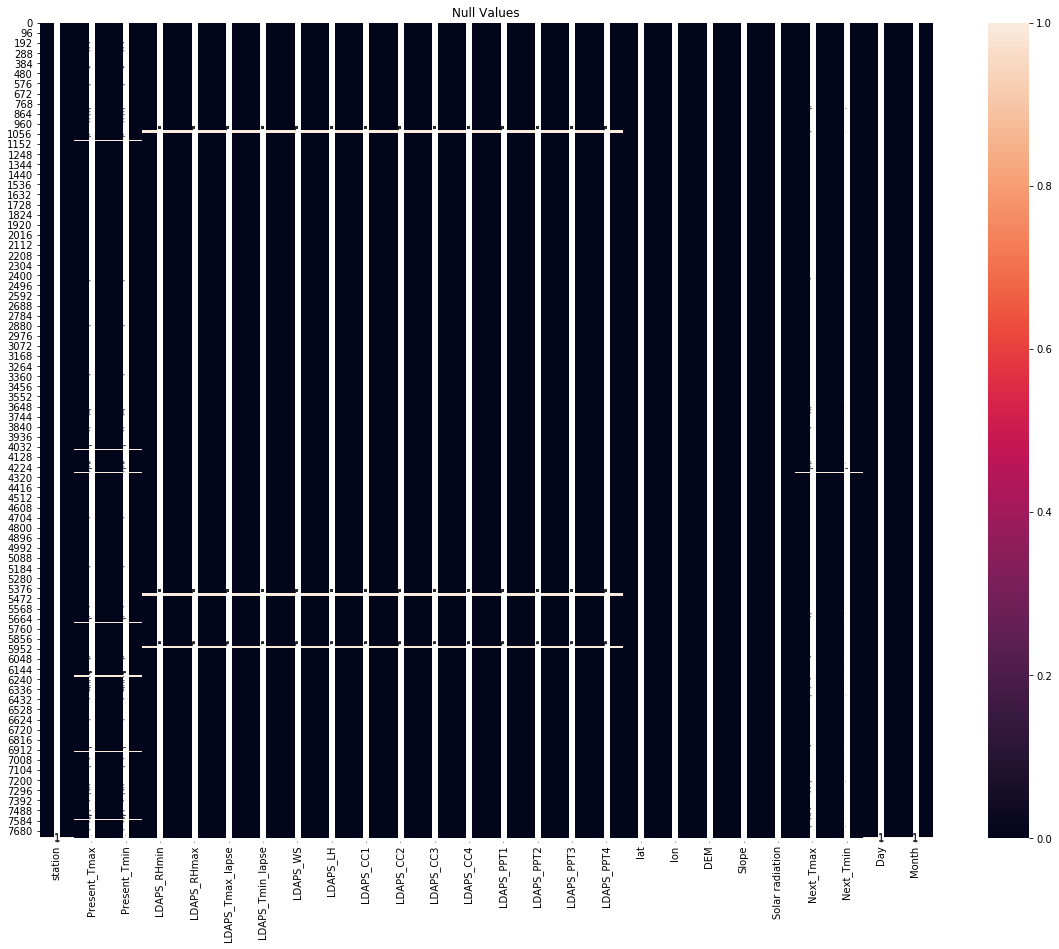

In [11]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of null values present in dataset
plt.title('Null Values')
plt.show()

In [12]:
df.loc[df['Next_Tmax'].isnull()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
831       7.0          29.6          25.8    76.202255    94.058517   
856       7.0           NaN           NaN    69.476059    93.672600   
1073     24.0          34.2          25.1    50.618851    89.166397   
2465     16.0          28.8          23.1    71.442566    90.695419   
3696     22.0          30.4          23.4    81.568771    93.973579   
3714     15.0          24.6          22.4    83.265244    94.153442   
3739     15.0           NaN           NaN    68.156593    93.874550   
3886     12.0           NaN           NaN    64.559479    86.083702   
4205      6.0          30.8          23.9    35.218002    82.458534   
4230      6.0           NaN           NaN    43.412582    84.317780   
4255      6.0           NaN           NaN    58.784390    79.509987   
4280      6.0           NaN           NaN    28.475870    89.183807   
5656      7.0          33.1          26.8    64.725151    90.769173   
5681      7.0           NaN           NaN    51.469501    88.160759   
6060     11.0           NaN           NaN    44.908253    86.309982   
6268     19.0          25.6          21.7    84.423805    99.652794   
6357      8.0           NaN           NaN    77.332268    89.395378   
6435     11.0          28.8          24.5    77.014175    90.517715   
6907      8.0          27.5          24.3    54.392185    88.281052   
7254      5.0          30.9          23.3    51.226562    85.210350   
7304      5.0           NaN           NaN    73.782753    85.662842   
7344     20.0          26.2          22.1    85.103630    98.765335   
7504      5.0          27.7          23.3    53.629204    94.092056   
7554      5.0          30.7          23.7    78.330040    91.991310   
7571     22.0          30.2          24.9    76.936493    90.509560   
7604      5.0          30.3          21.7    35.563965    88.866699   
7682      8.0          26.3          18.1    29.959215    90.116638   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
831          28.842727         26.442801   7.980686   87.715882   0.442766   
856          30.491629         25.081388   6.282423  124.191446   0.473034   
1073         33.414349         27.475249   6.084058   48.521008   0.254070   
2465         26.273760         23.419080   3.787889   41.739802   0.260468   
3696         26.724457         24.984435   5.779299   58.456456   0.798225   
3714         26.738321         24.585545   8.048991   43.391457   0.817756   
3739         28.502294         24.270829   5.819343   35.236471   0.863410   
3886         29.628166         25.745189   8.629767   26.564901   0.783111   
4205         32.241880         23.018172   6.547084   63.516243   0.101724   
4230         32.028639         24.274533   5.880758   54.278856   0.140189   
4255         28.628288         24.045805   4.762958   50.826542   0.315319   
4280         33.651696         21.381762   6.050666   61.250346   0.044204   
5656         31.730979         26.316541   5.095636  127.601342   0.066835   
5681         33.531711         27.066962   4.934146  139.353021   0.174230   
6060         26.065732         21.639797   9.656940   78.263273   0.846820   
6268         24.881373         22.821416   9.236040   41.559663   0.898233   
6357         27.467565         24.160557   7.628294   38.808770   0.213881   
6435         28.321989         24.563500  10.349091   53.364445   0.773665   
6907         30.742290         25.195872   6.311136   44.619934   0.483763   
7254         30.742346         23.130362   5.471810  138.030061   0.209946   
7304         25.370156         21.846991   7.367599   72.823796   0.645235   
7344         21.925545         19.703742  14.541317   45.193849   0.472767   
7504         30.448380         24.038216   5.289254  114.941728   0.373159   
7554         28.959303         24.378045  12.264002   76.349382   0.745370   
7571         29.339601         24.659223  11.588554   78.099351   0

In [13]:
df.dropna(subset=['Next_Tmax', 'Next_Tmin'], inplace = True)

Dropping rows with missing values in our target variable columns.

In [14]:
df['Month'].fillna(df['Month'].mode()[0], inplace=True)
df['Day'].fillna(df['Day'].mode()[0], inplace=True)

Filling missing values in Month and Day column with mode values.

In [22]:
df_new['Day'].unique()

array([30.,  7., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 31.,  8.])

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
my_imputer = SimpleImputer()
df_new = pd.DataFrame(my_imputer.fit_transform(df))

In [17]:
df_new.columns = df.columns

Using SimpleImputer to handle rest of the rows with missing values.

In [18]:
df_new.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
dtype: int64

No missing values present in the dataset now.

In [19]:
df_new.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin   Day  Month  
0       21.2  30.0    6.0  
1       22.5  30.0    6.0  
2       23.9  30.0    6.0  
3       24.3  30.0    6.0  
4       22.5  30.0    6.0  

[5 rows x 26 columns]

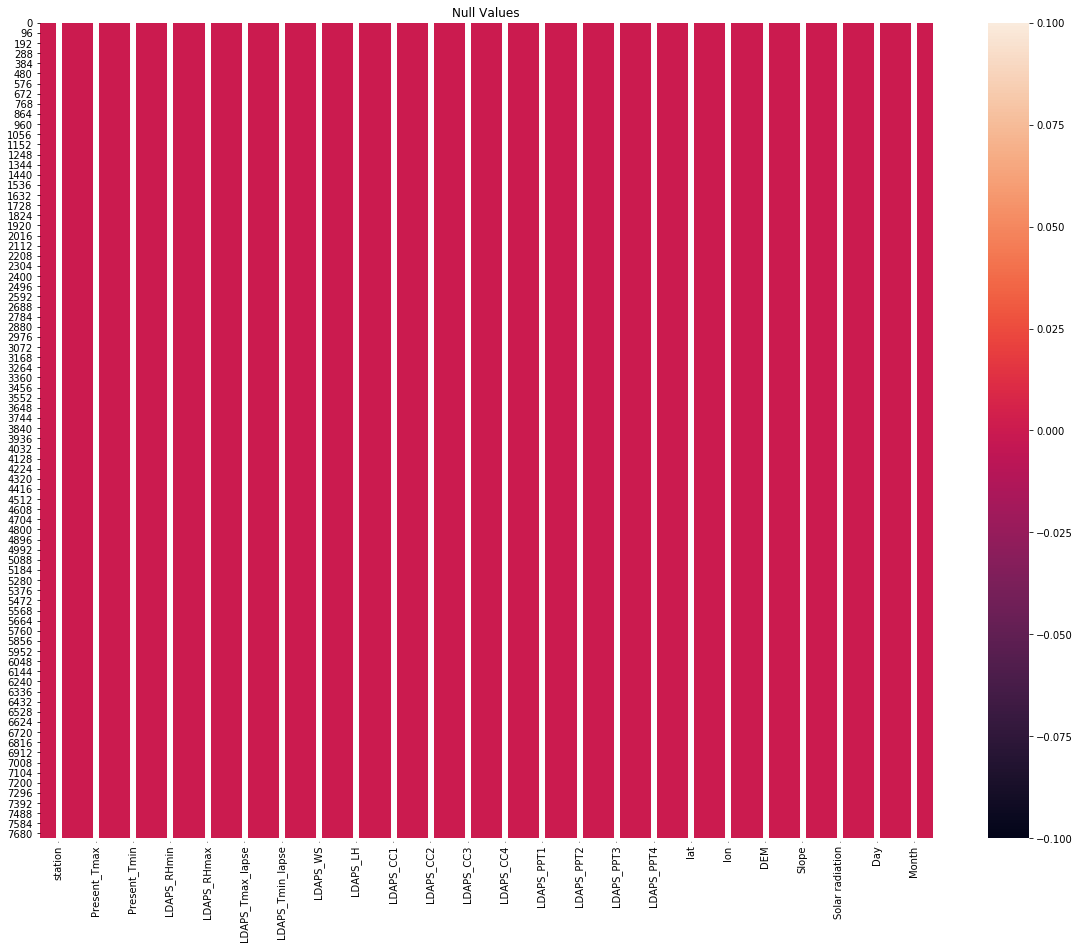

In [43]:
plt.figure(figsize = [20, 15])
sns.heatmap(df_new.isnull(), annot = True)                           #Visual representation of no null values present in dataset
plt.title('Null Values')
plt.show()

Visual representation of no null values present in dataset

# EDA and Data Visualisation

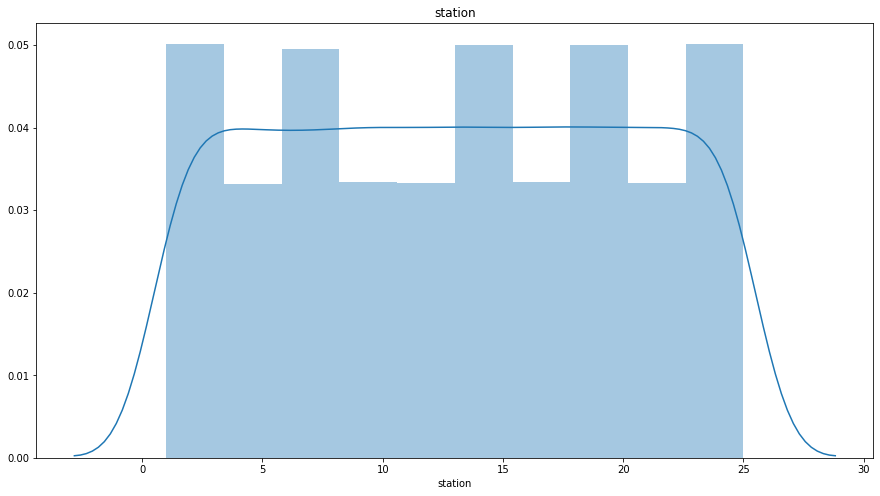

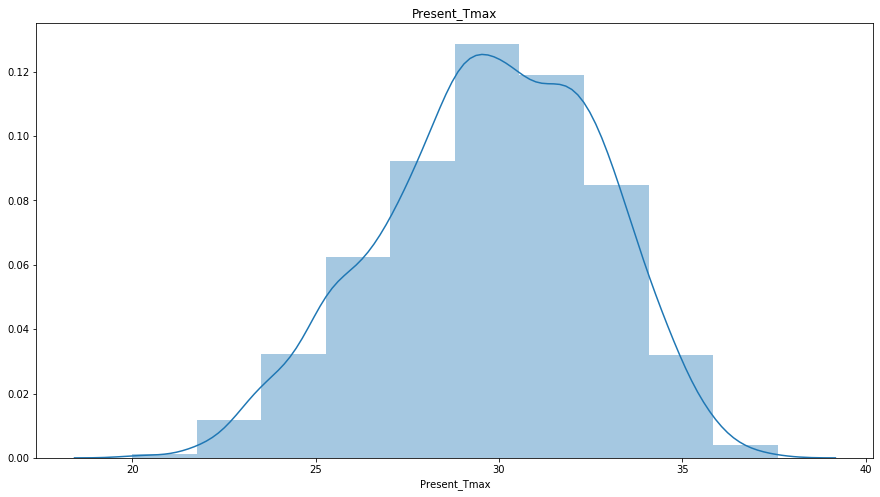

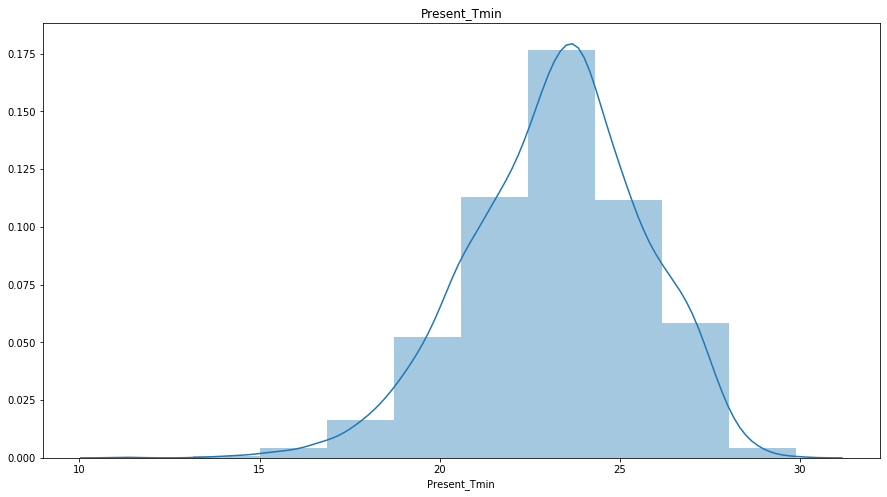

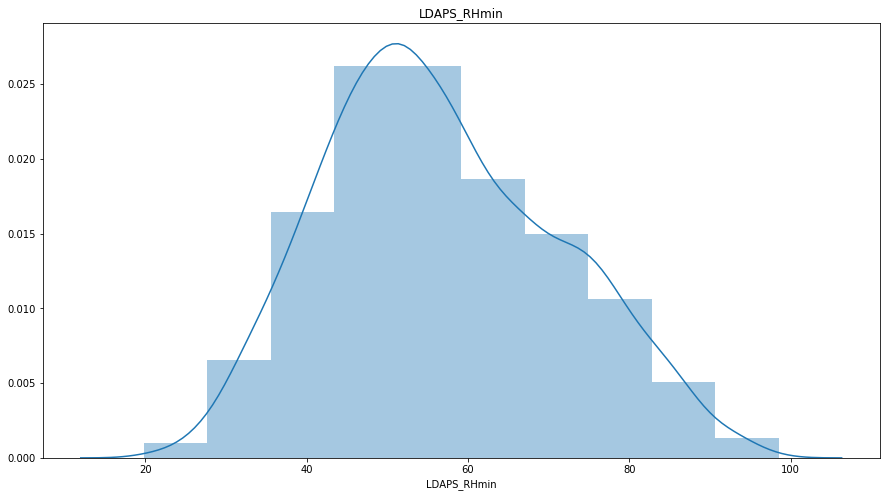

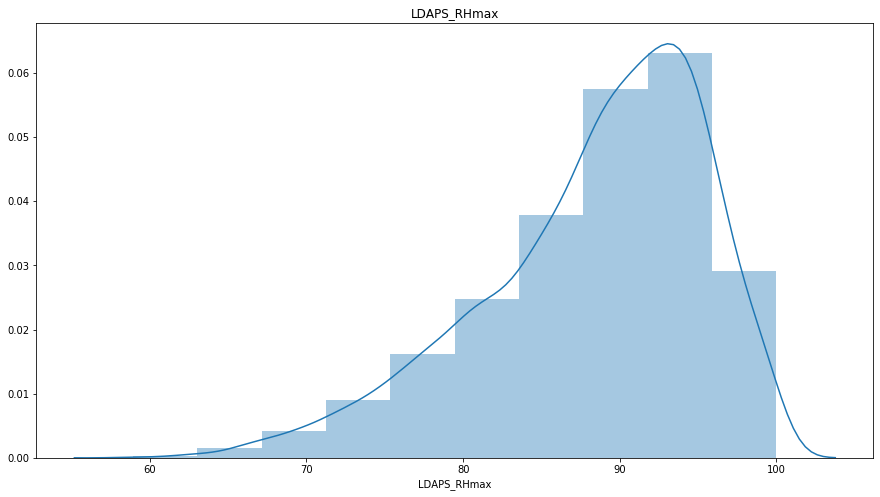

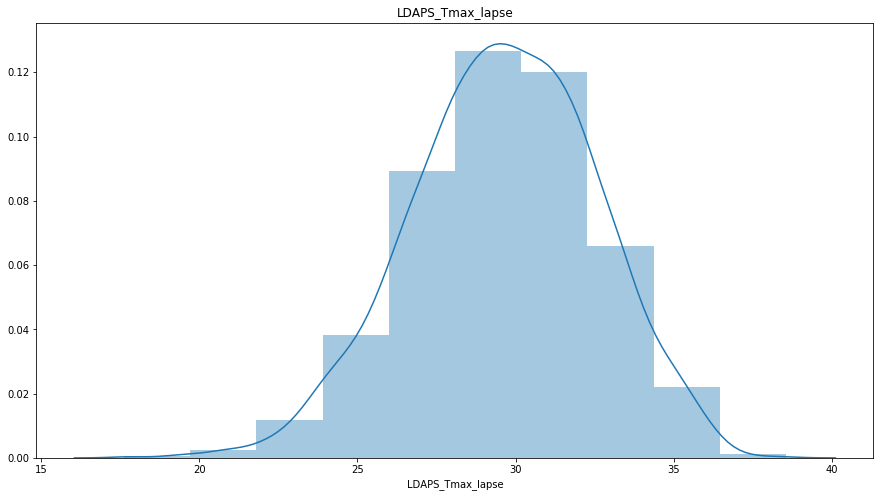

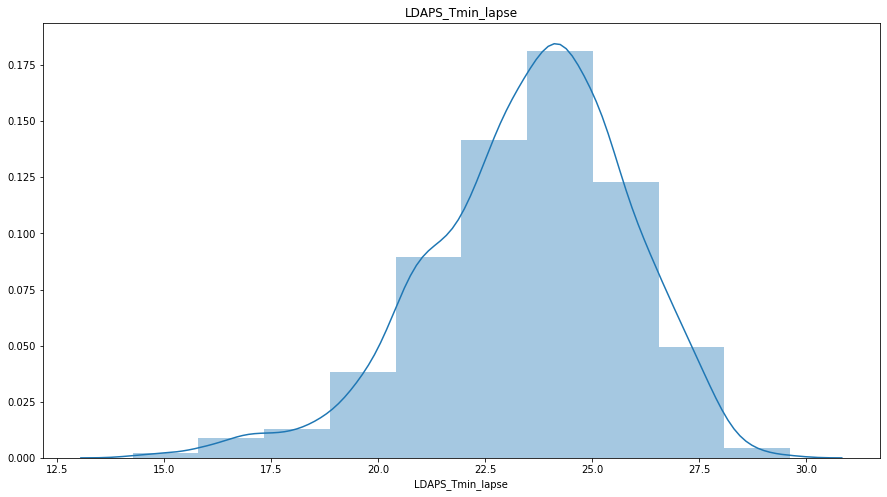

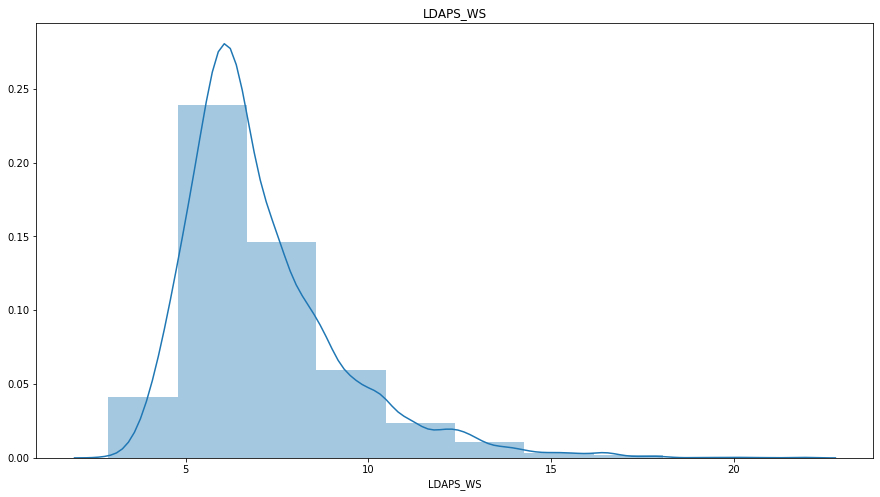

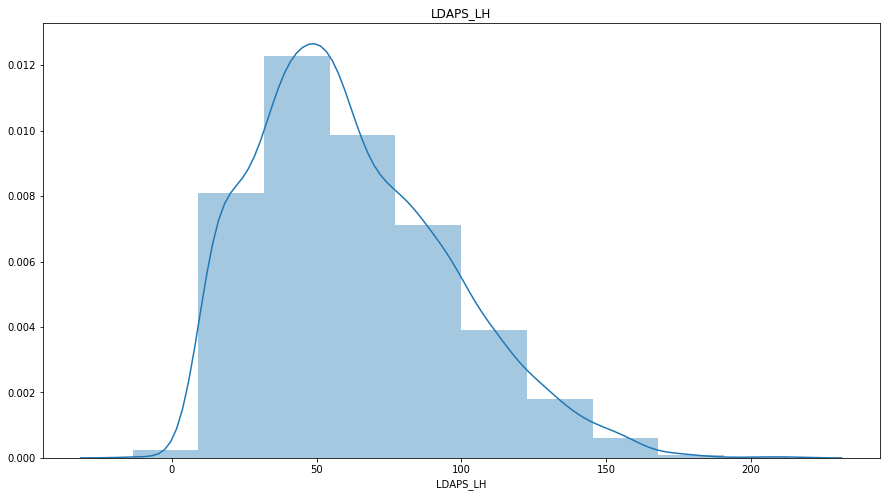

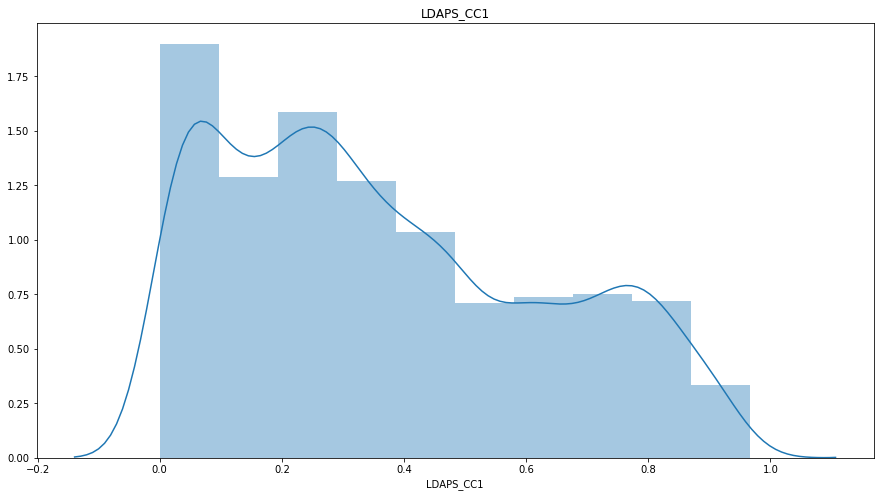

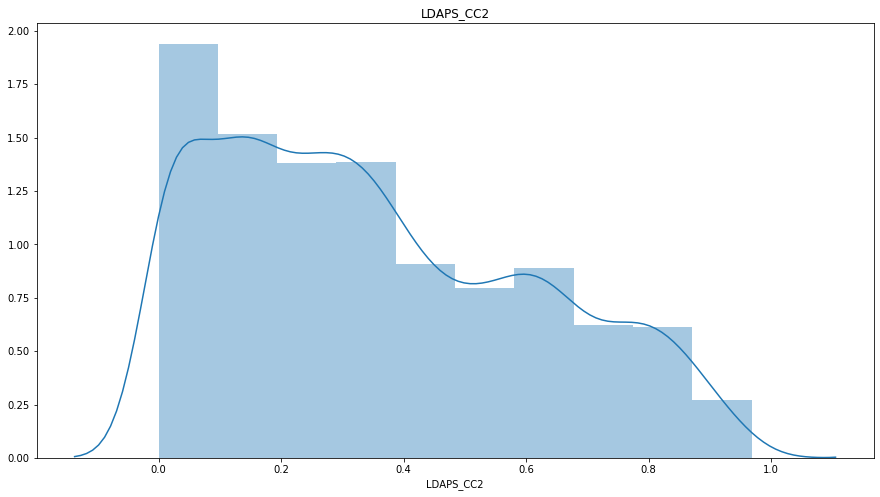

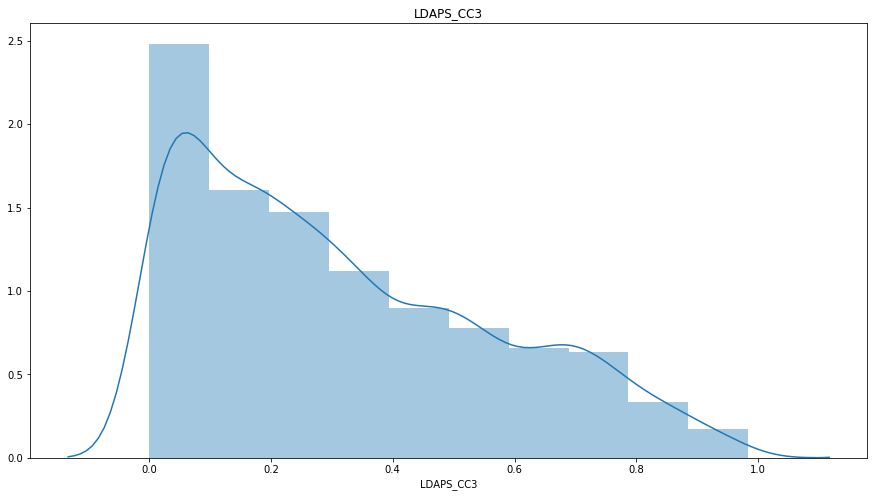

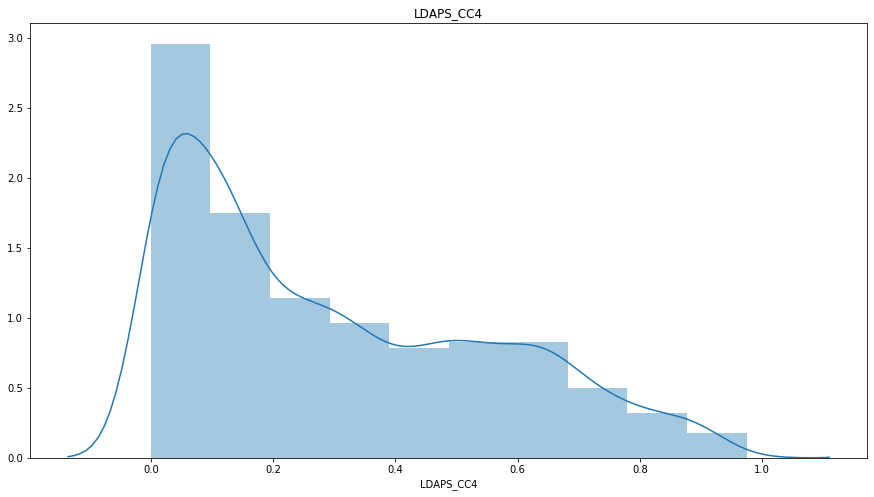

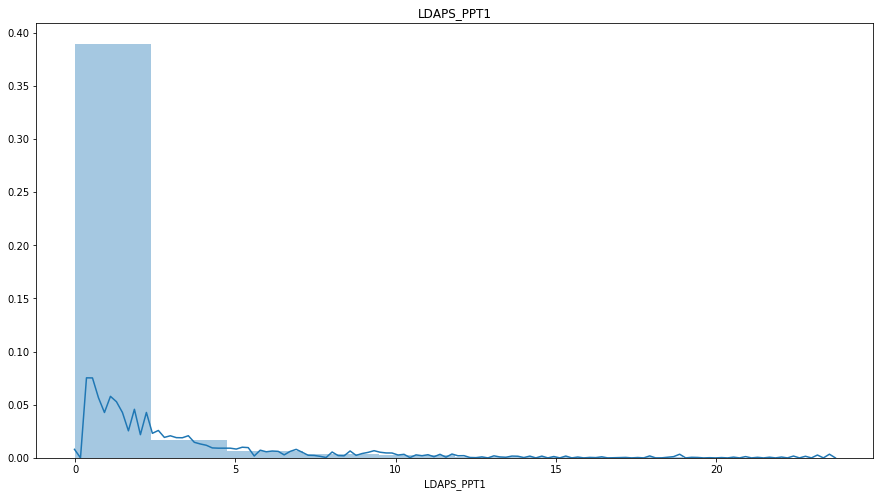

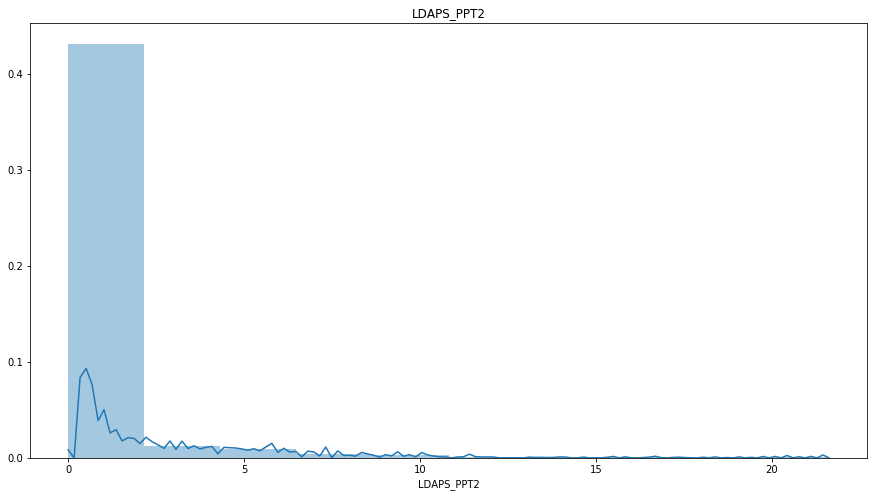

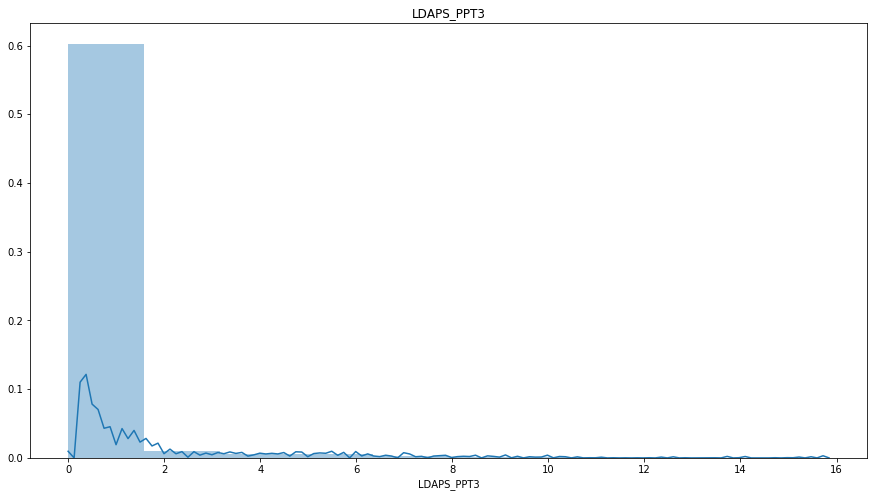

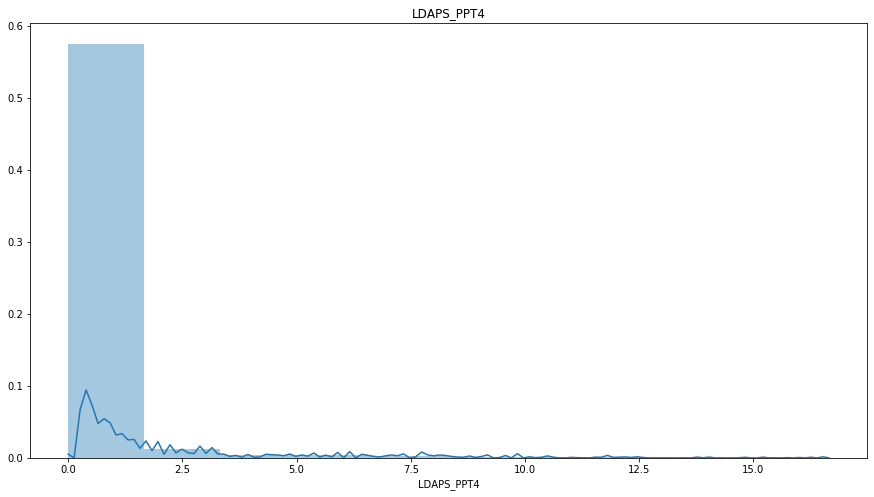

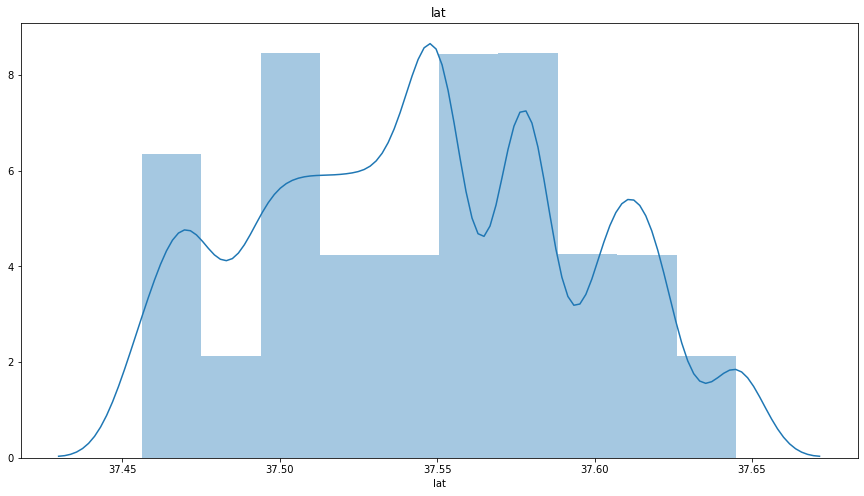

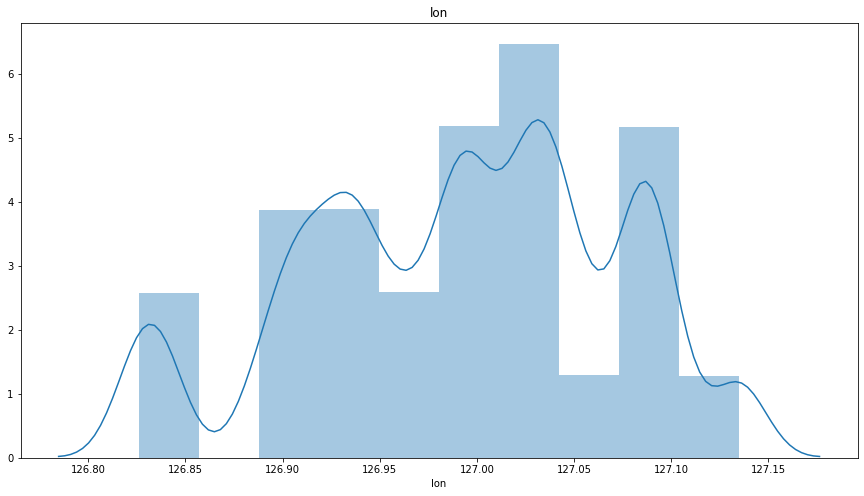

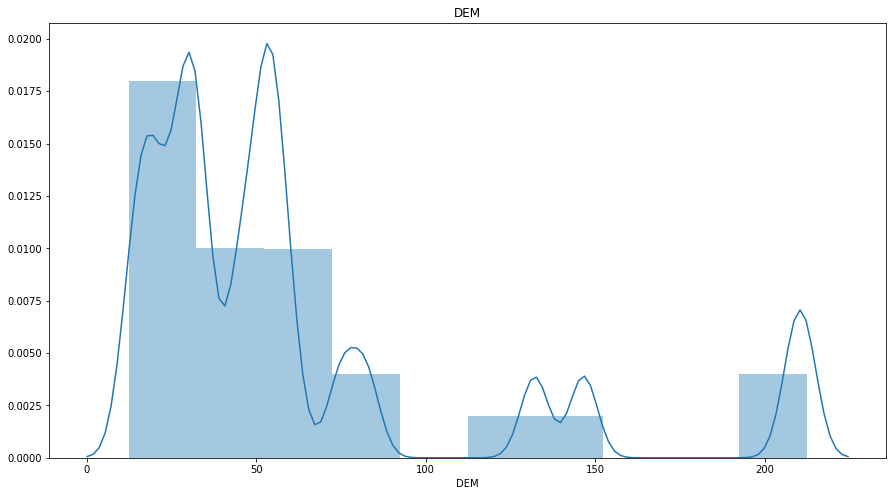

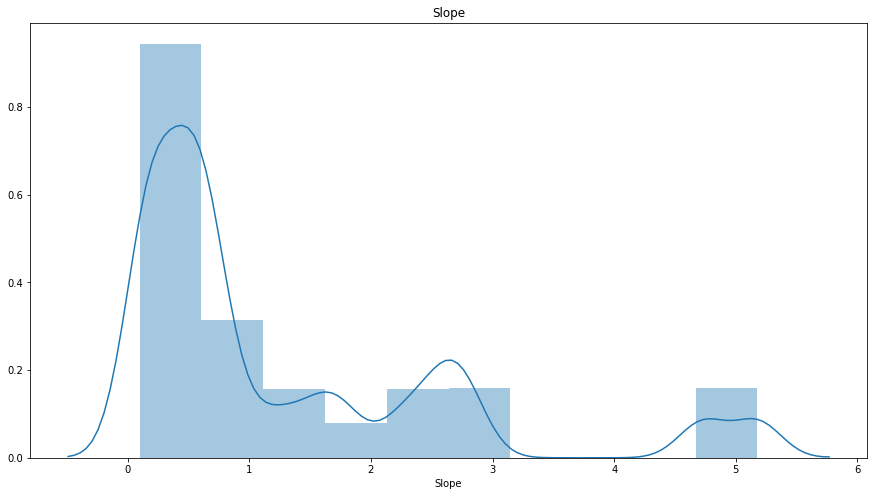

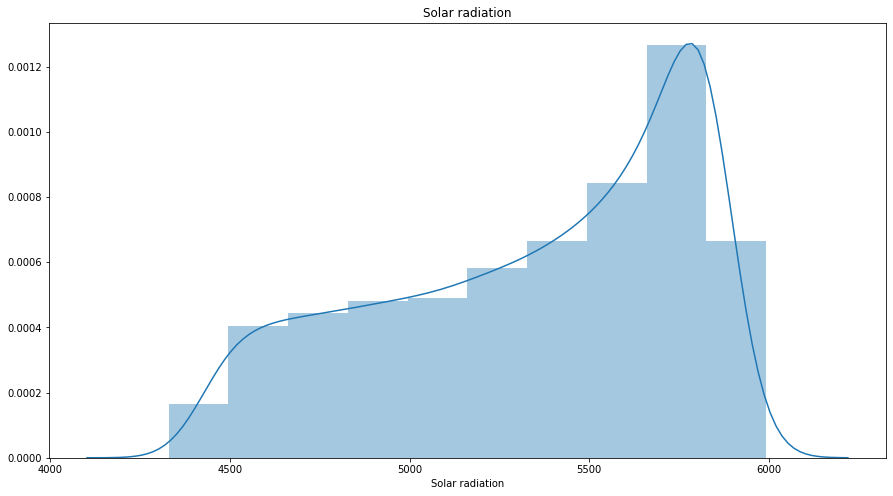

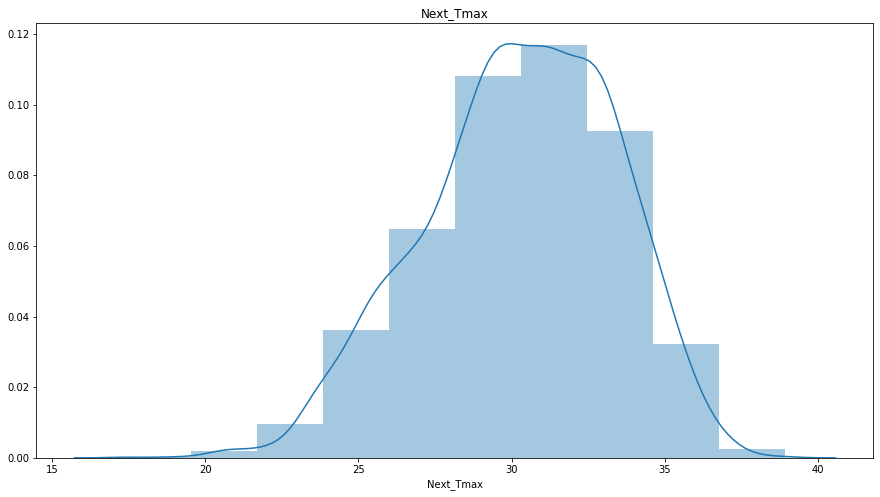

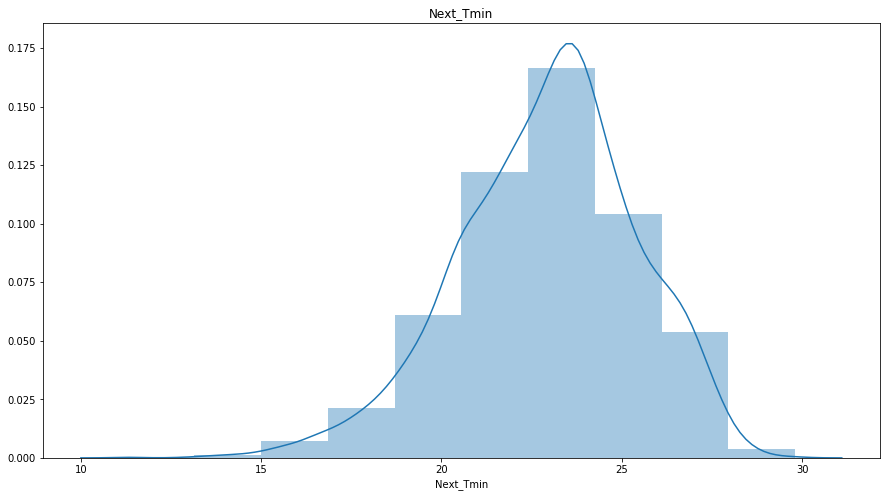

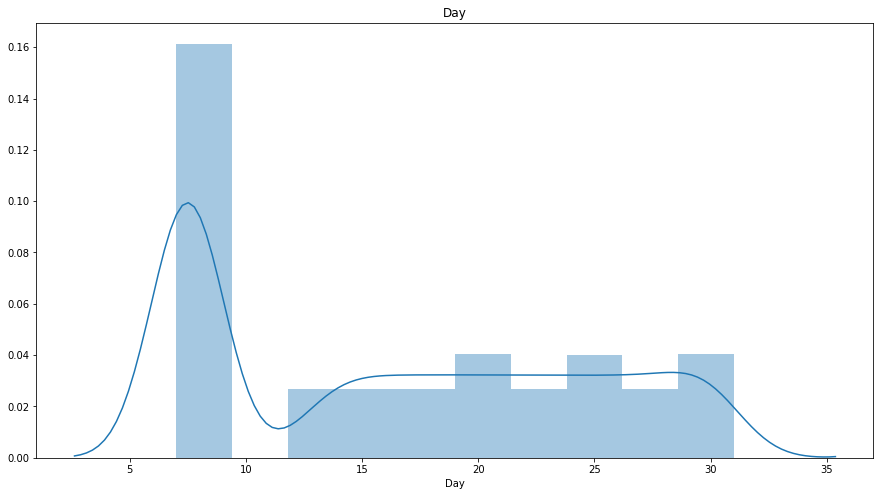

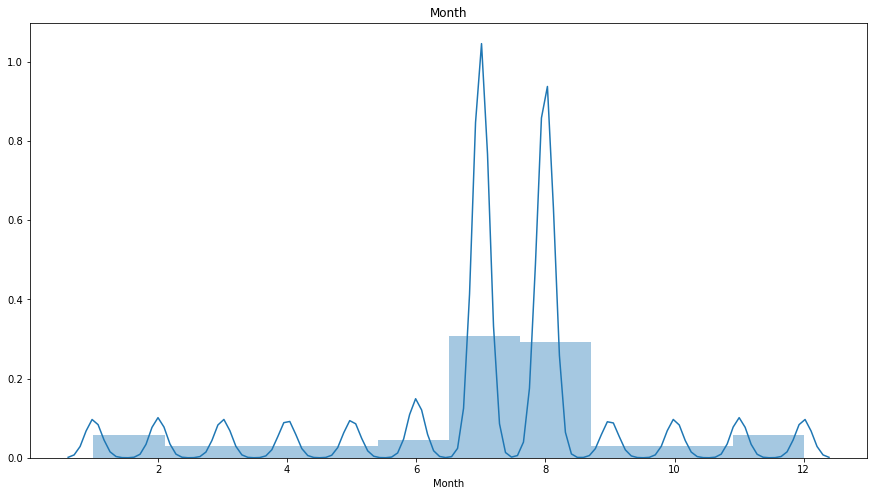

In [21]:
for i in df_new.columns:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()

Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Next_Tmax, Next_Tmin all have bell shaped curve graphs.

Remaining graphs have little skewness present in them.

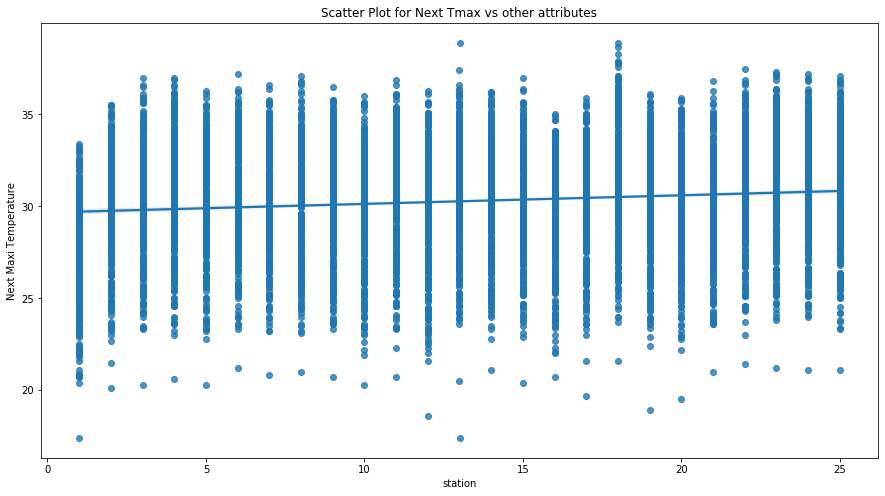

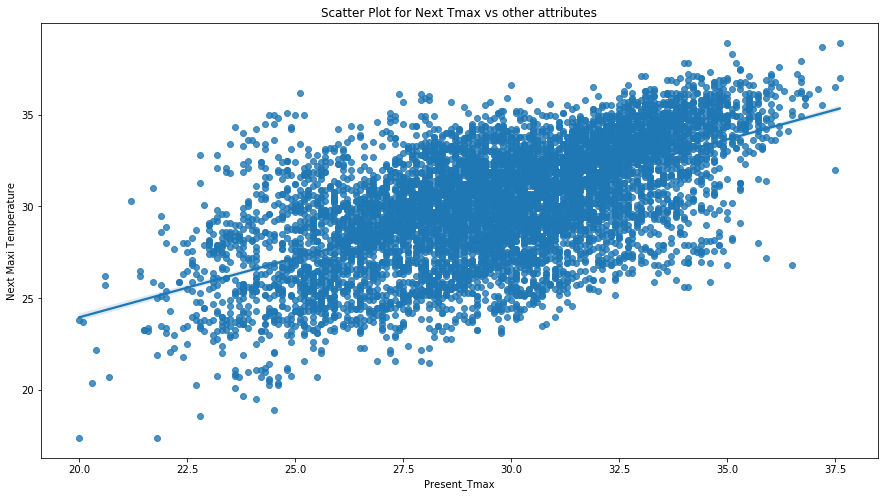

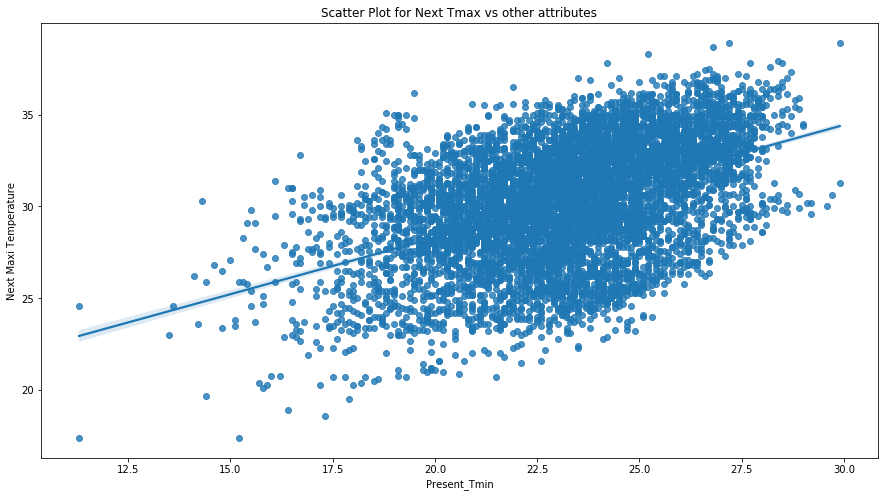

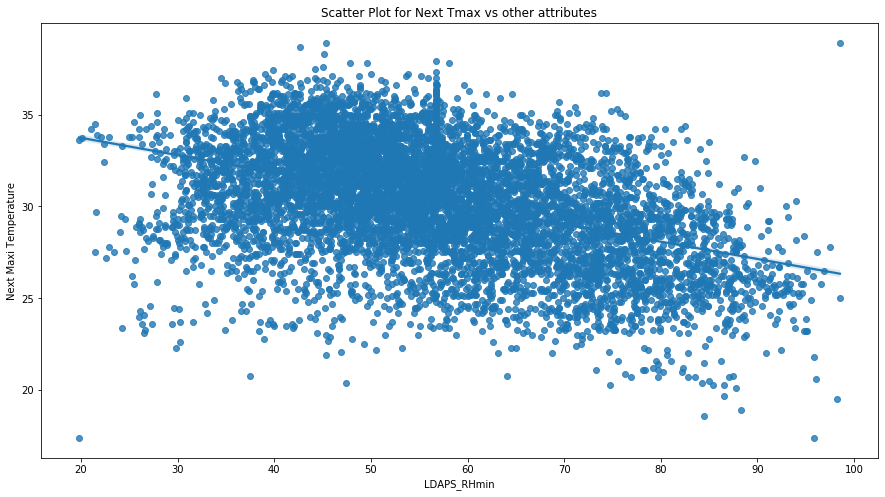

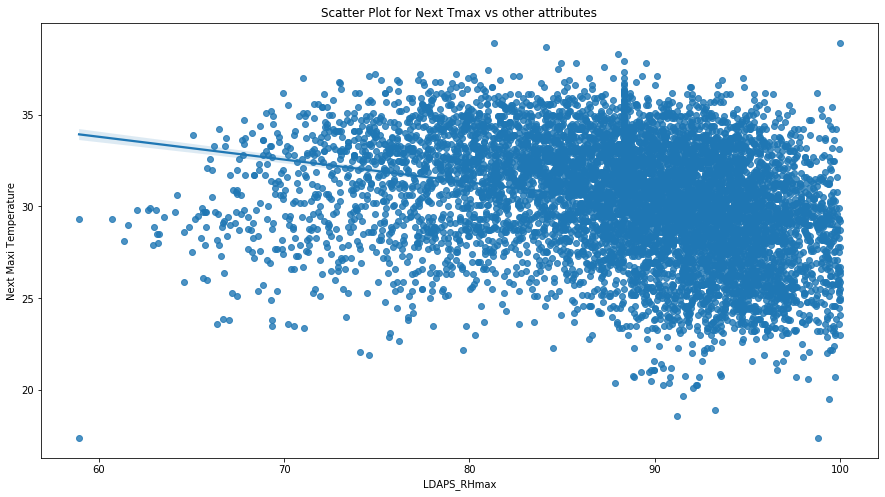

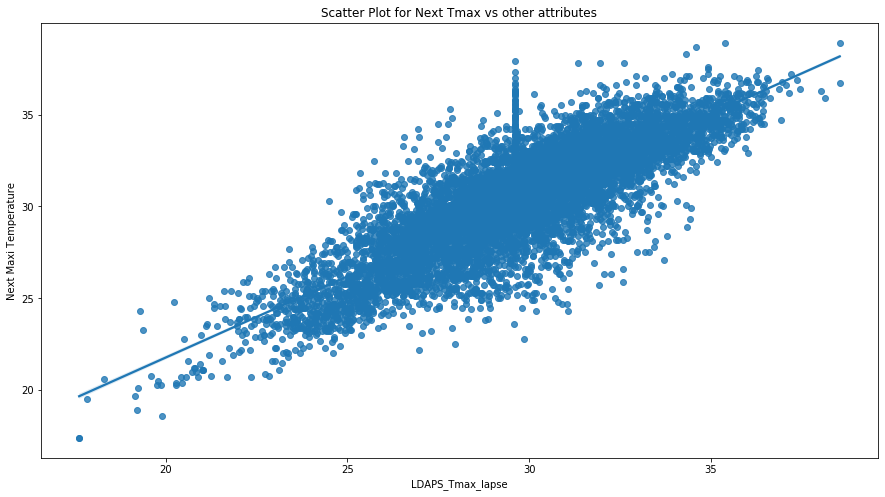

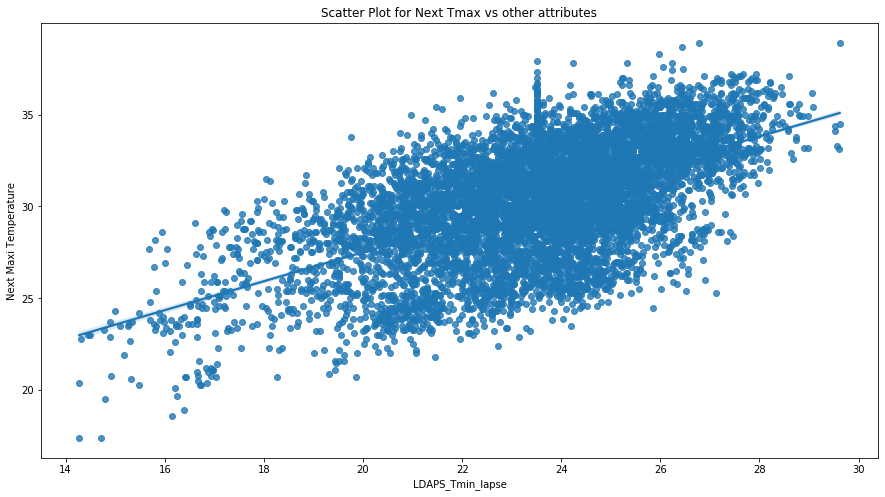

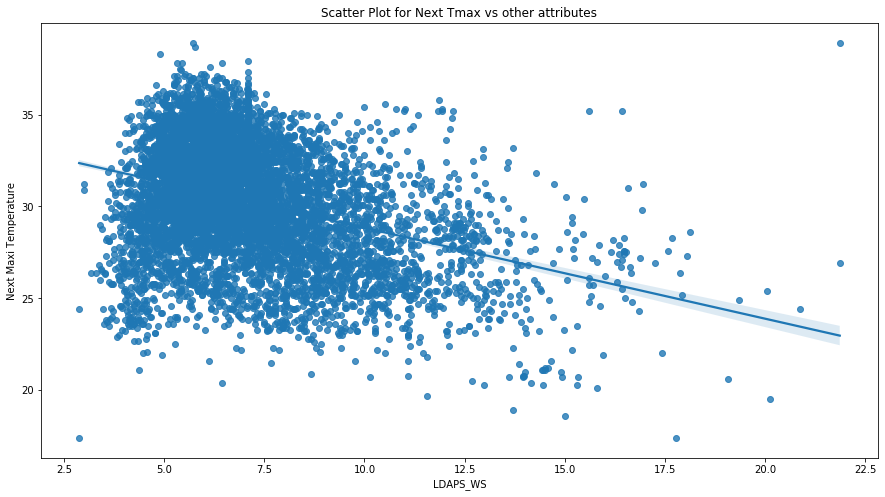

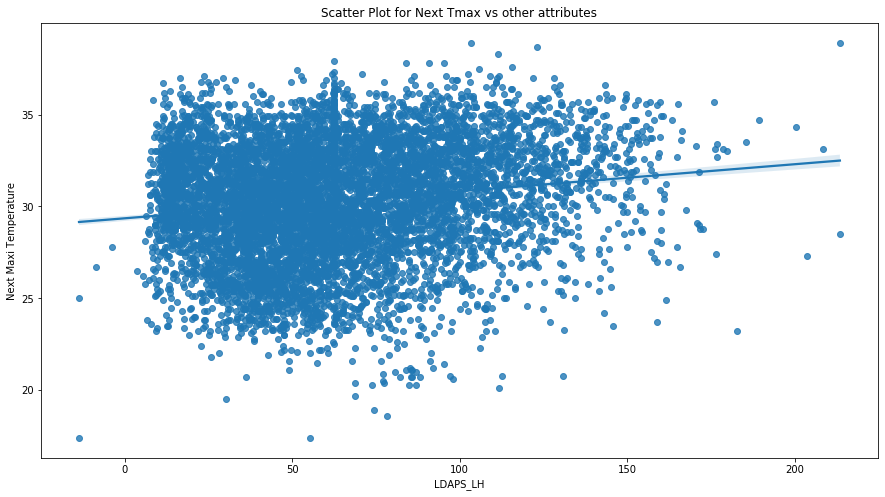

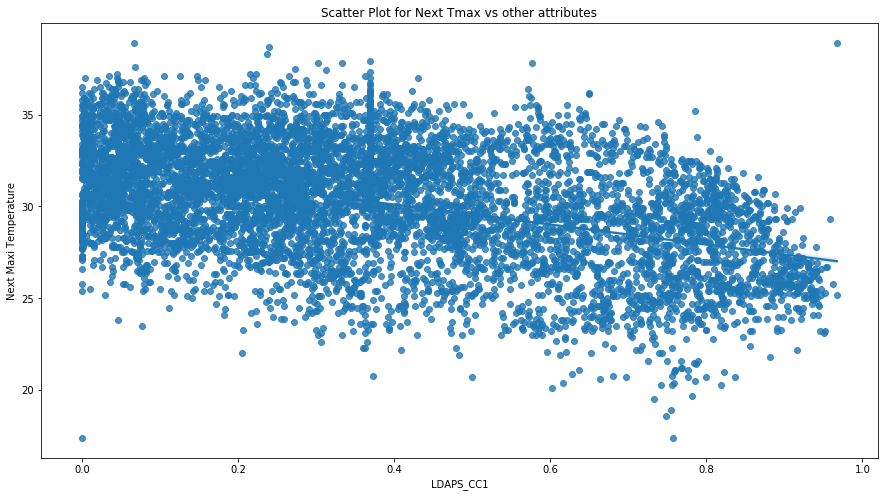

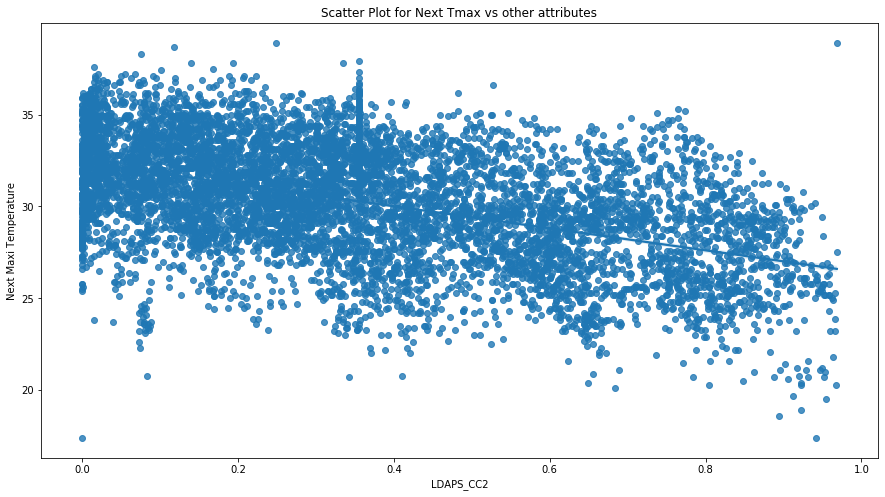

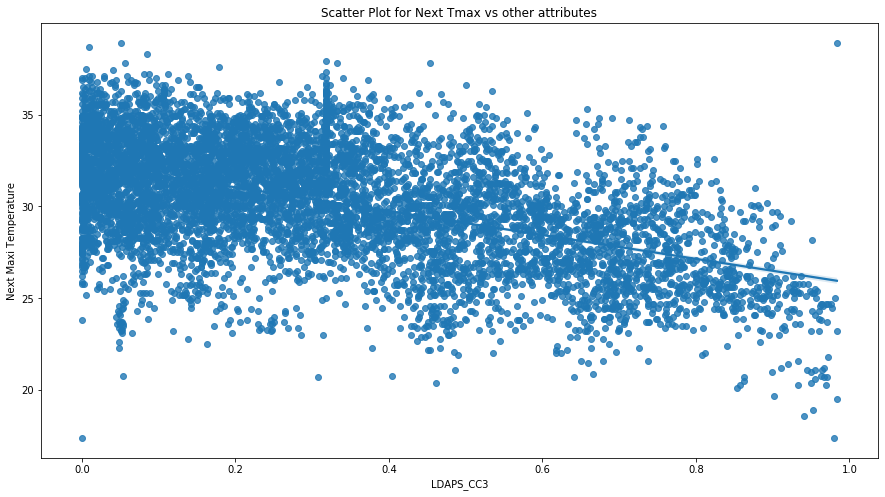

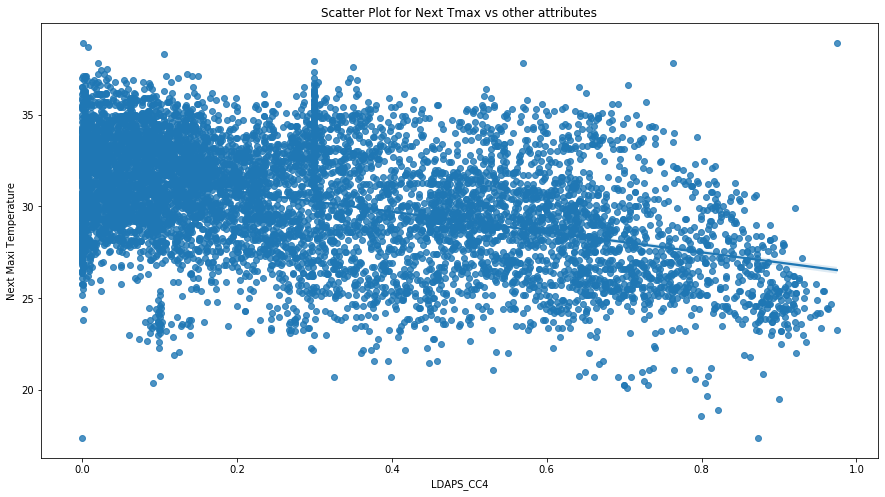

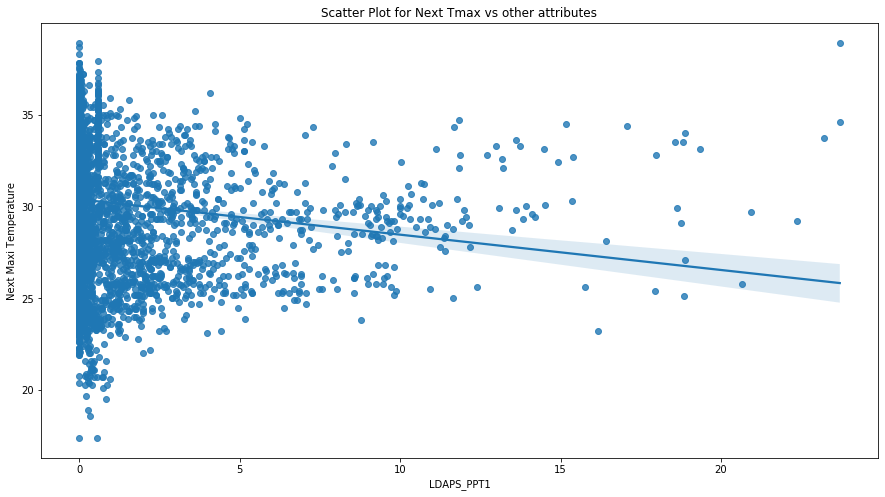

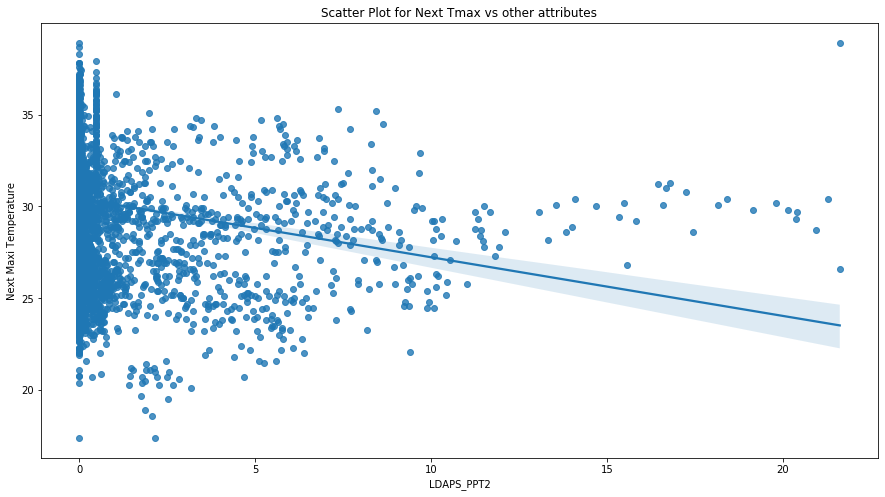

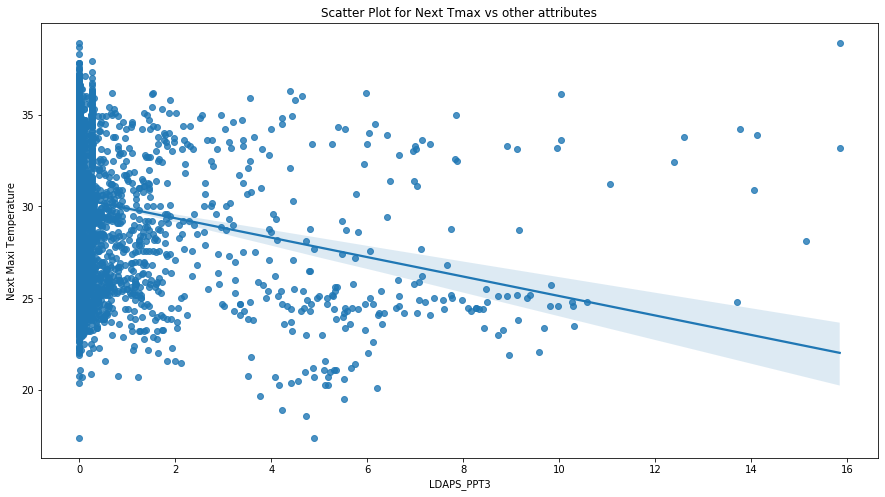

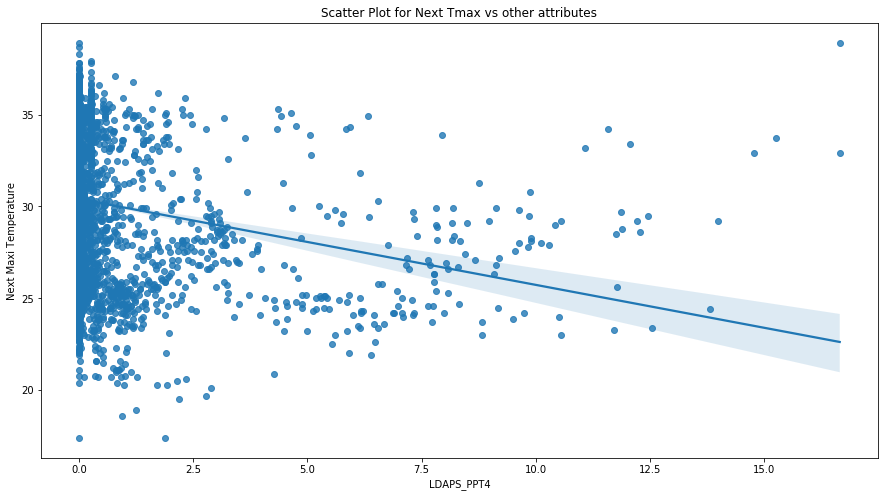

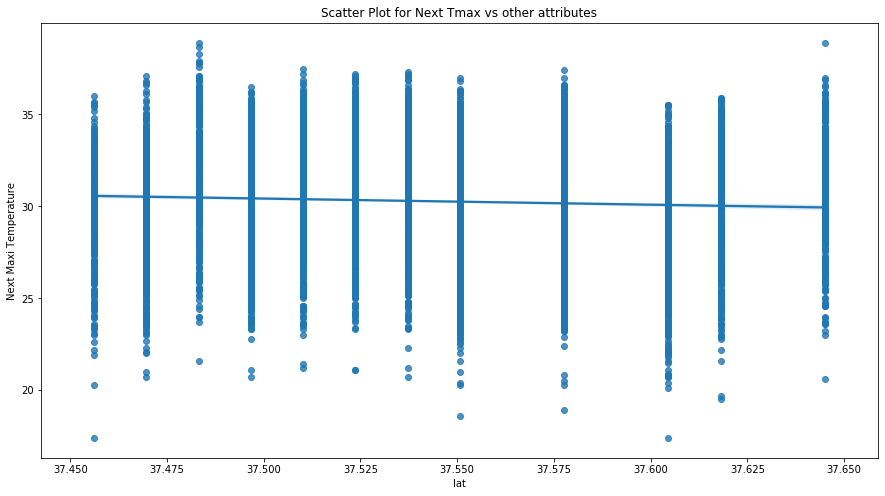

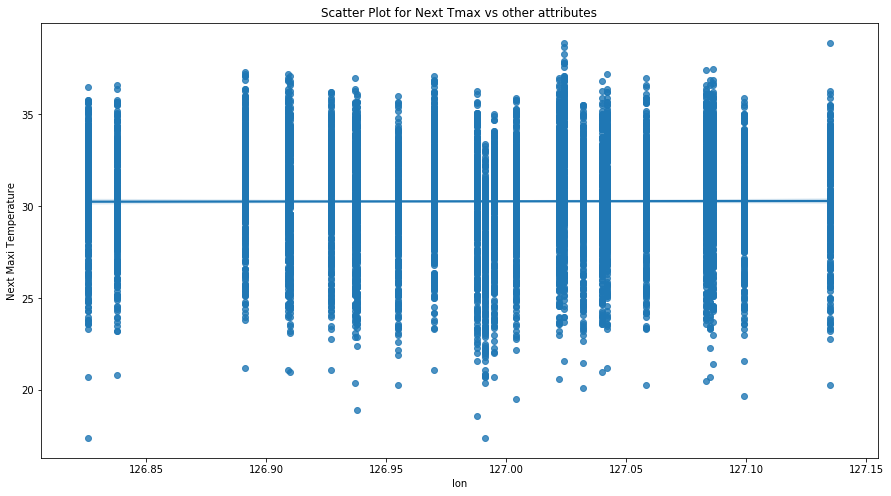

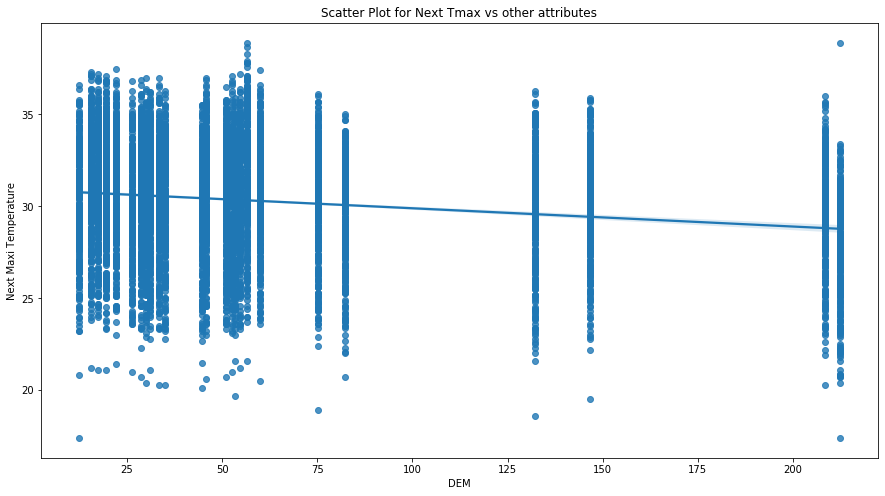

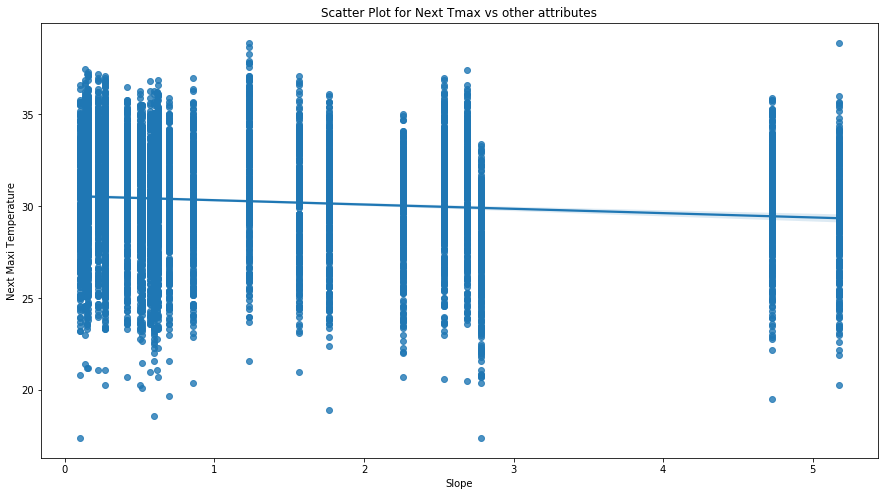

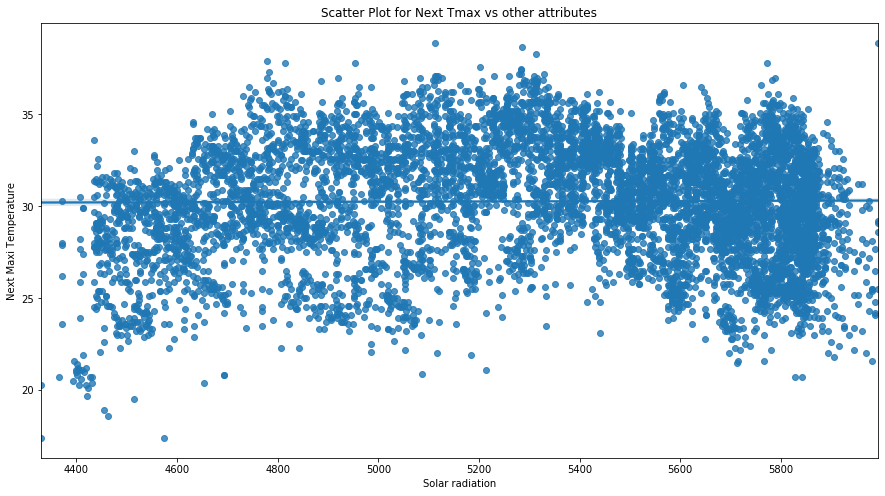

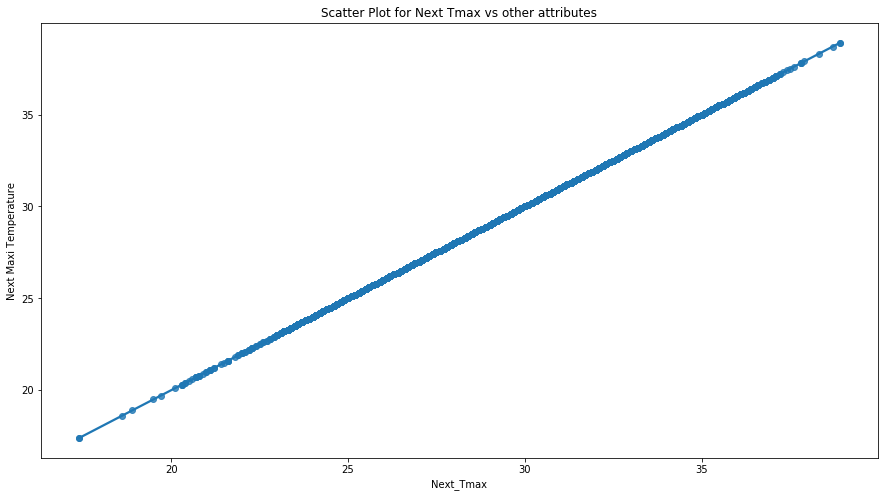

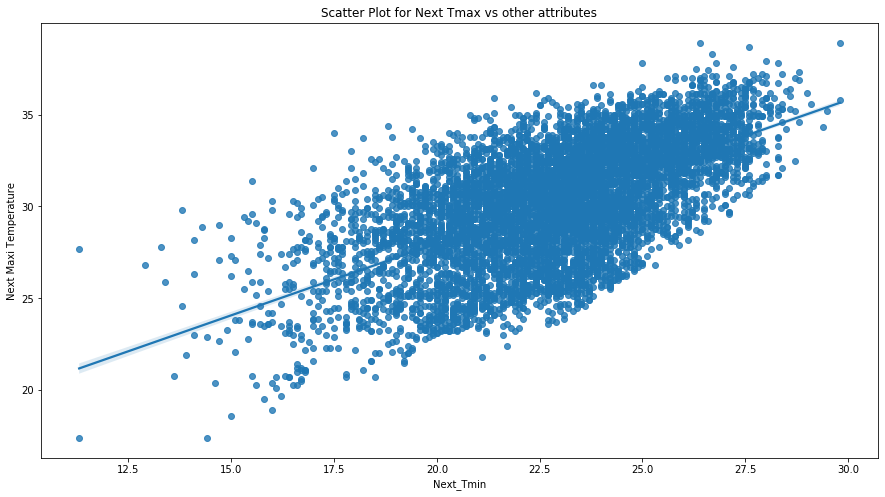

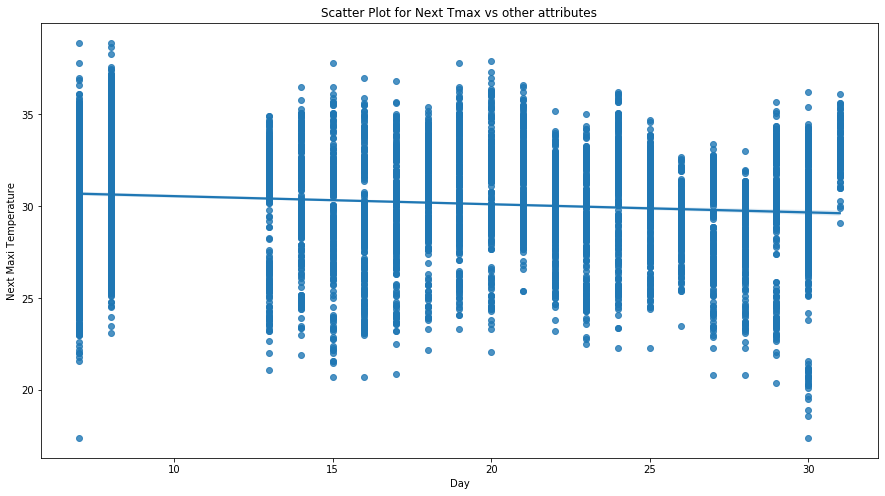

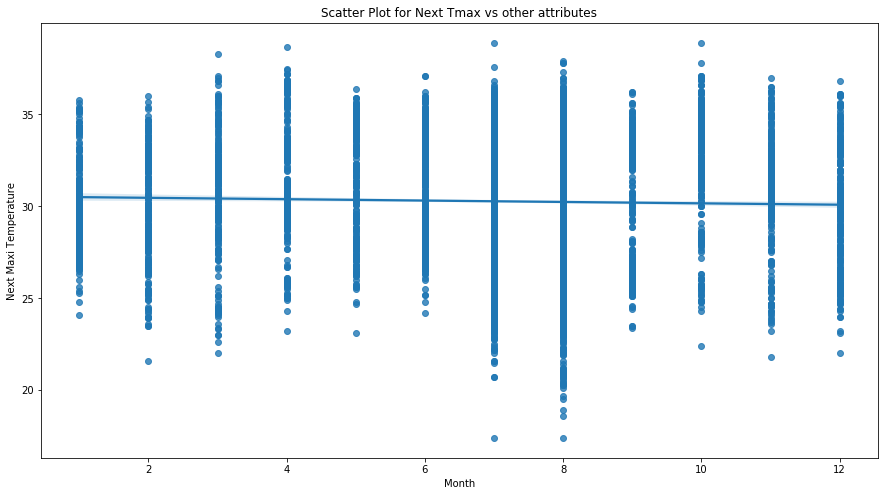

In [23]:
for i in df_new.columns:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    sns.regplot(df_new[i], df_new['Next_Tmax'])
    plt.title('Scatter Plot for Next Tmax vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Next Maxi Temperature')
    plt.show()

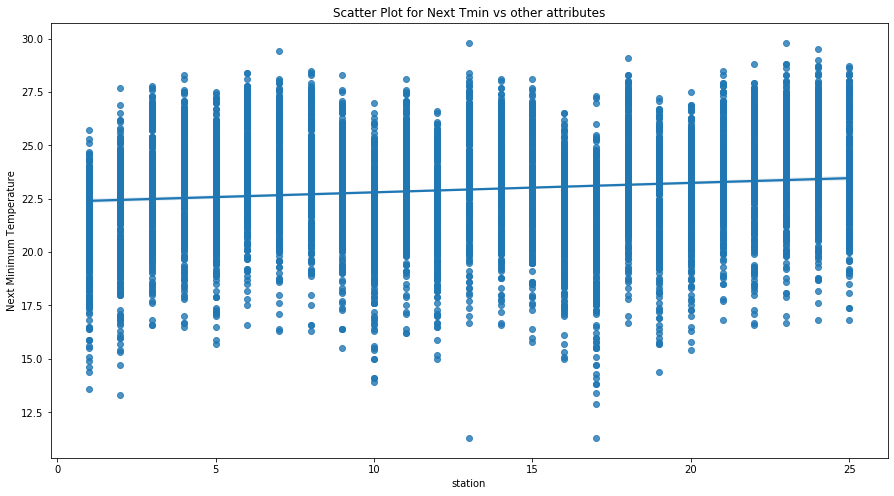

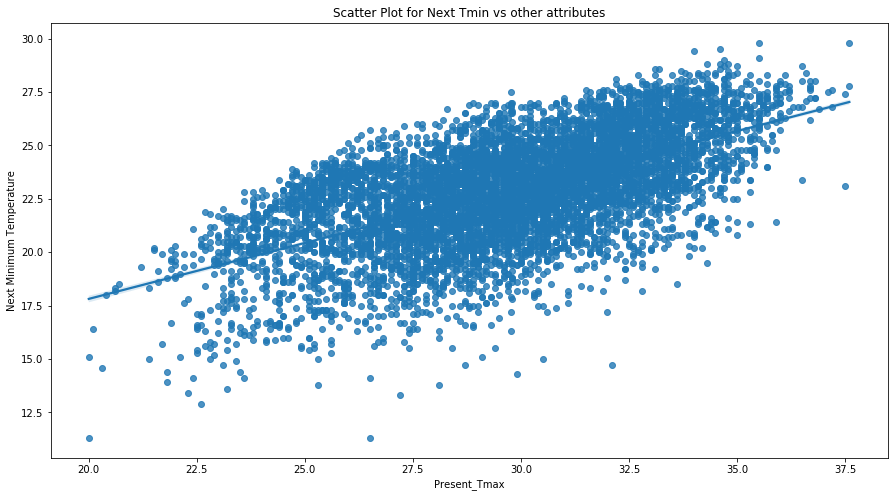

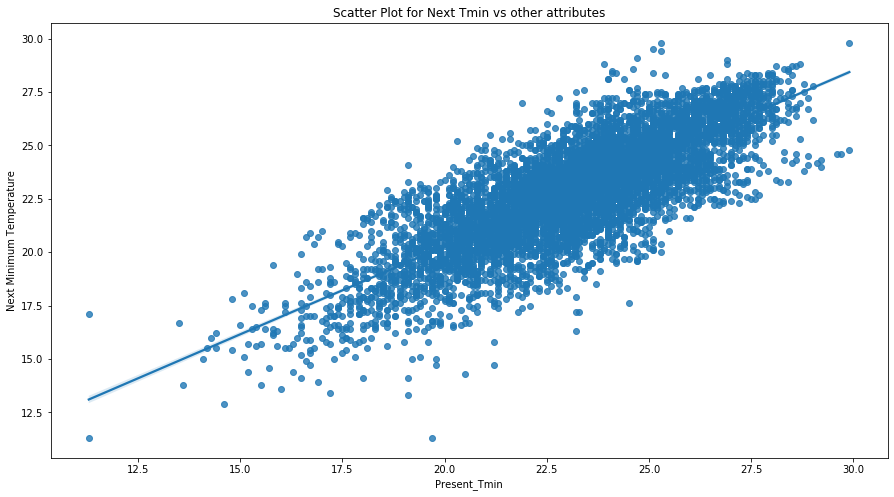

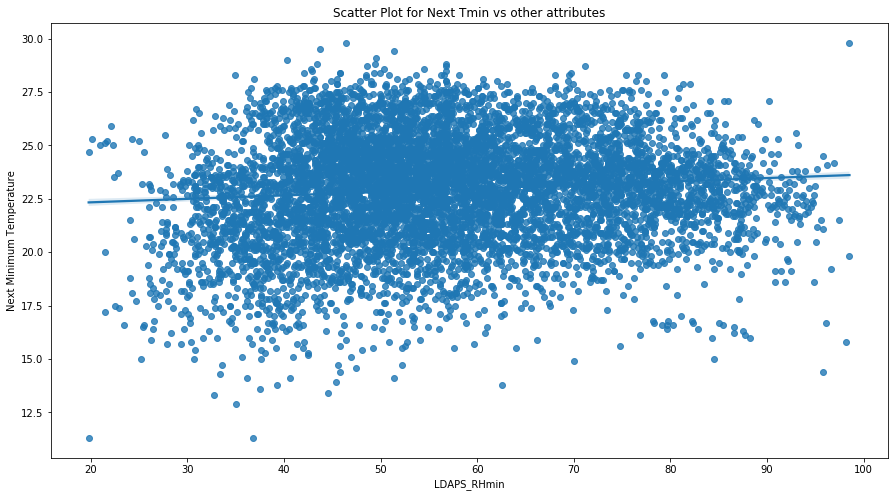

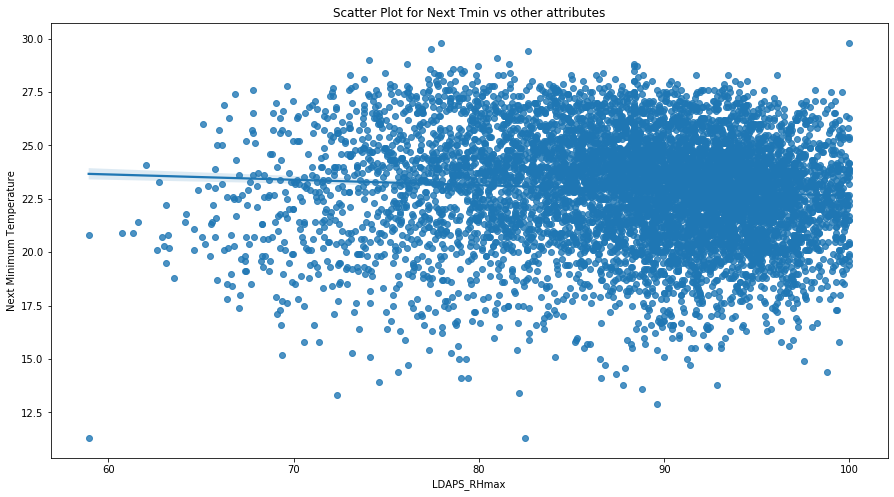

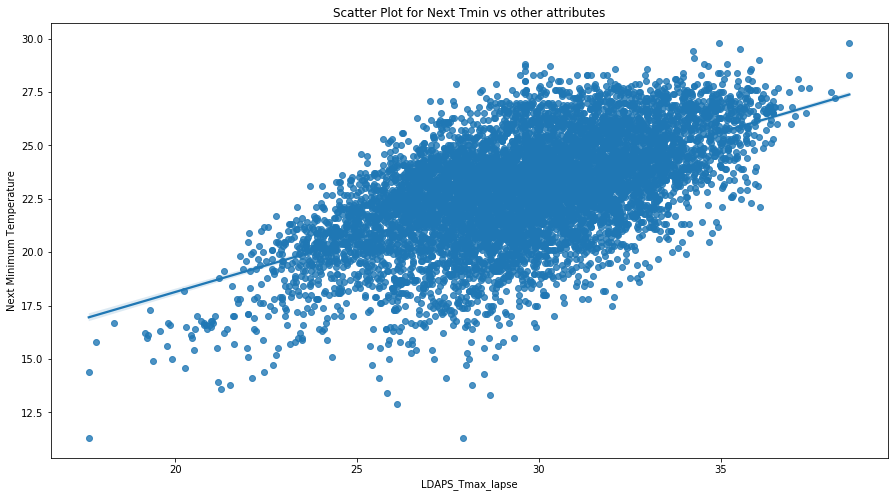

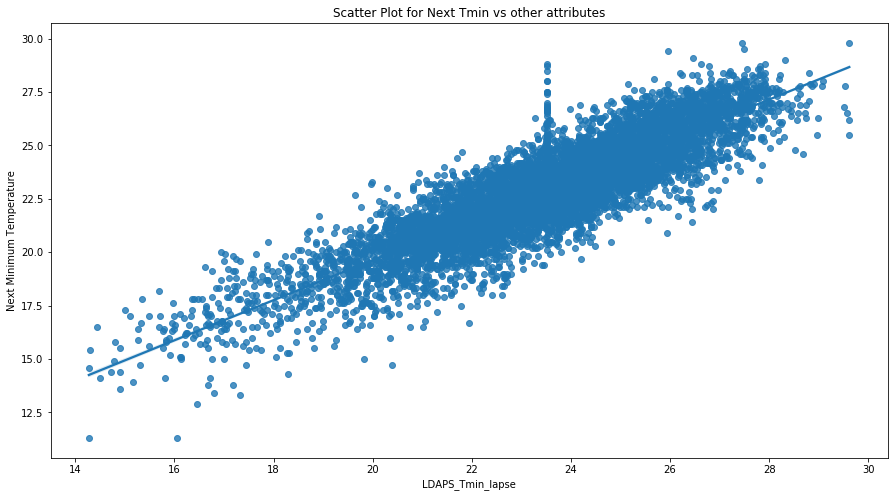

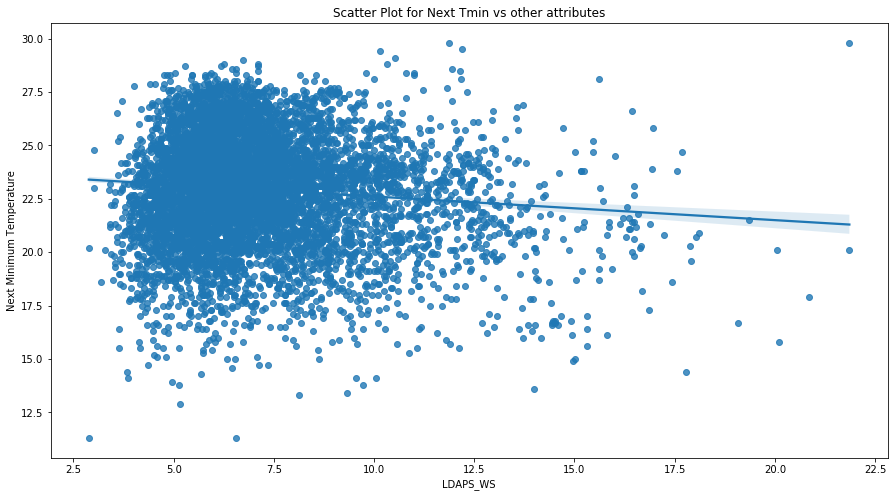

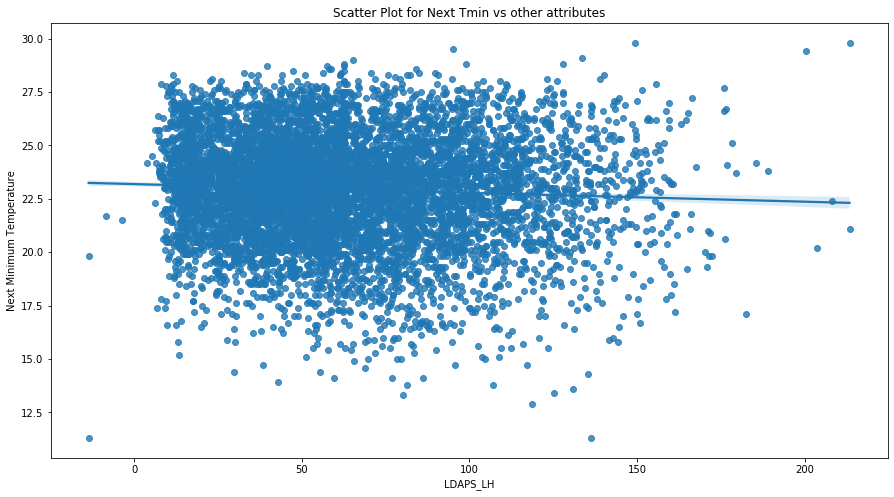

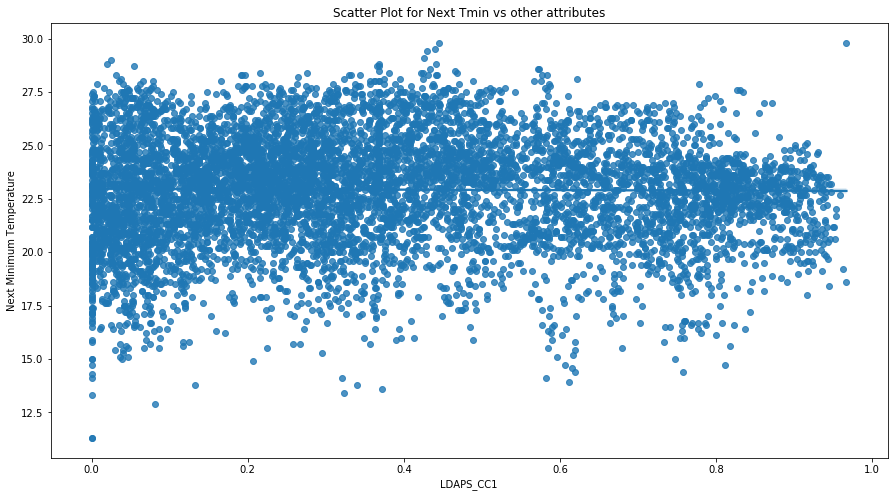

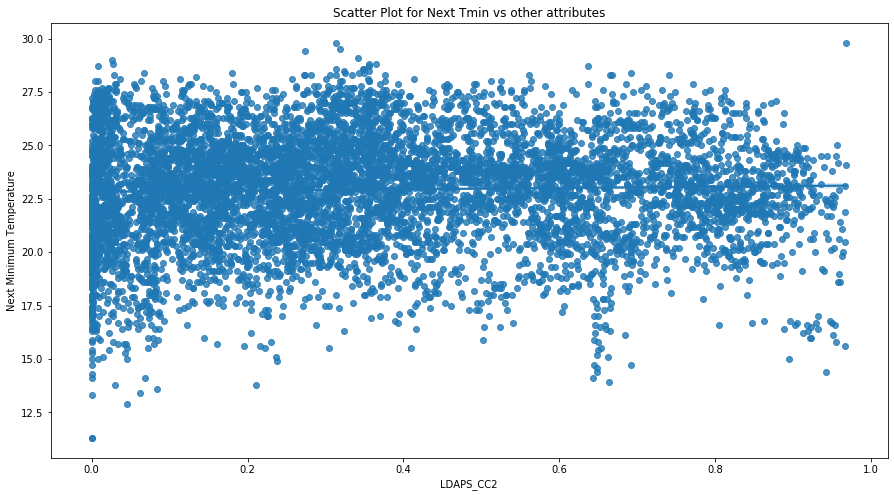

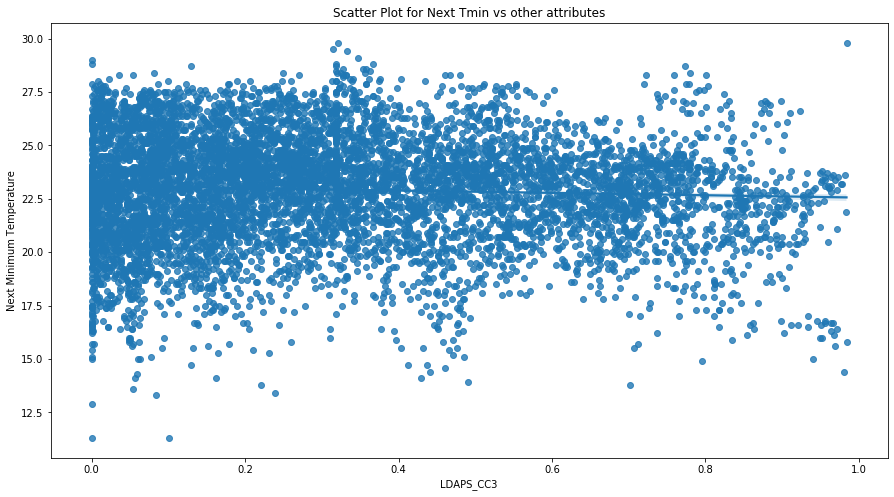

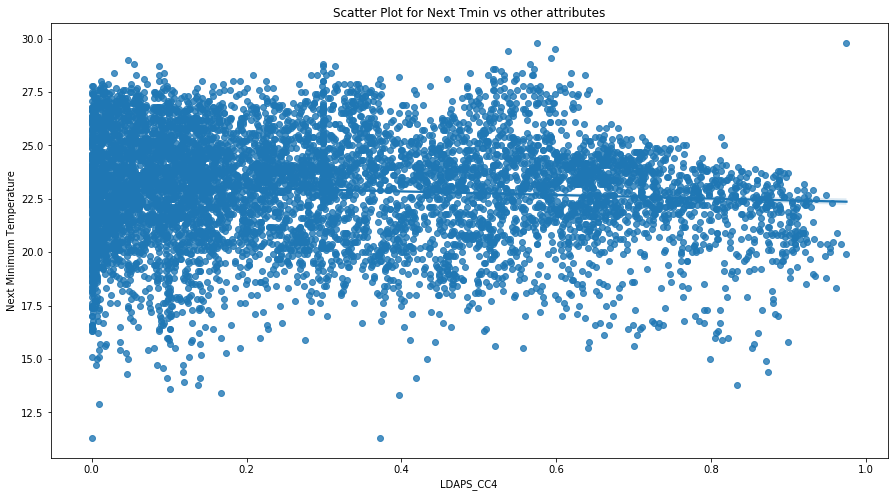

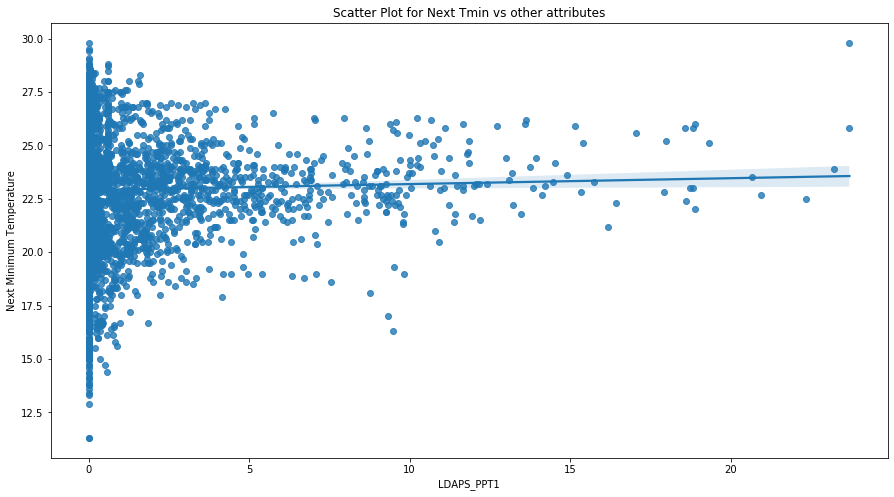

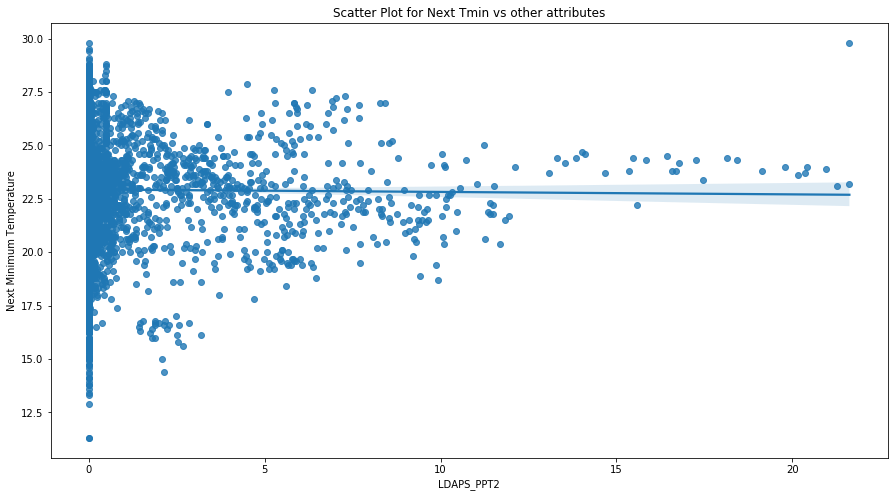

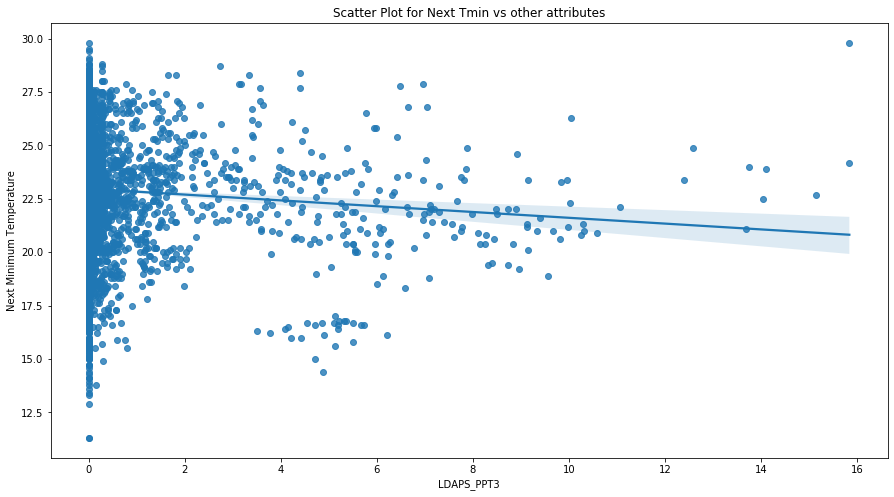

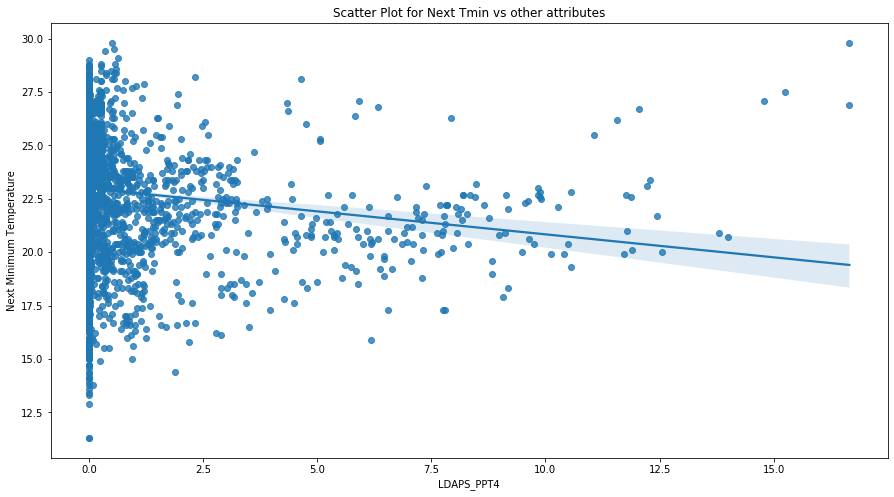

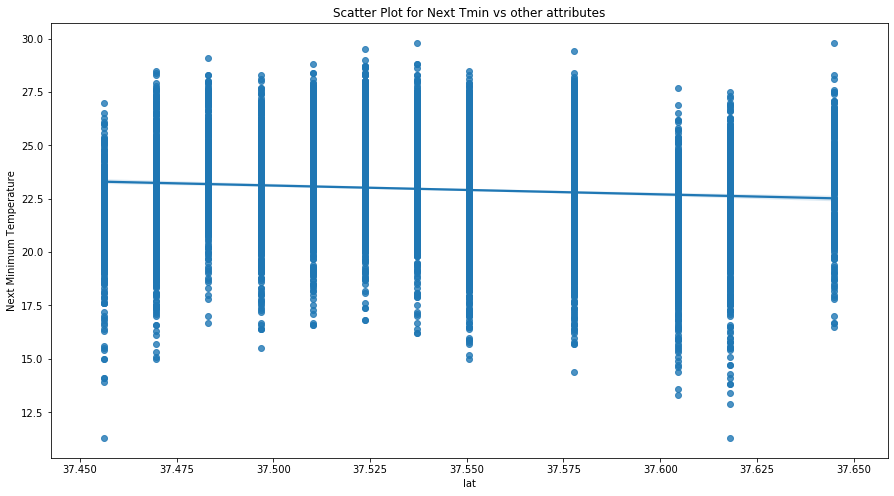

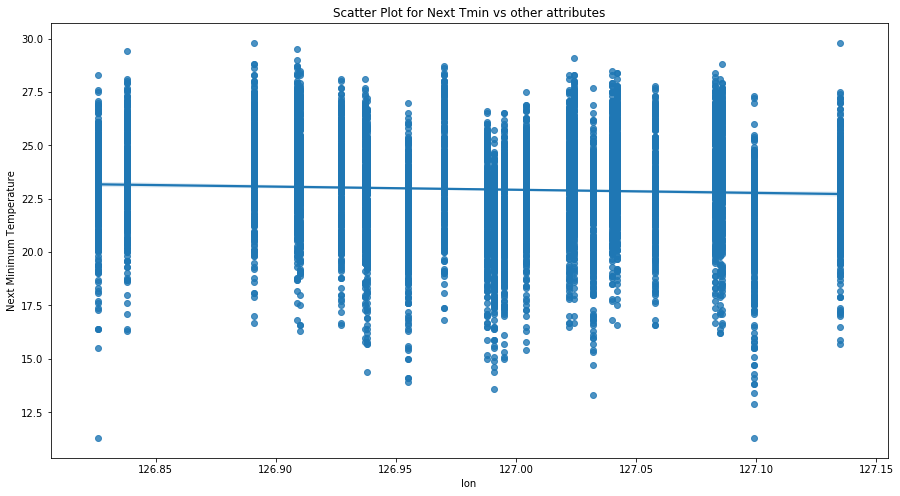

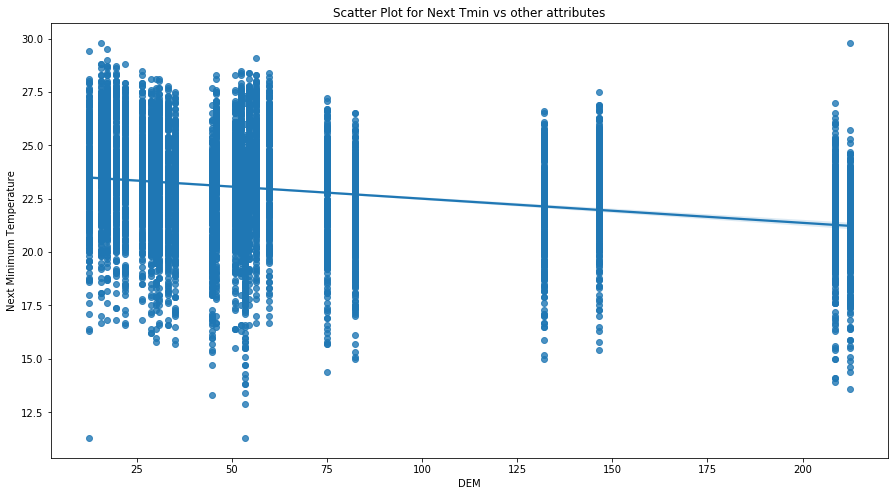

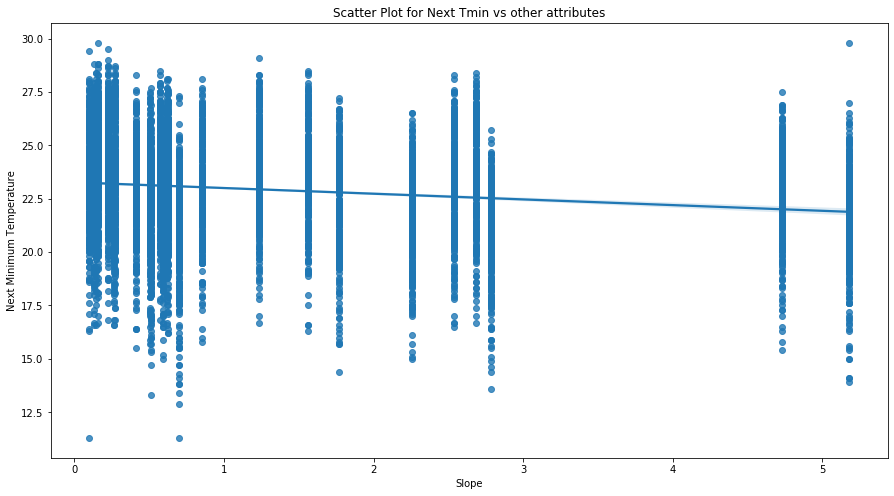

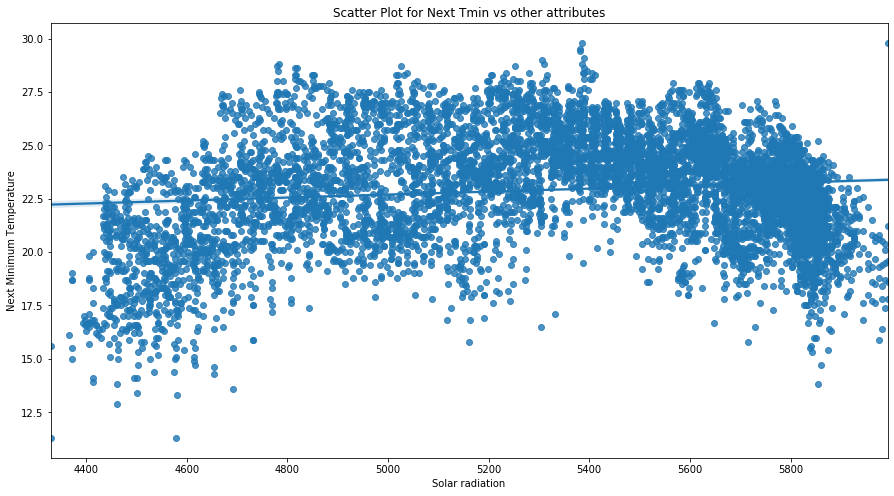

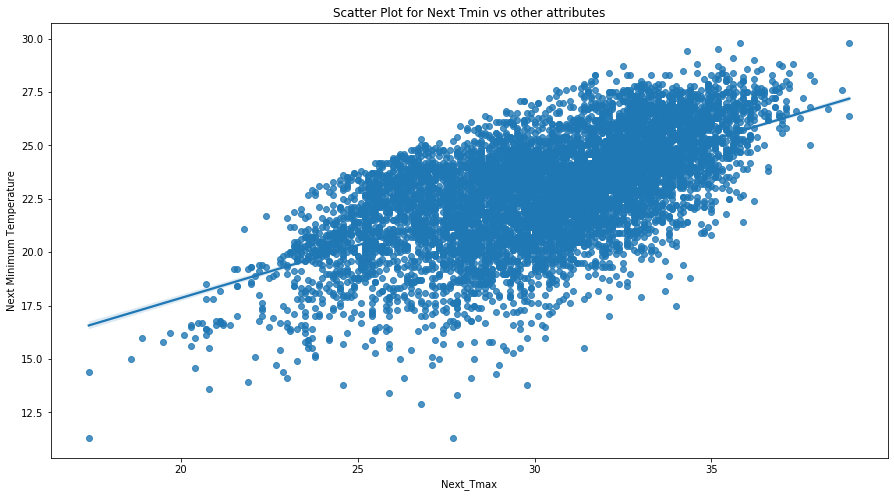

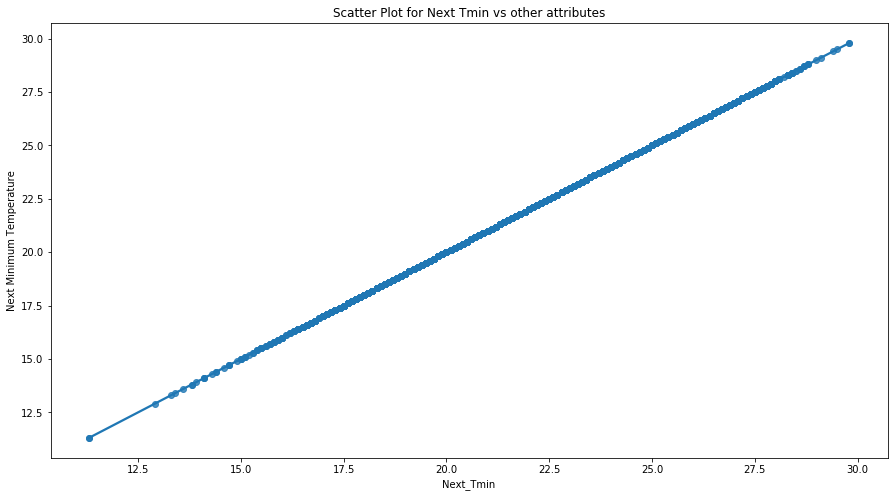

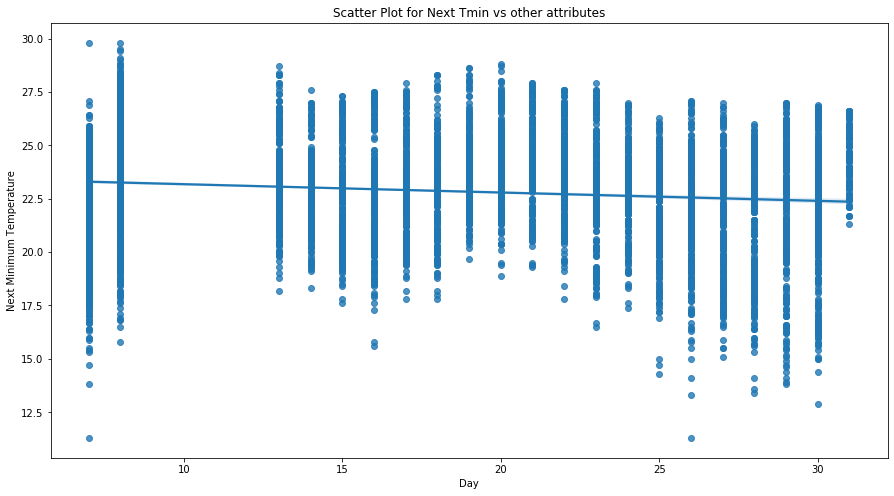

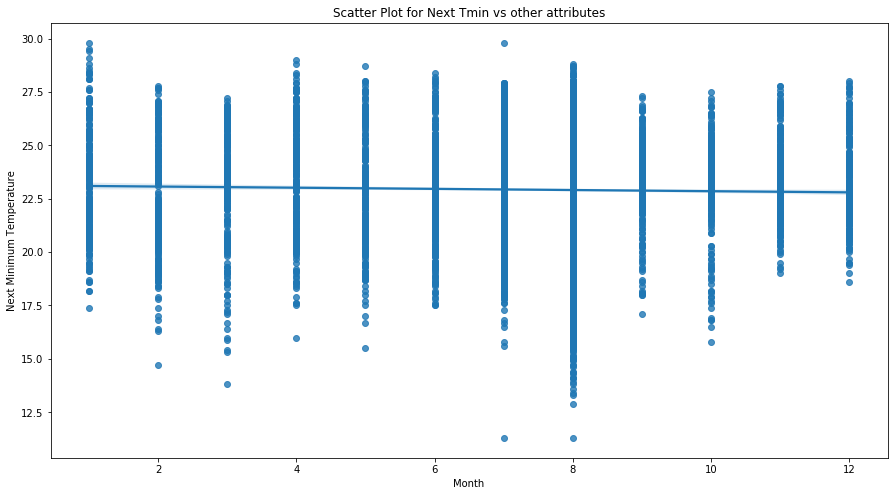

In [24]:
for i in df_new.columns:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    sns.regplot(df_new[i], df_new['Next_Tmin'])
    plt.title('Scatter Plot for Next Tmin vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Next Minimum Temperature')
    plt.show()

Alot of graphs show strong linear relationships between target variables and other columns, while others are not so strong and are somewhat scattered.

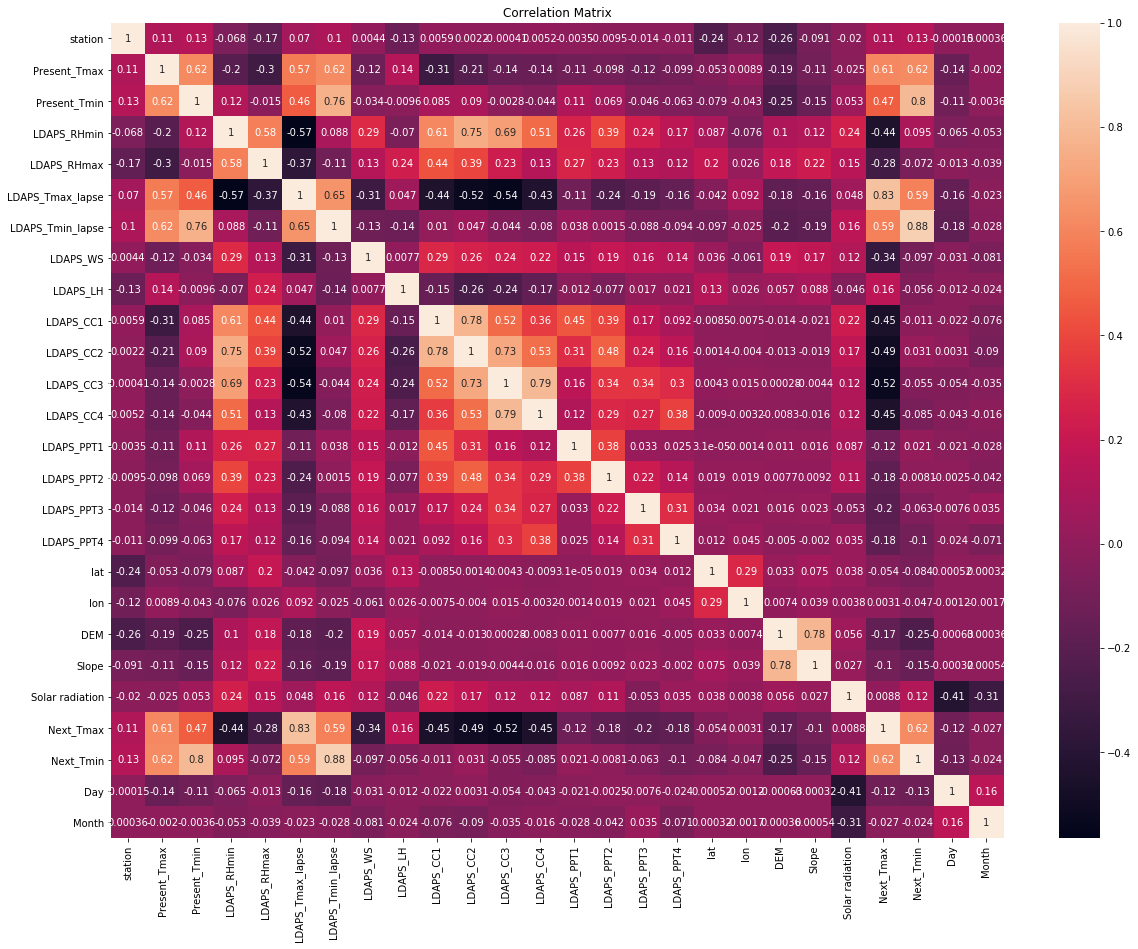

In [25]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df_new.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

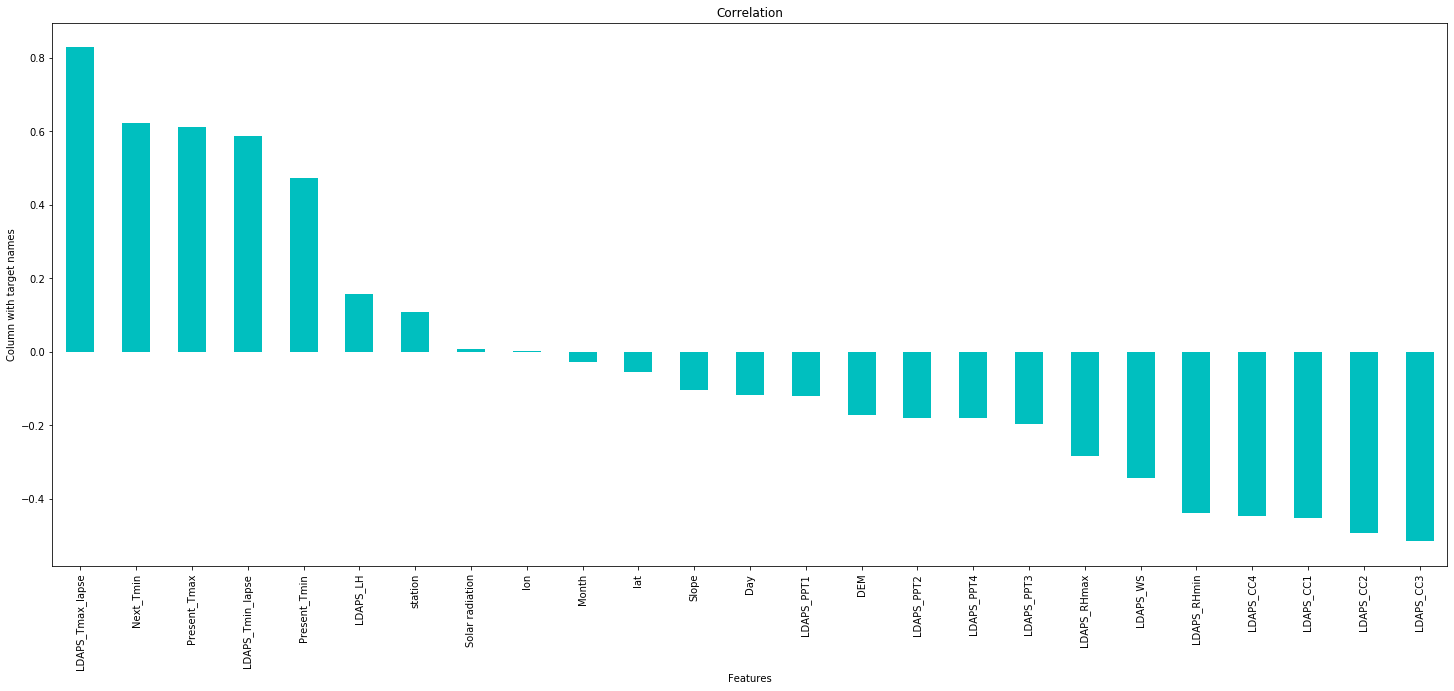

In [26]:
plt.figure(figsize = (25, 10))
df_new.corr()['Next_Tmax'].sort_values(ascending = False).drop(['Next_Tmax']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

LDAPS_Tmin_lapse has the strongest correlation with Next_Tmax at 0.83, apart from that Next_Tmin, Present_Tmax, LDAPS_Tmin_lapse, Present_Tmin have strong positive correlation at 0.62, 0.61, 0.59, 0.57 respectively whereas LDAPS_CC3, LDAPS_CC2, LDAPS_CC1, LDAPS_4, LDAPS_RHmin have strong negative correlation at -0.52, -0.49, -0.45, -0.45, -0.44 respectively.

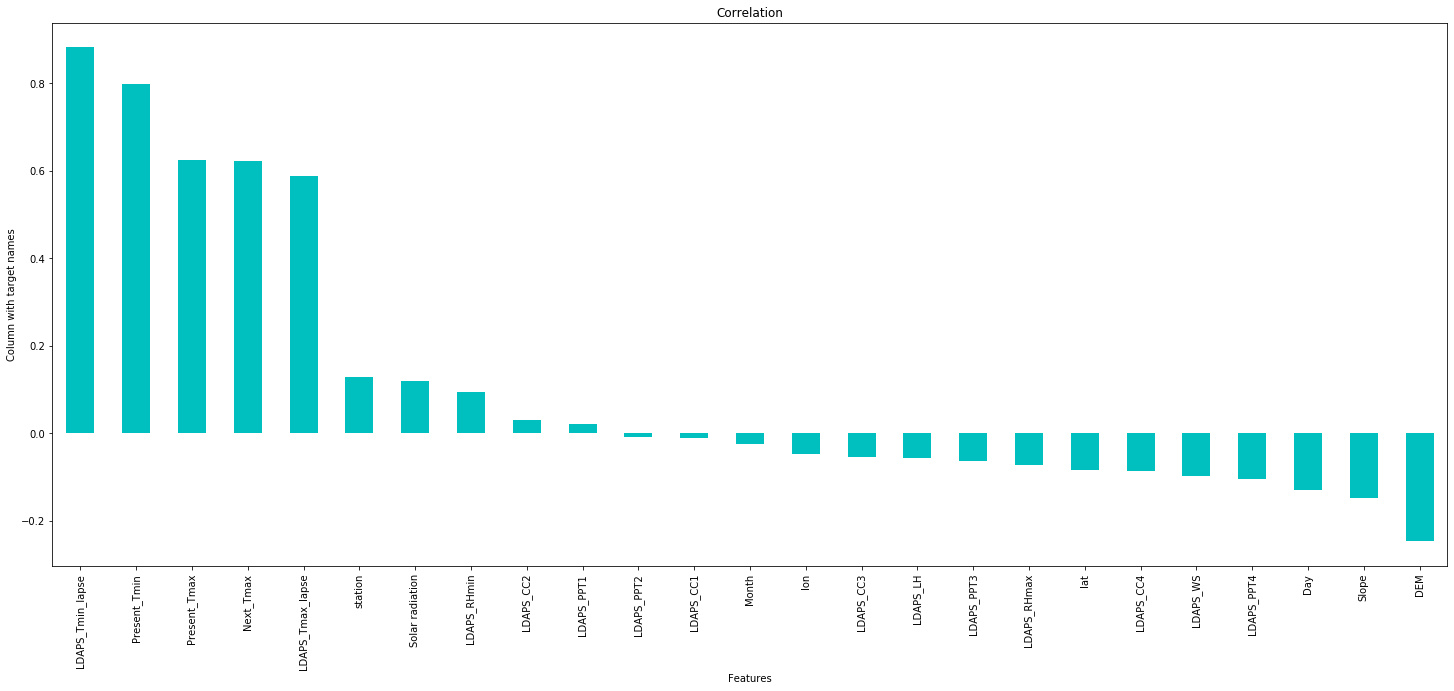

In [27]:
plt.figure(figsize = (25, 10))
df_new.corr()['Next_Tmin'].sort_values(ascending = False).drop(['Next_Tmin']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

LDAPS_Tmin_lapse and Present_Tmin has the highest correlation with Next_Tmin at 0.88 and 0.8 respectively, apart from that Present_Tmax, Next_Tmax and LDAPS_Tmax_lapse also have high positive correlation at 0.62, 0.62, 0.59 respectively while DEM has the strongest negative correlation at -0.25.

# Outliers and Skewness

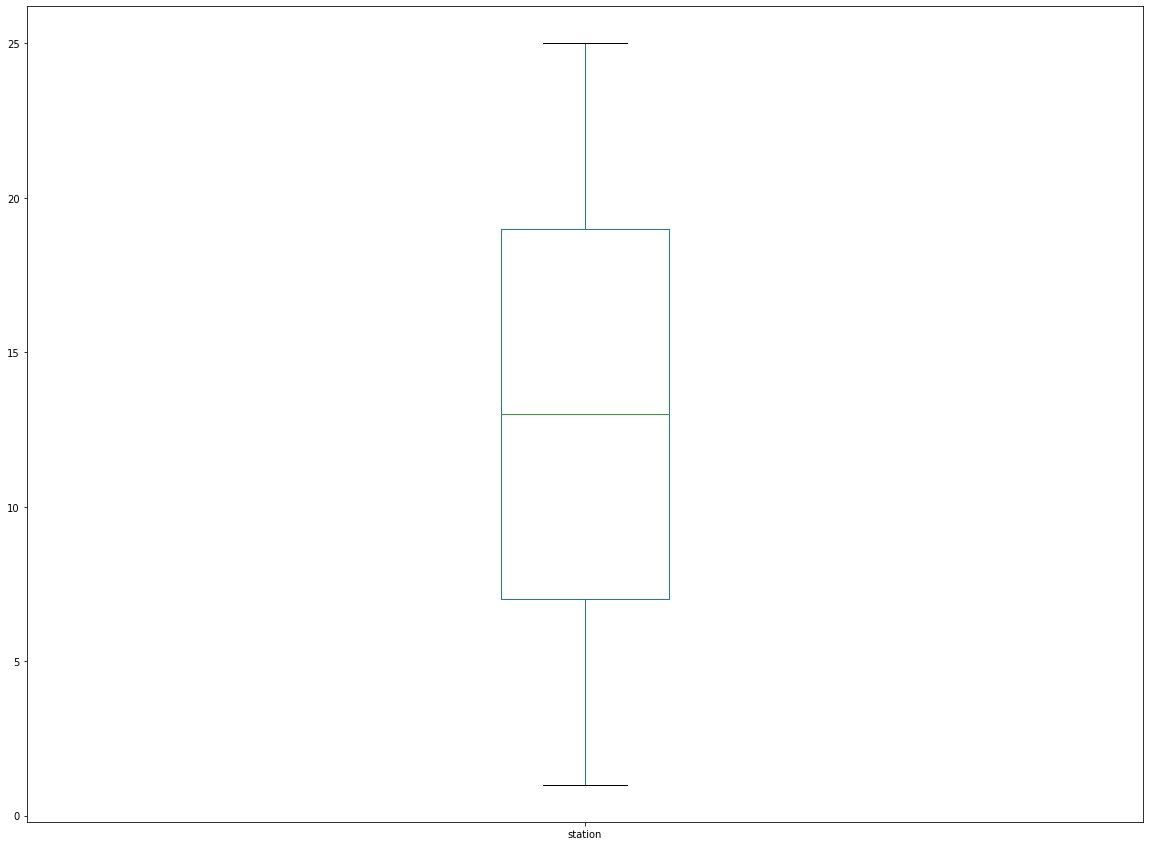

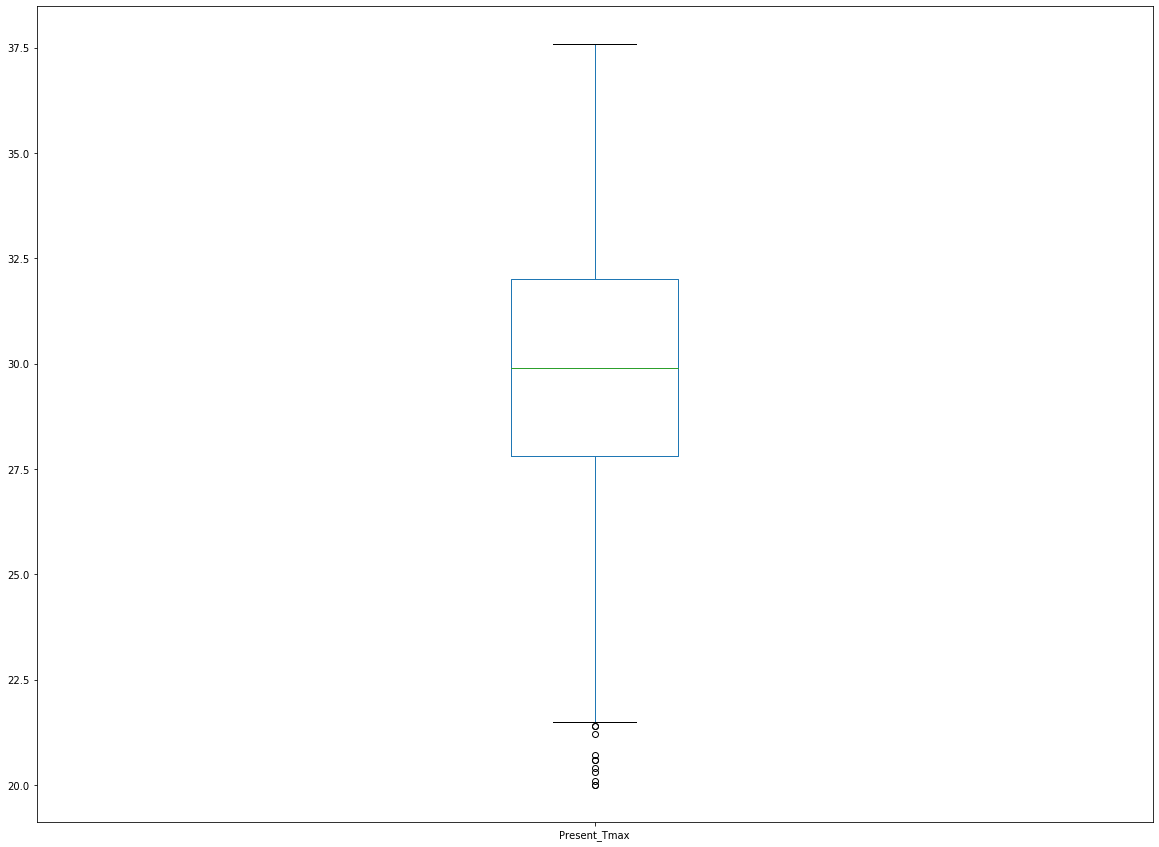

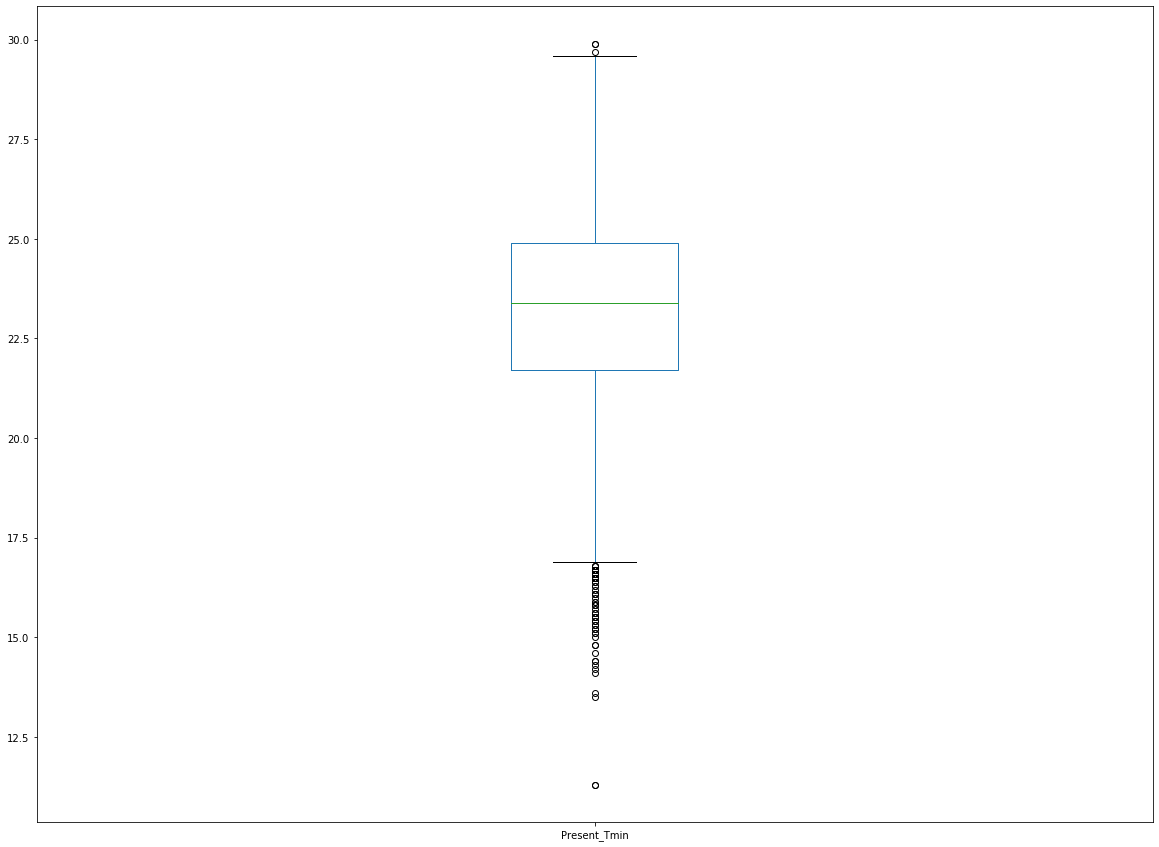

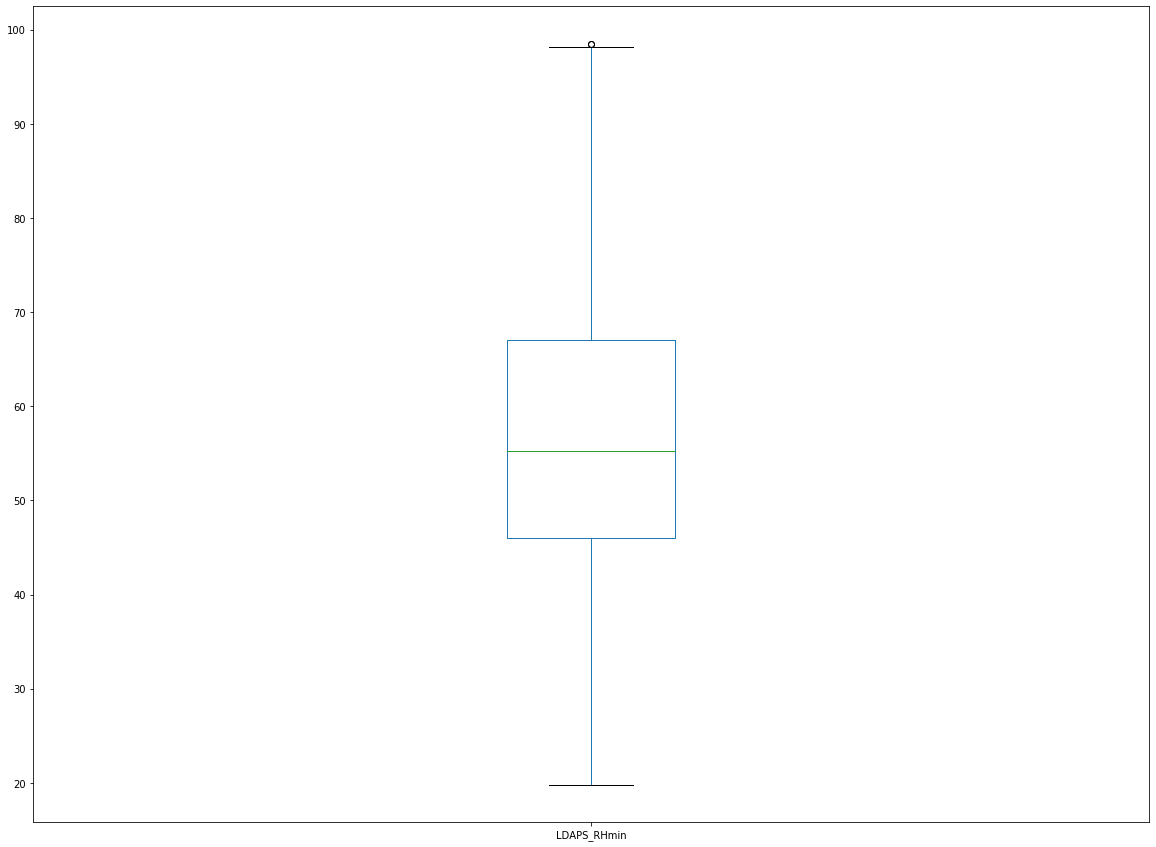

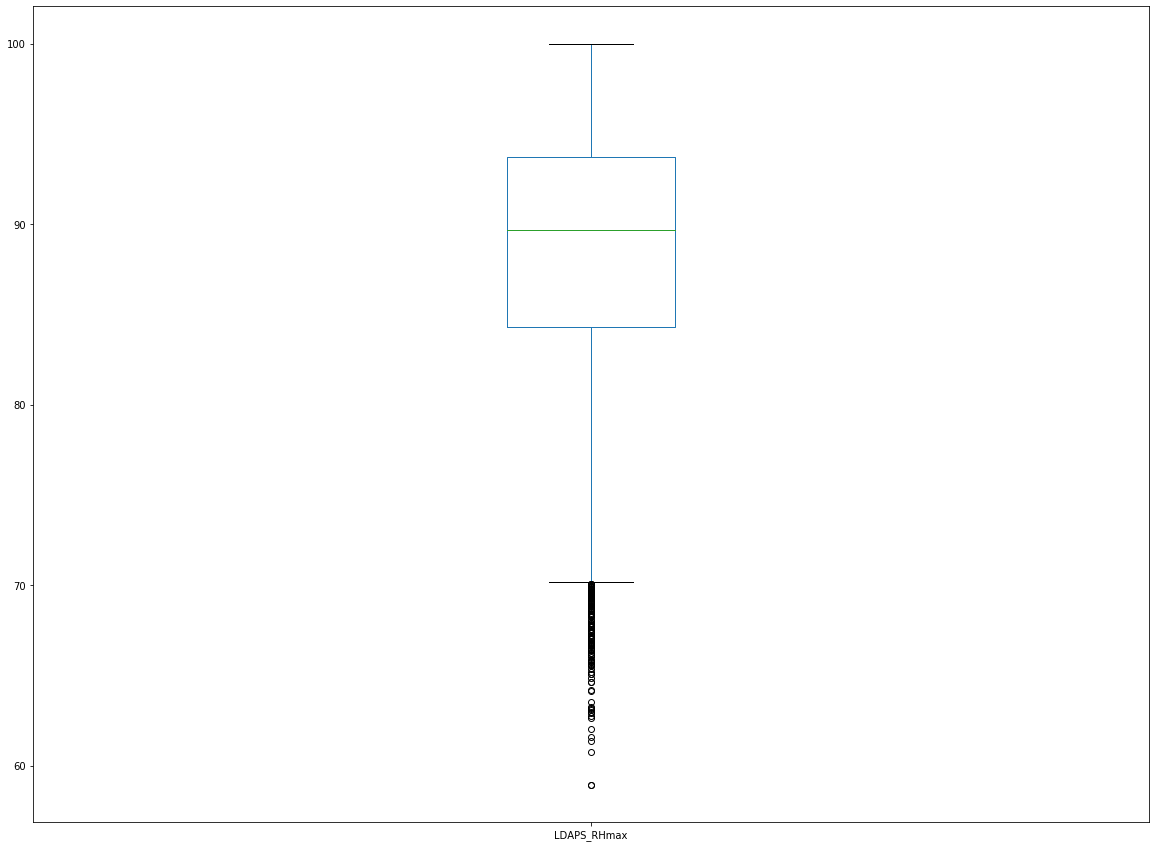

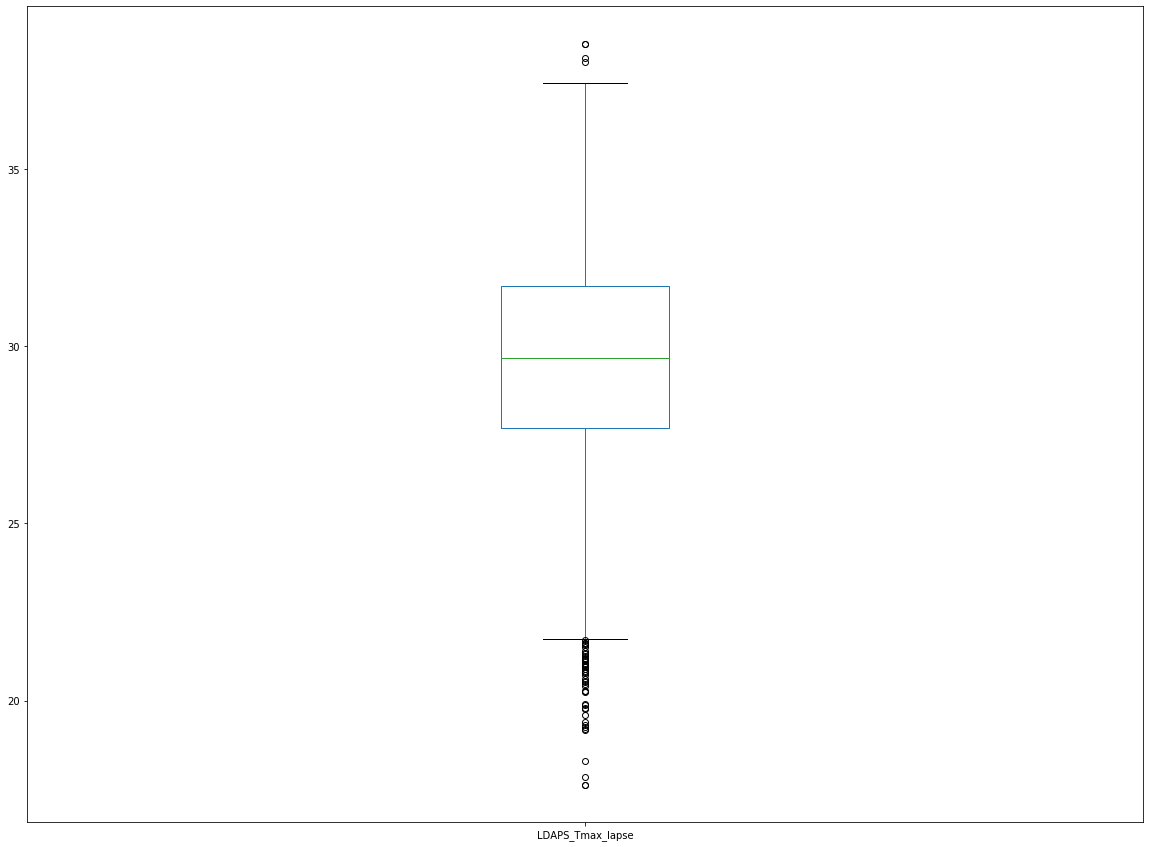

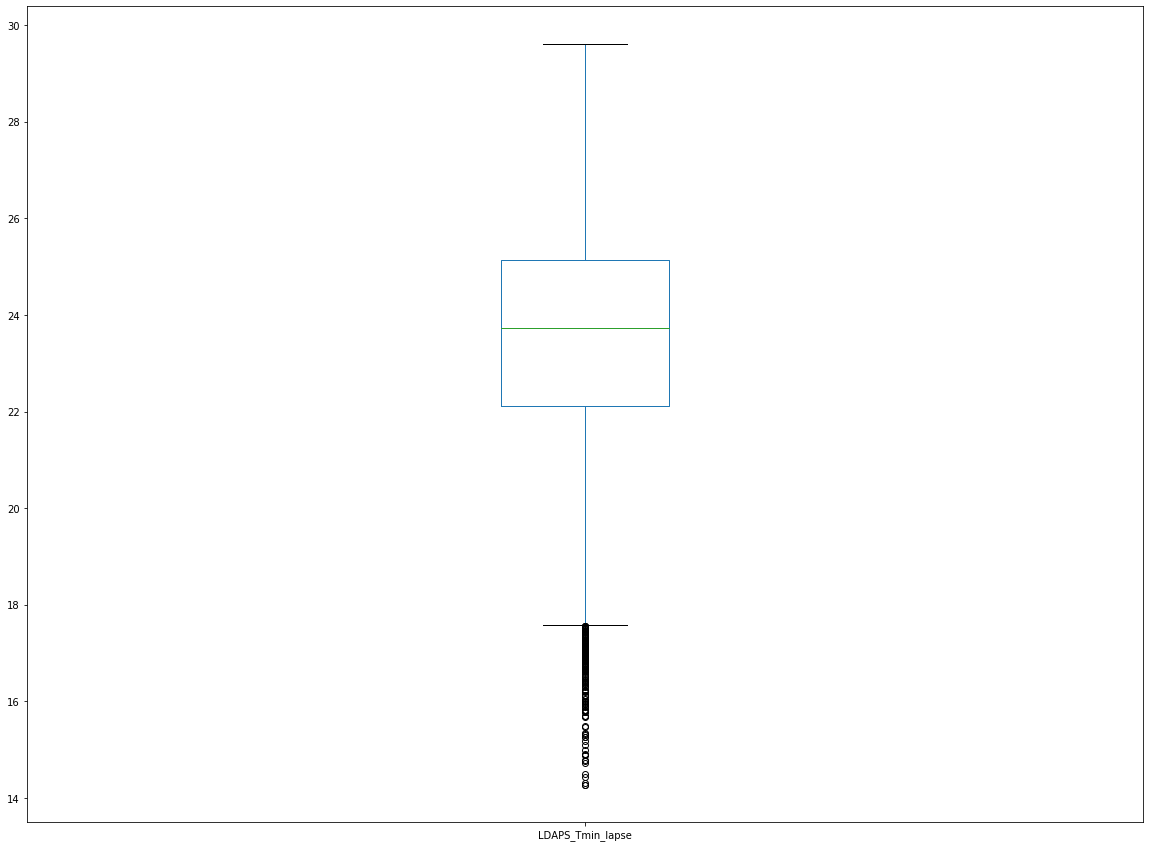

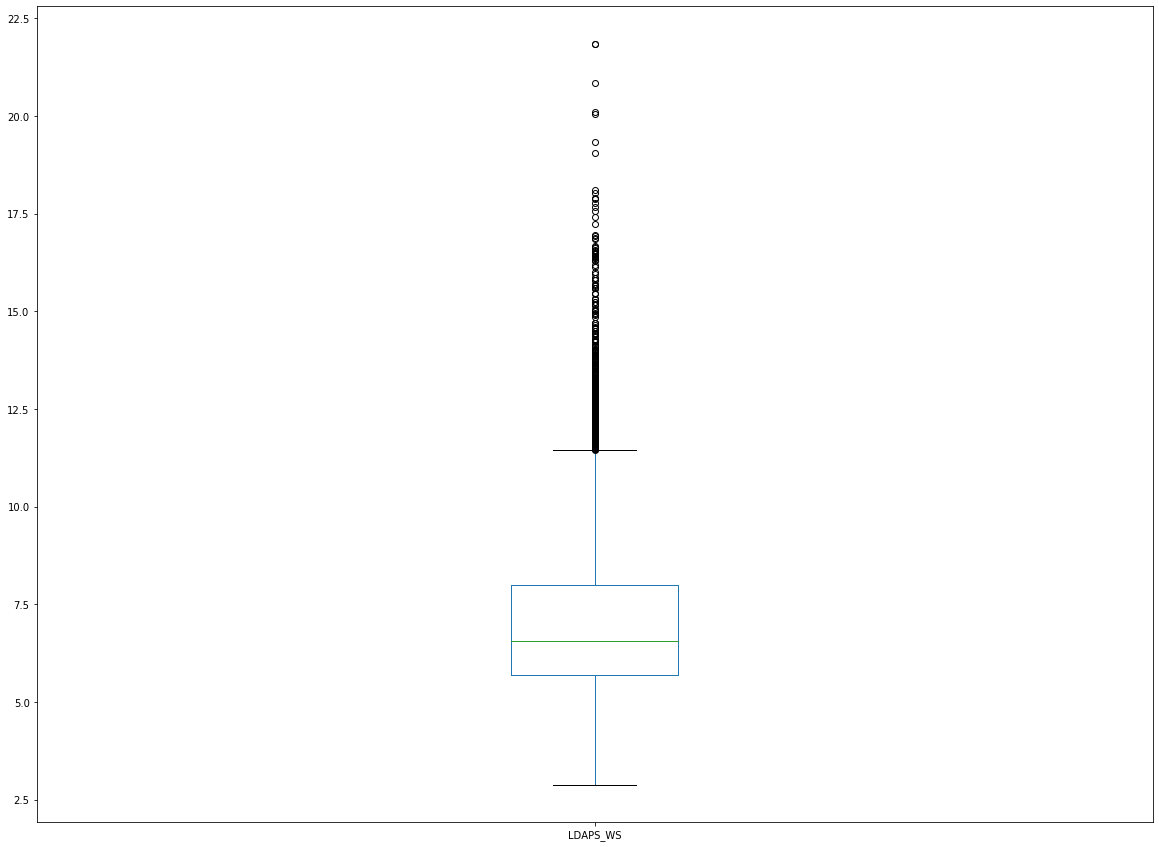

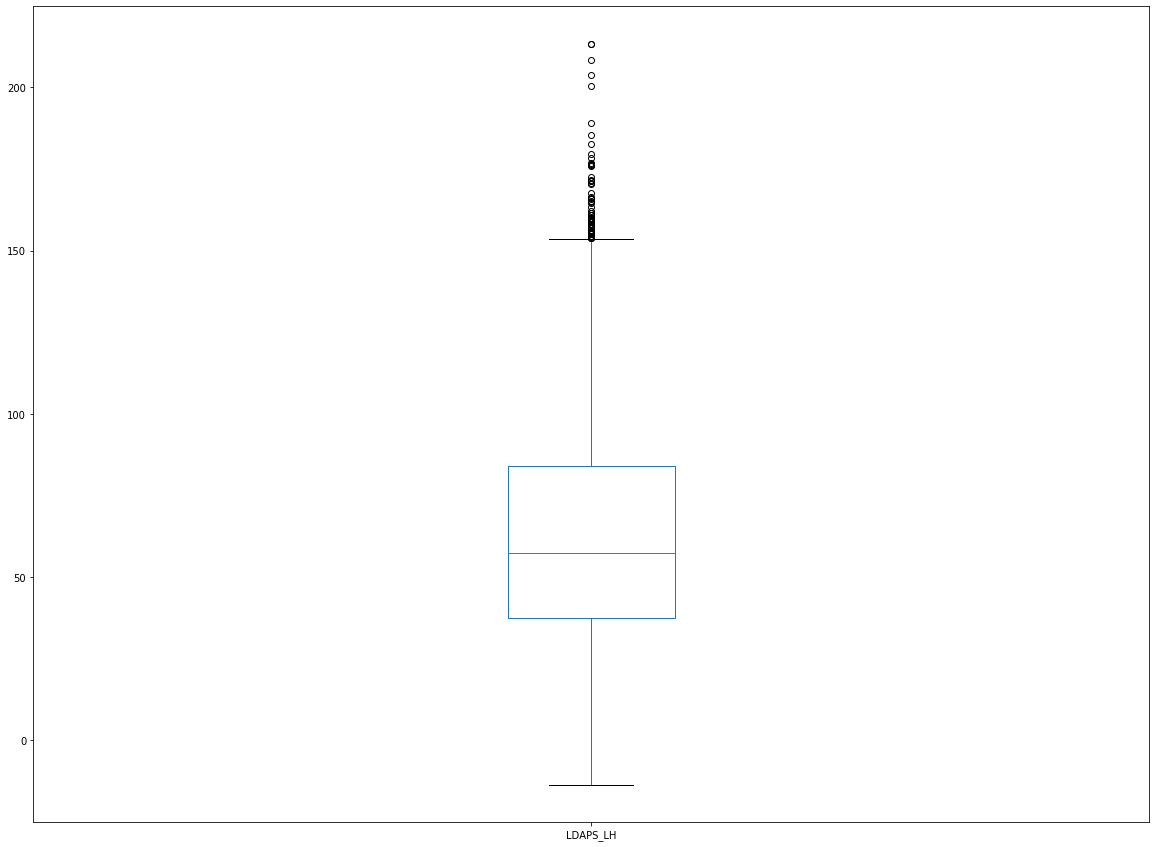

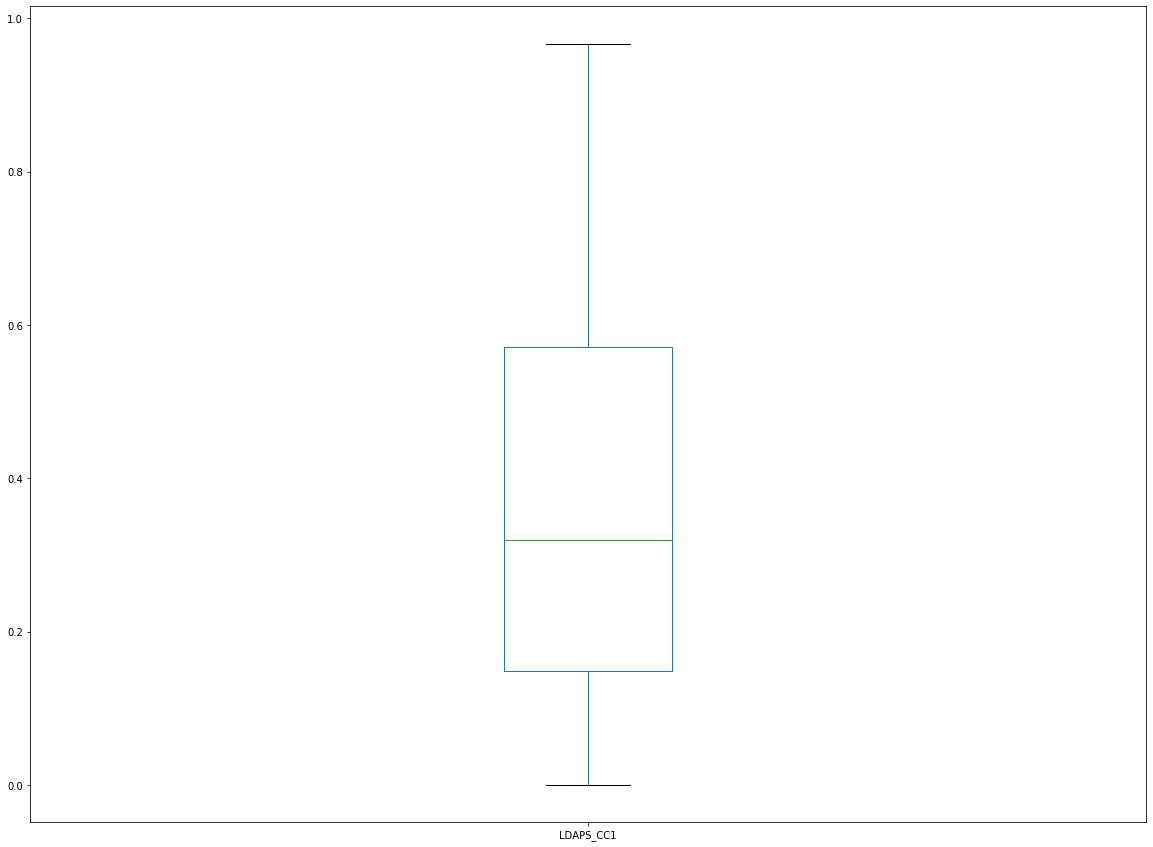

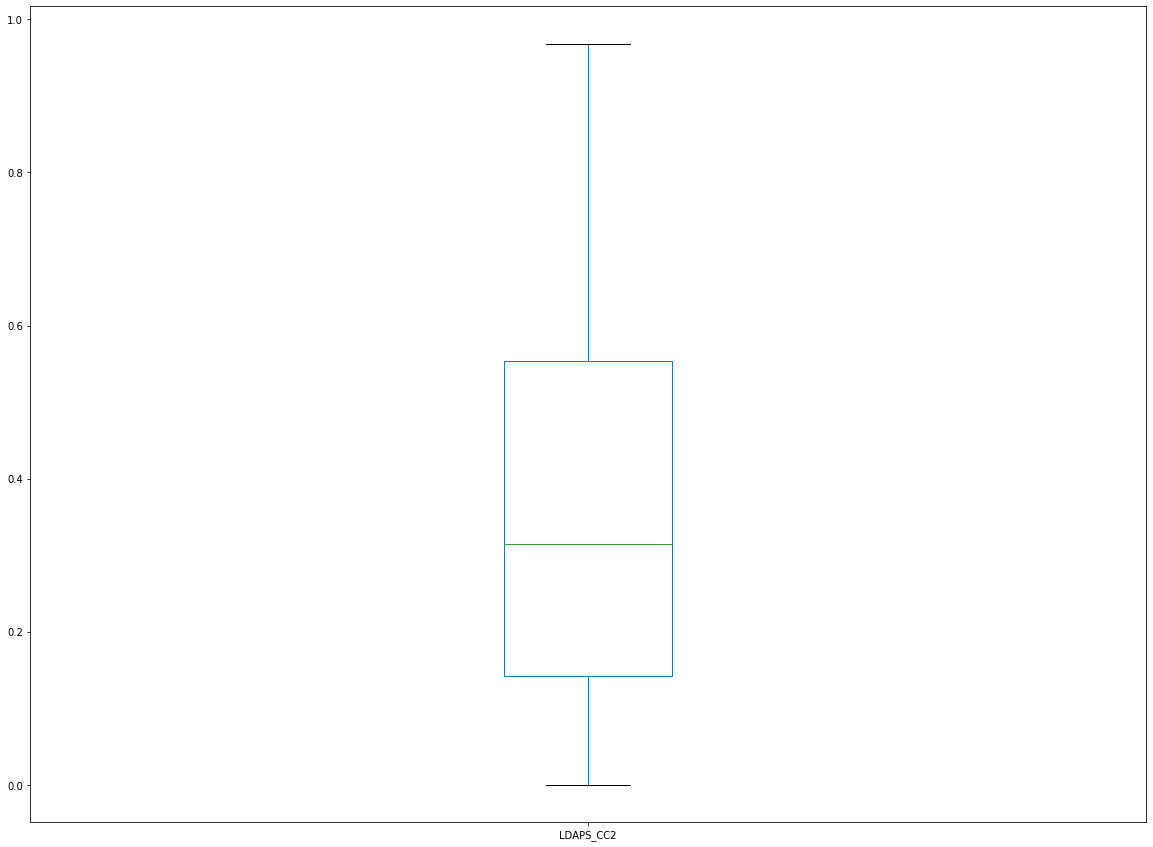

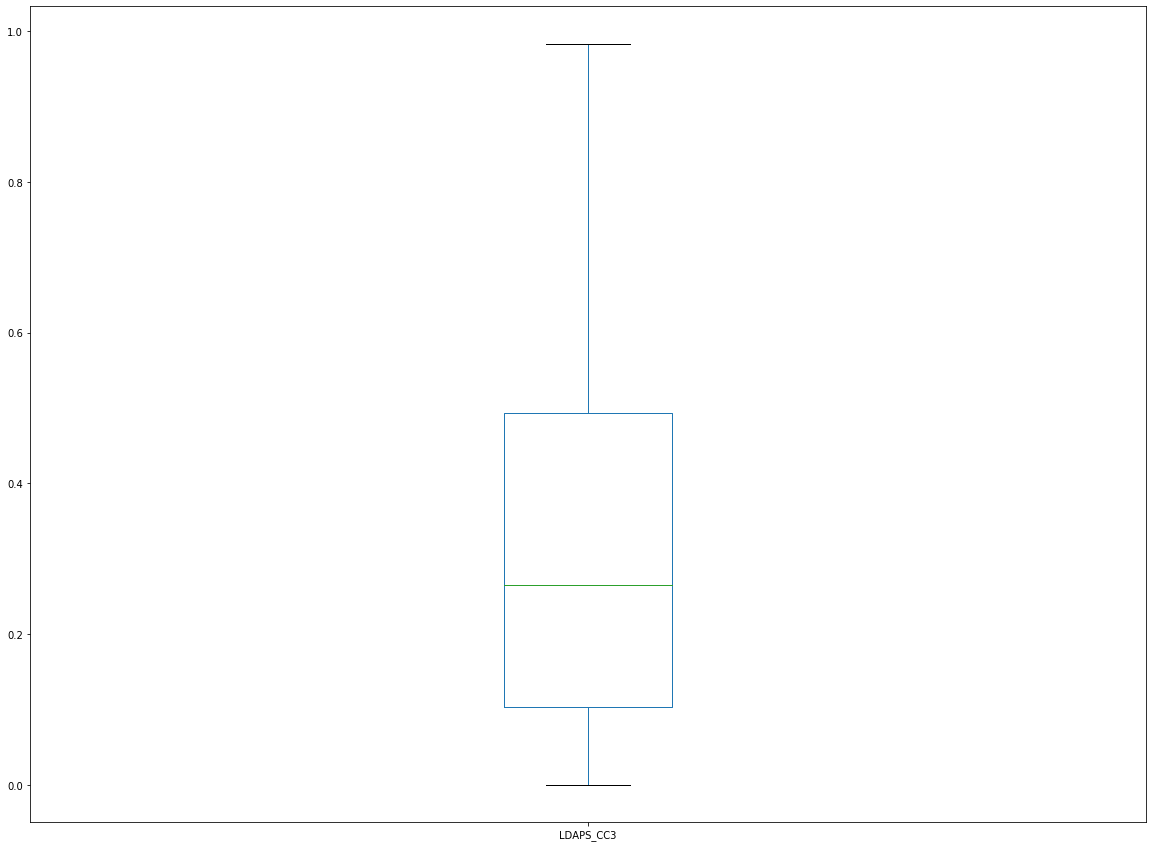

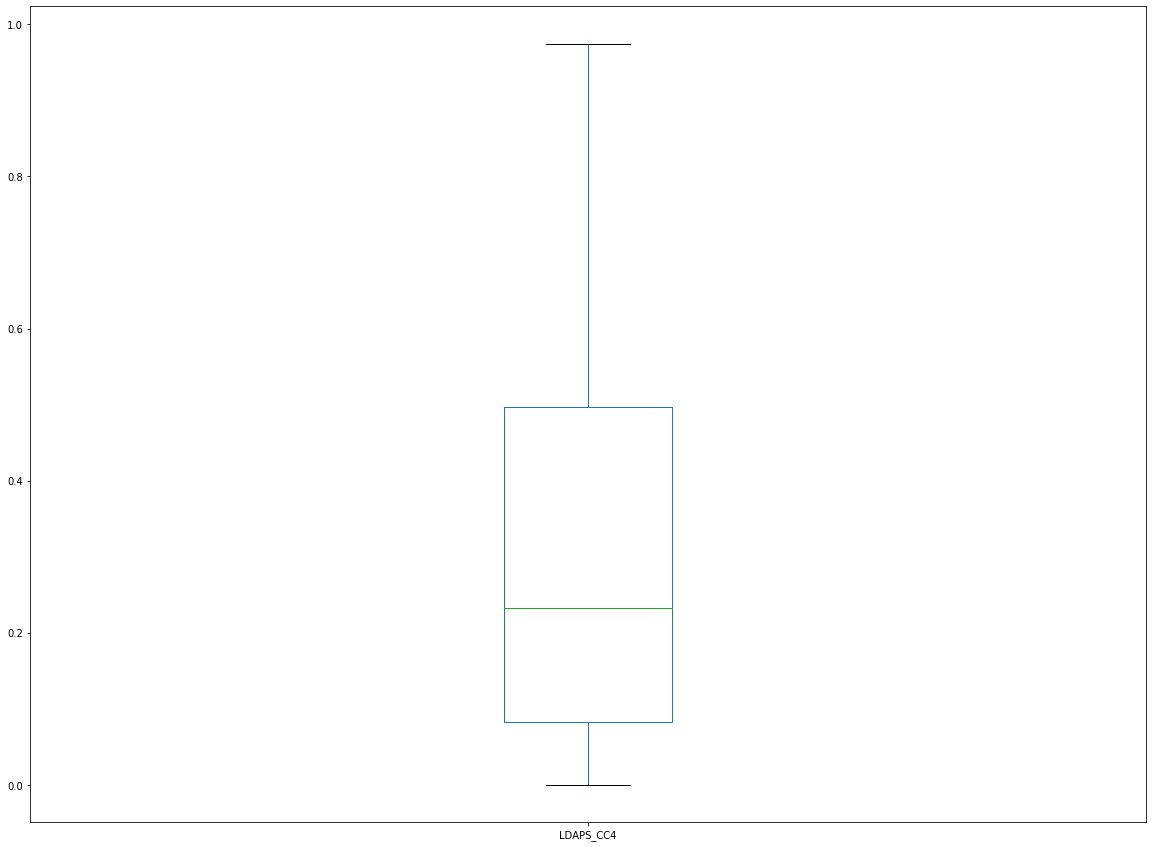

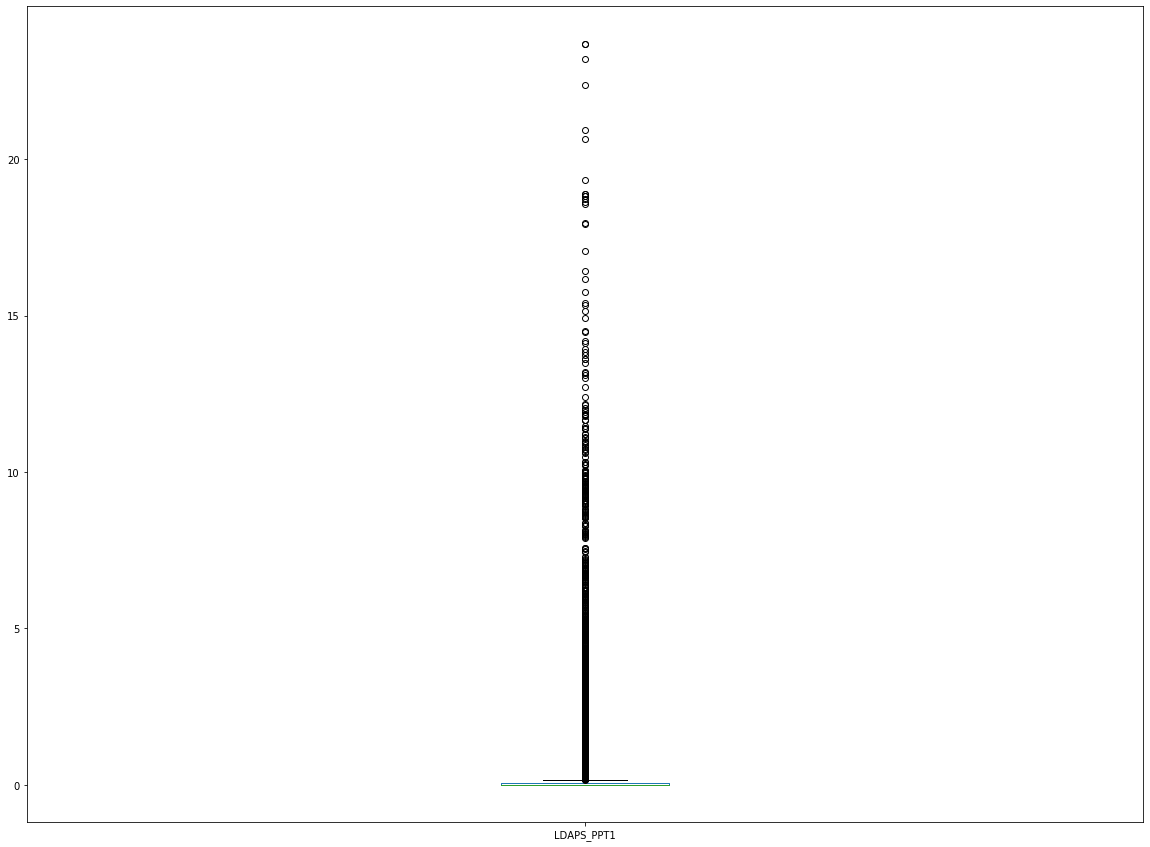

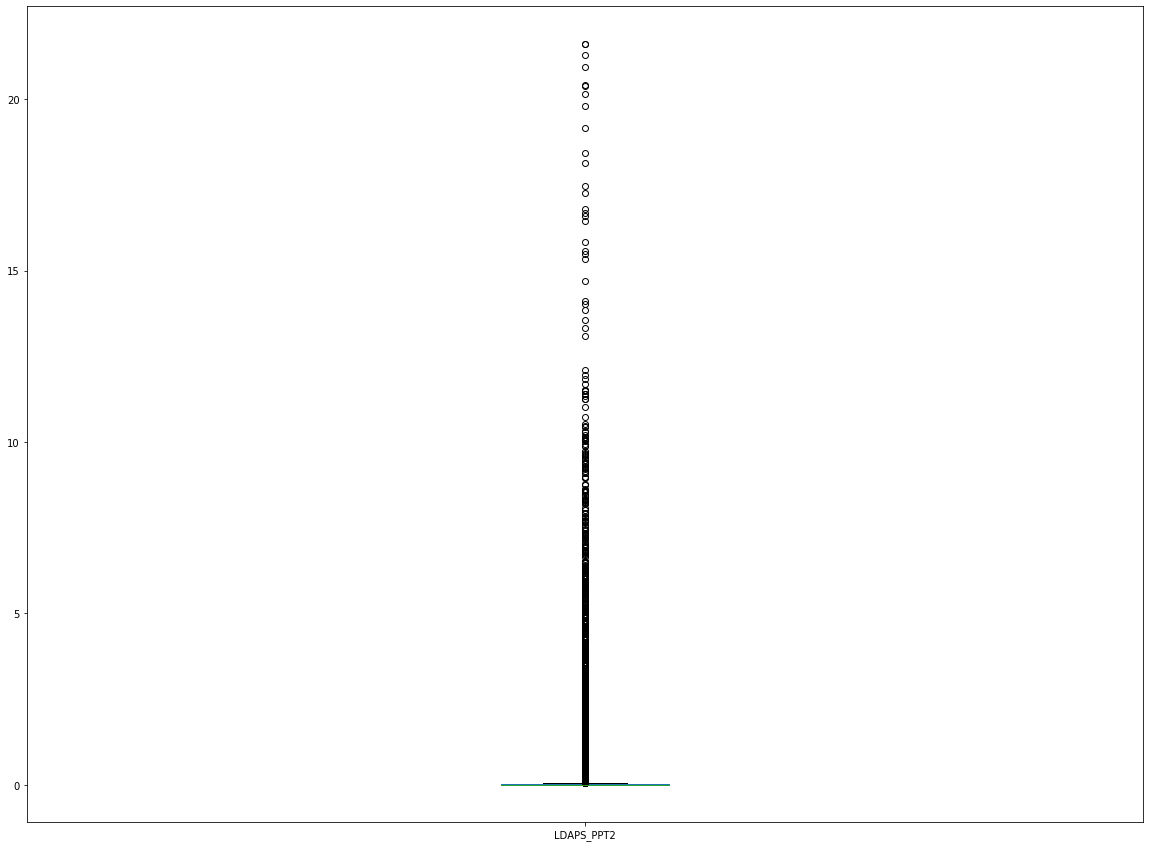

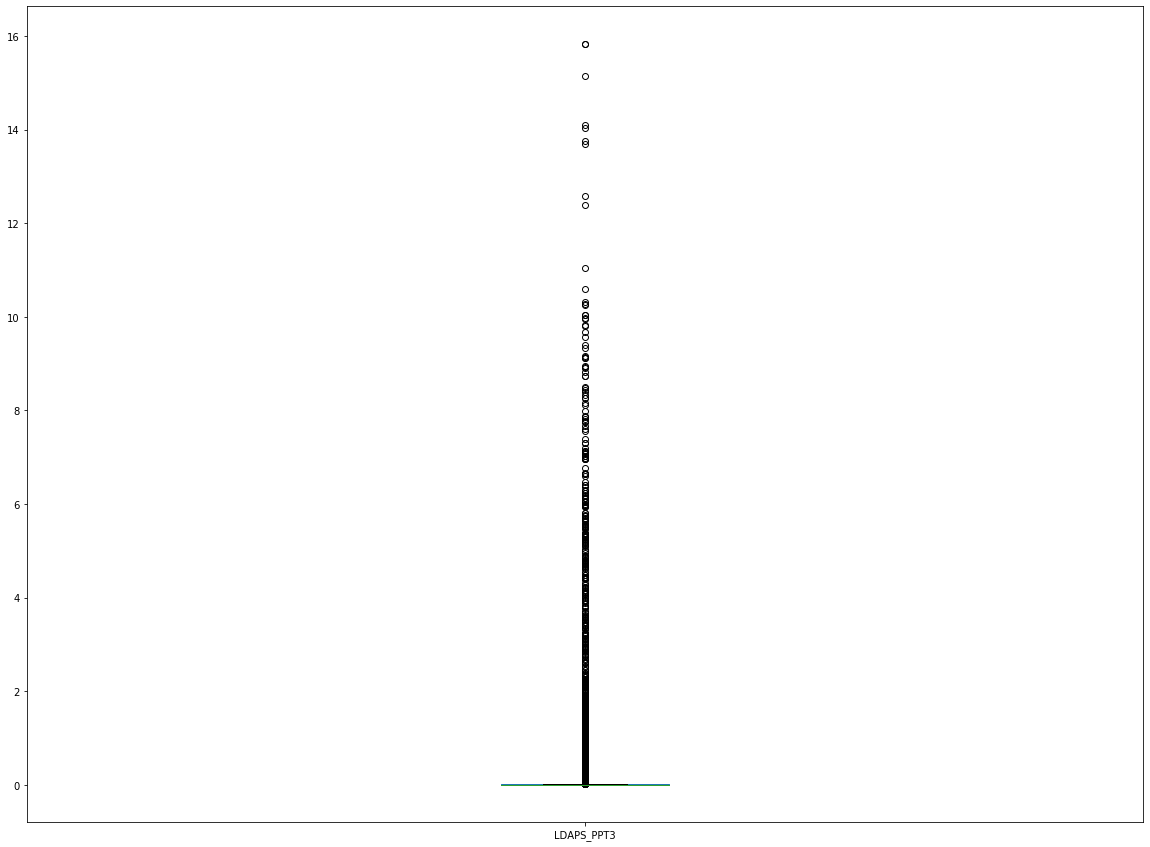

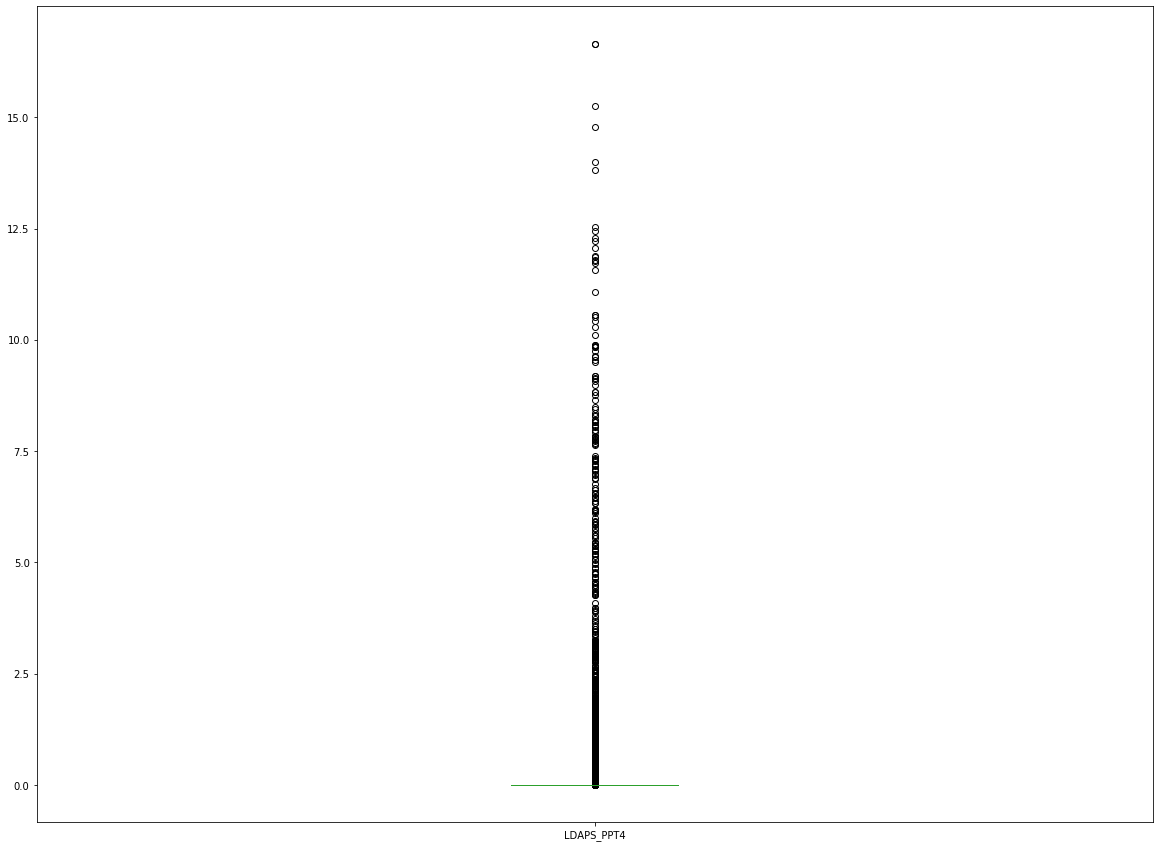

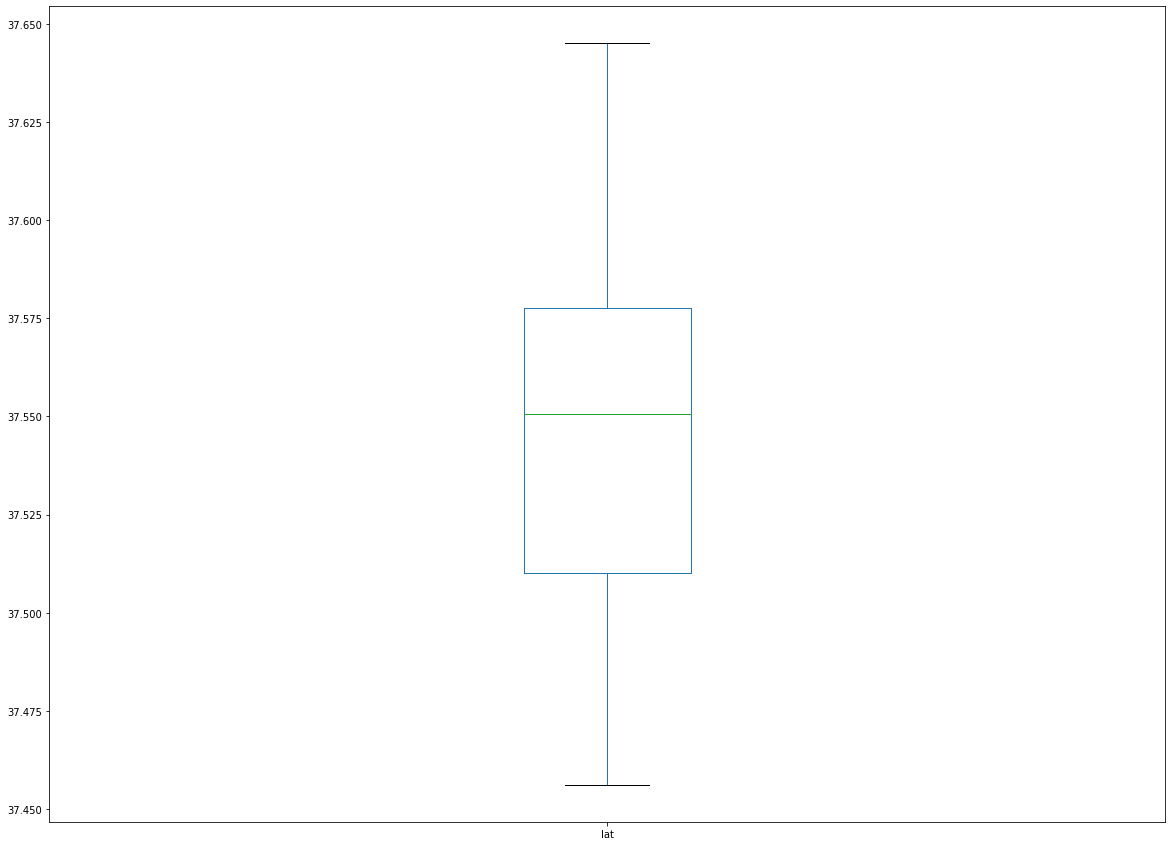

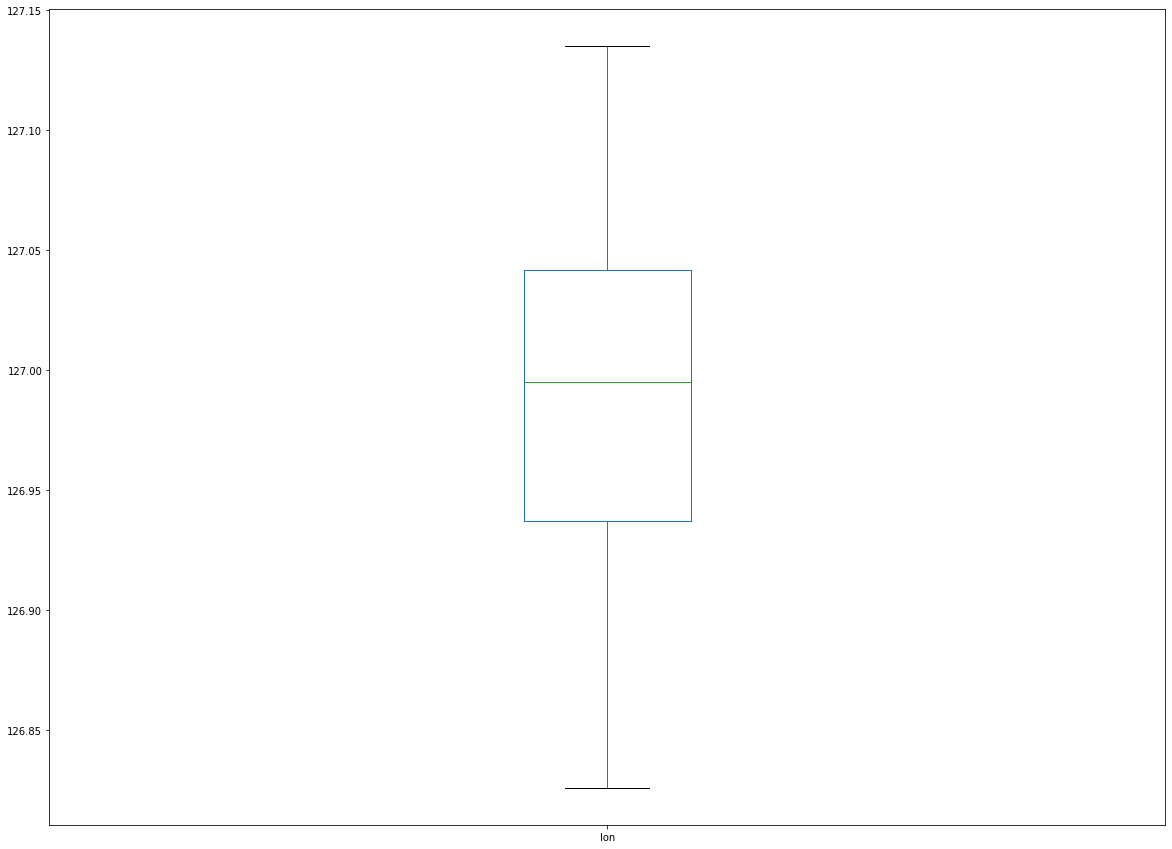

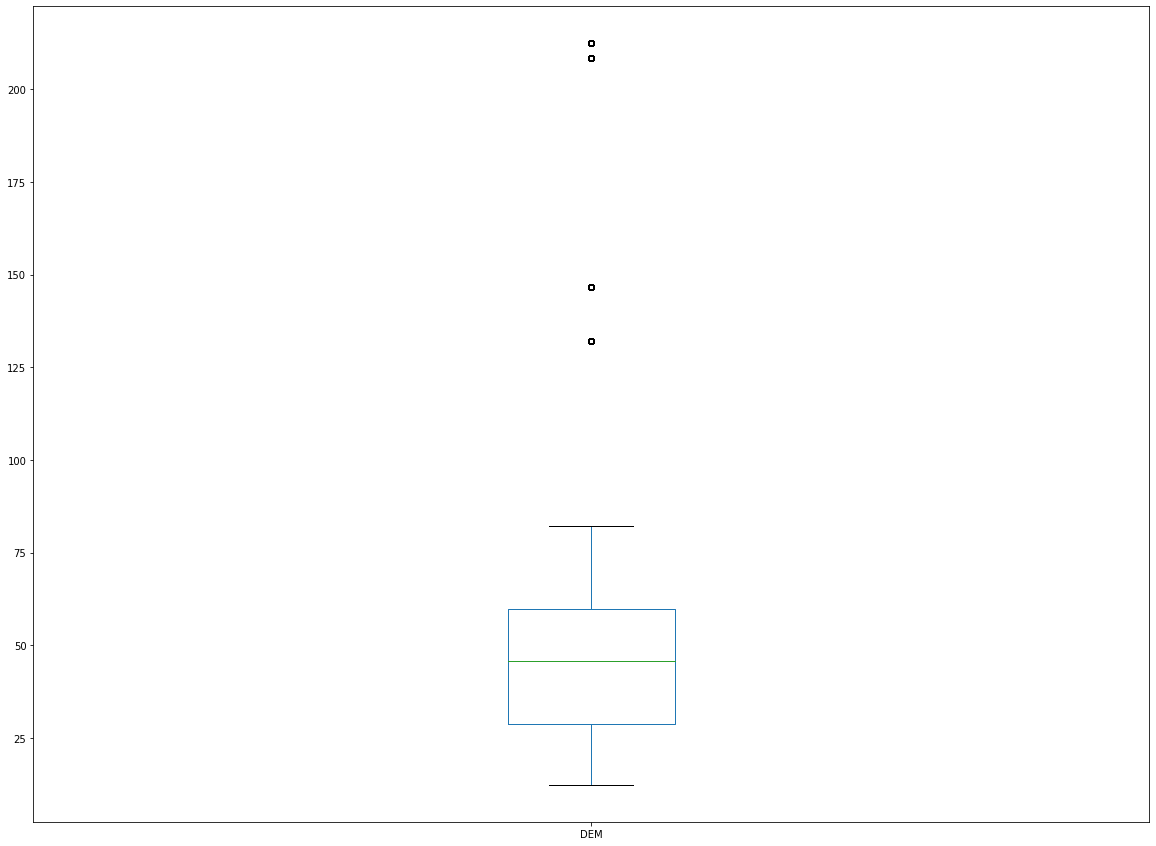

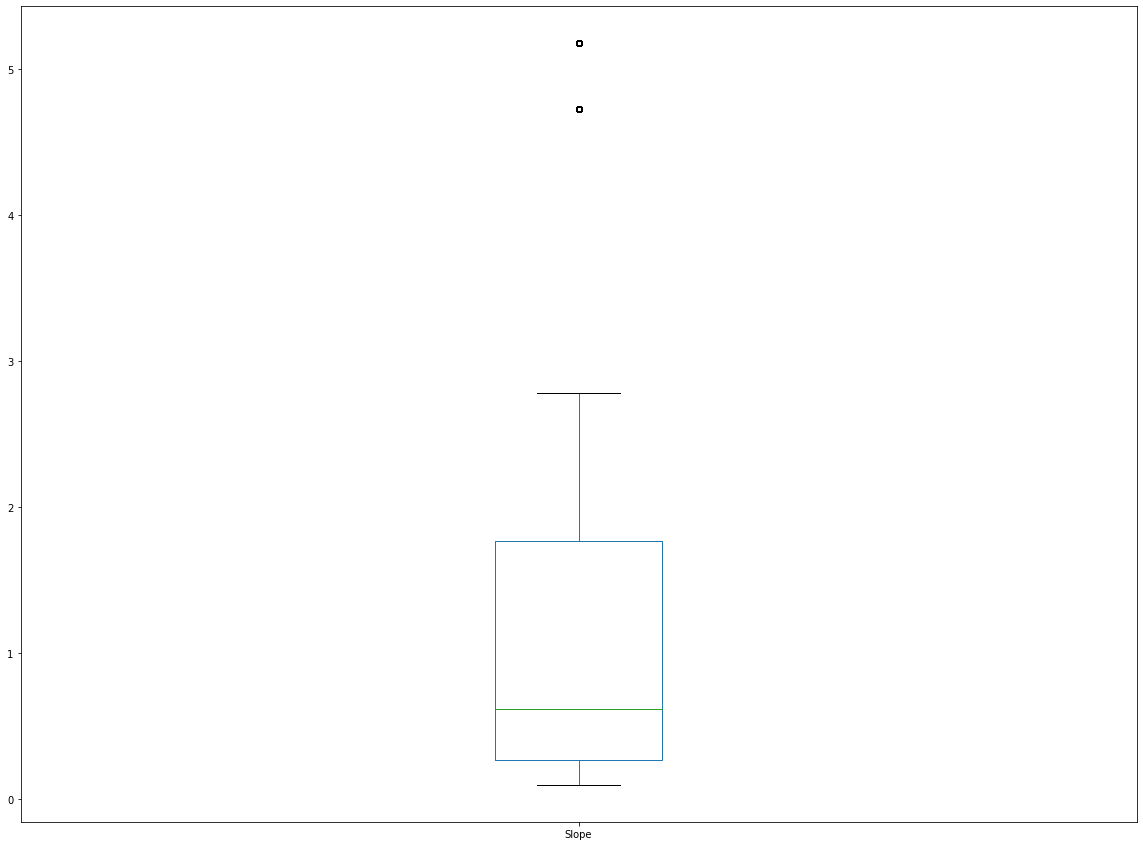

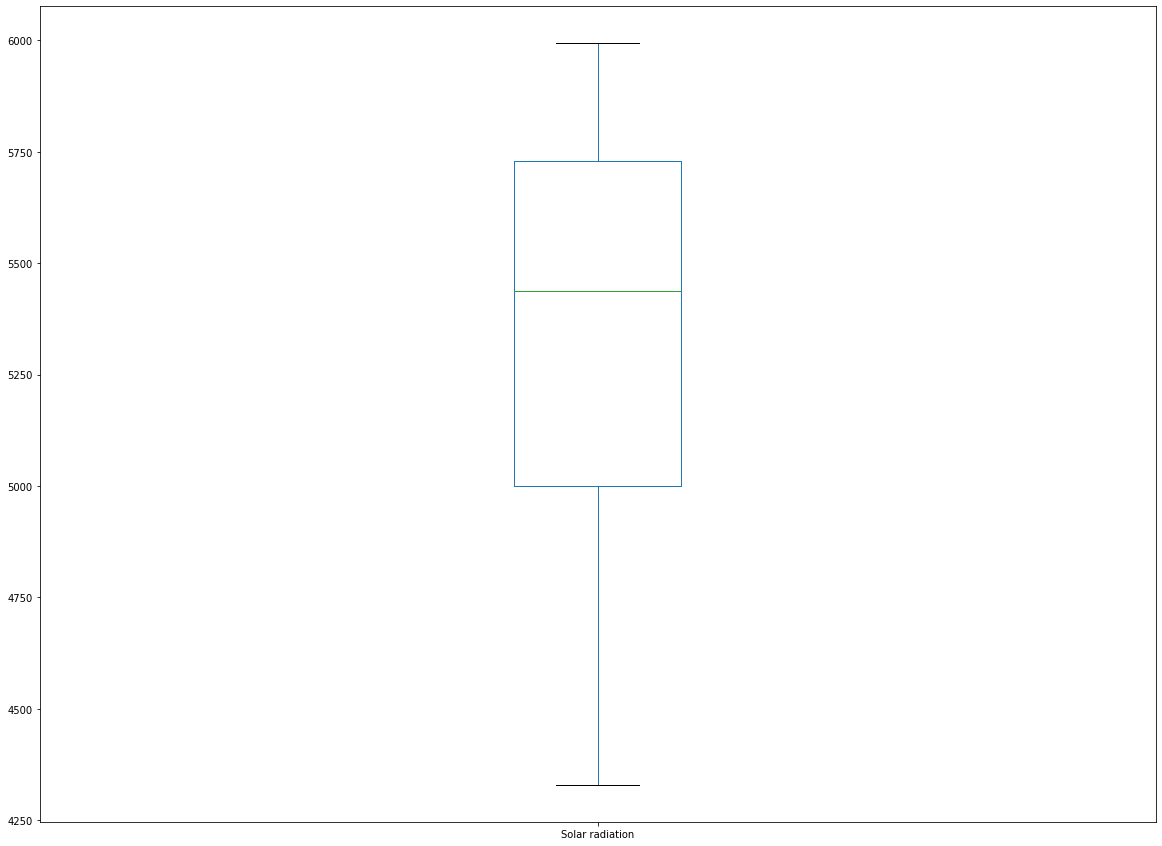

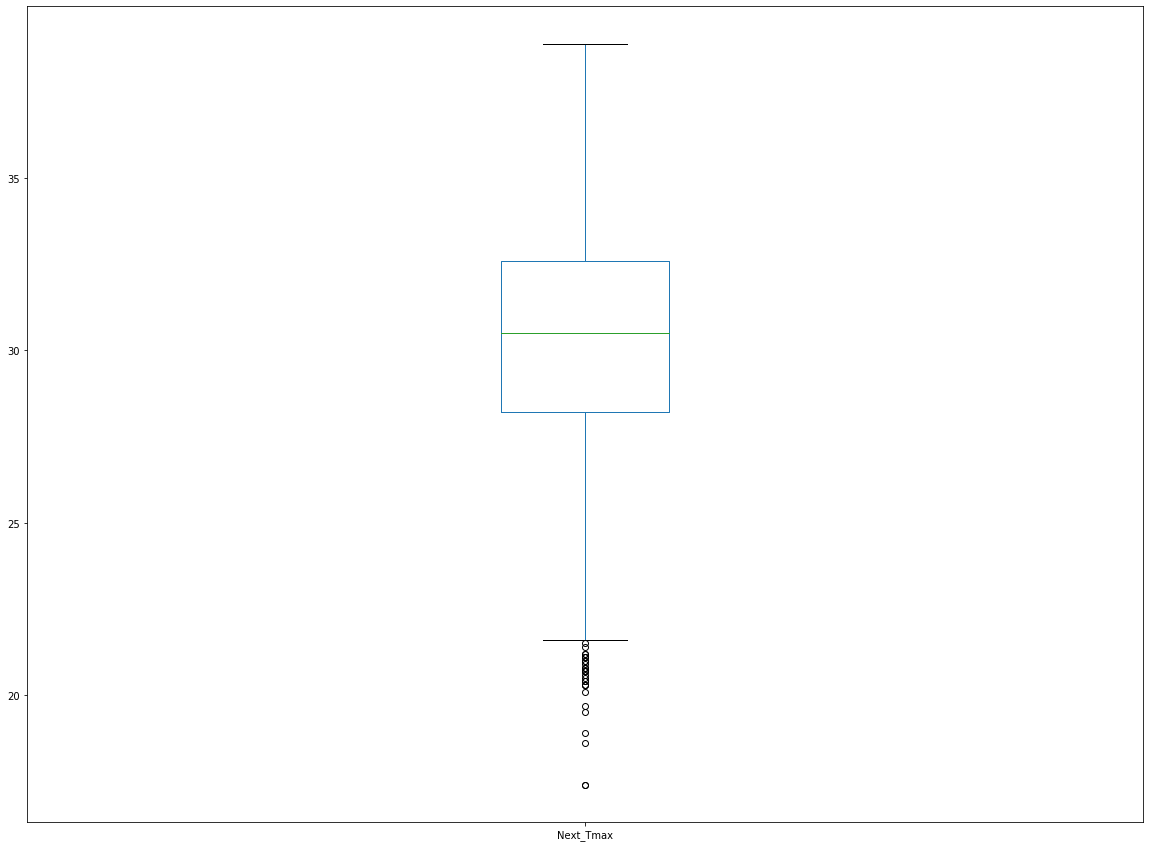

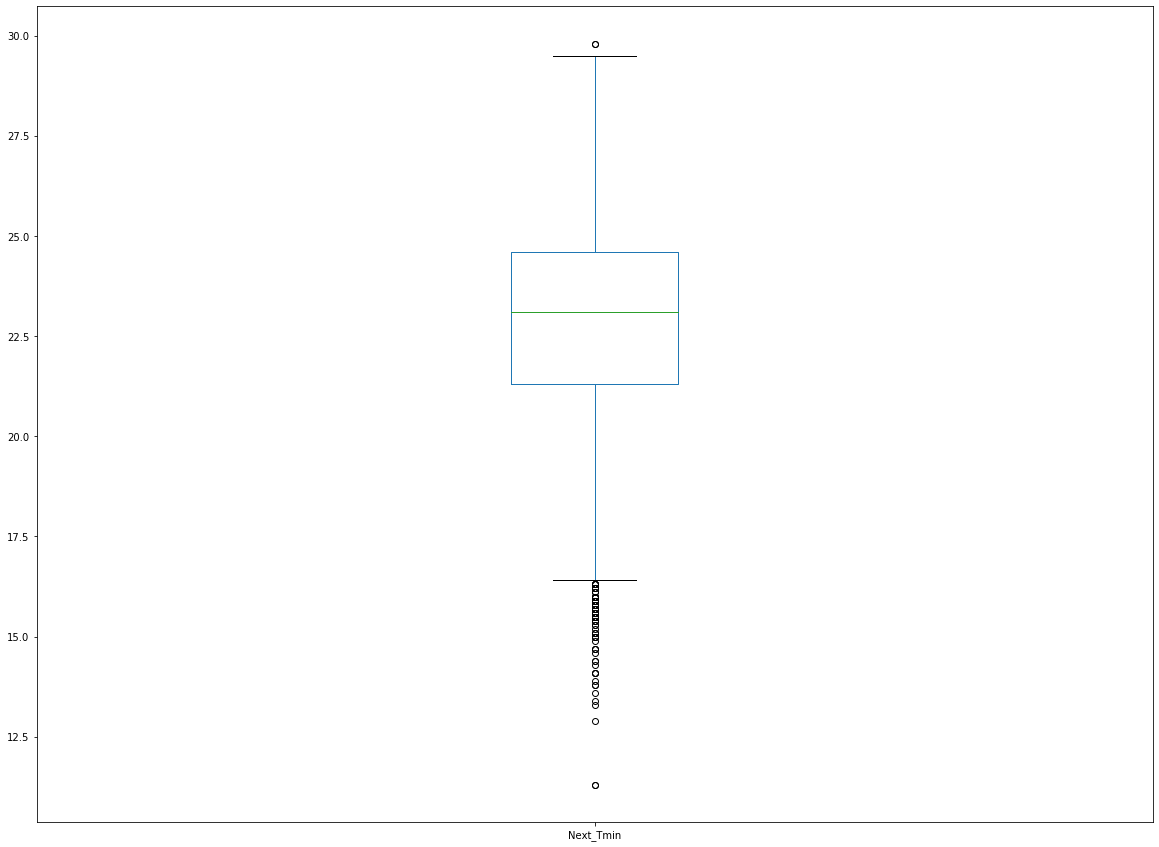

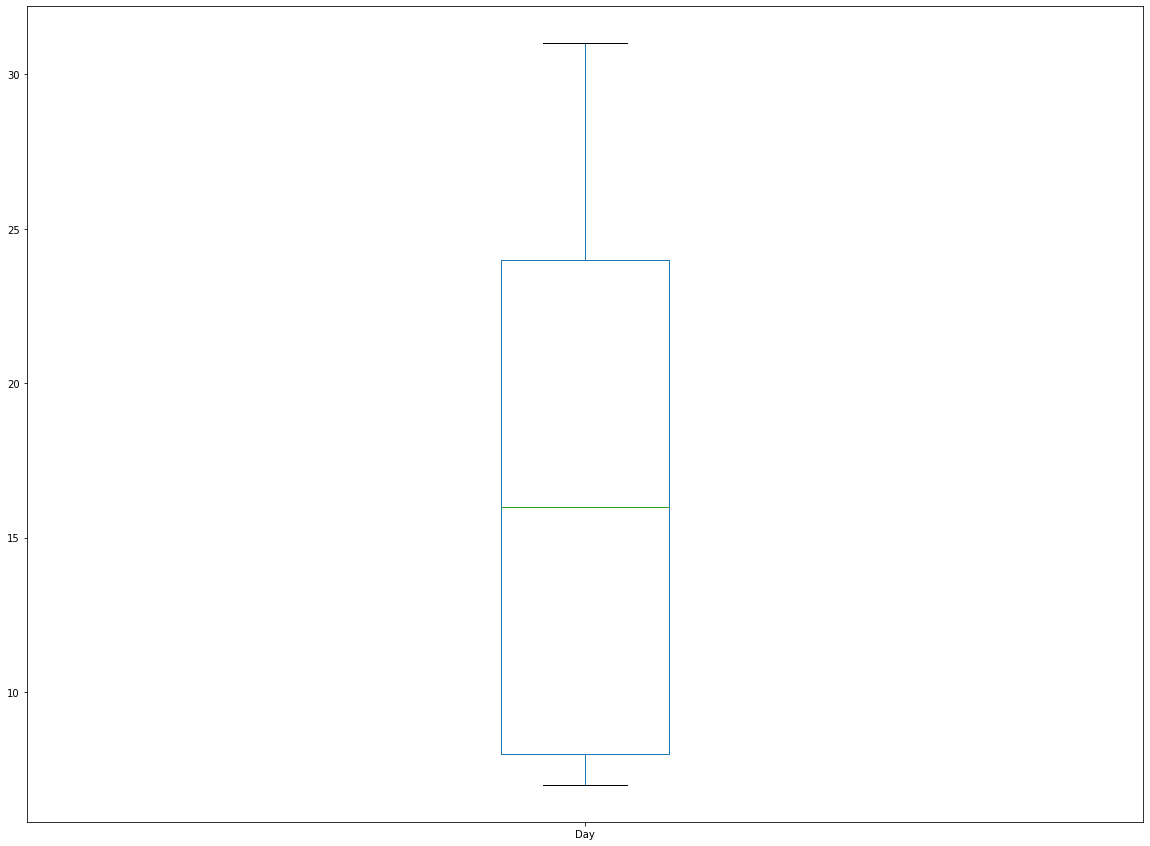

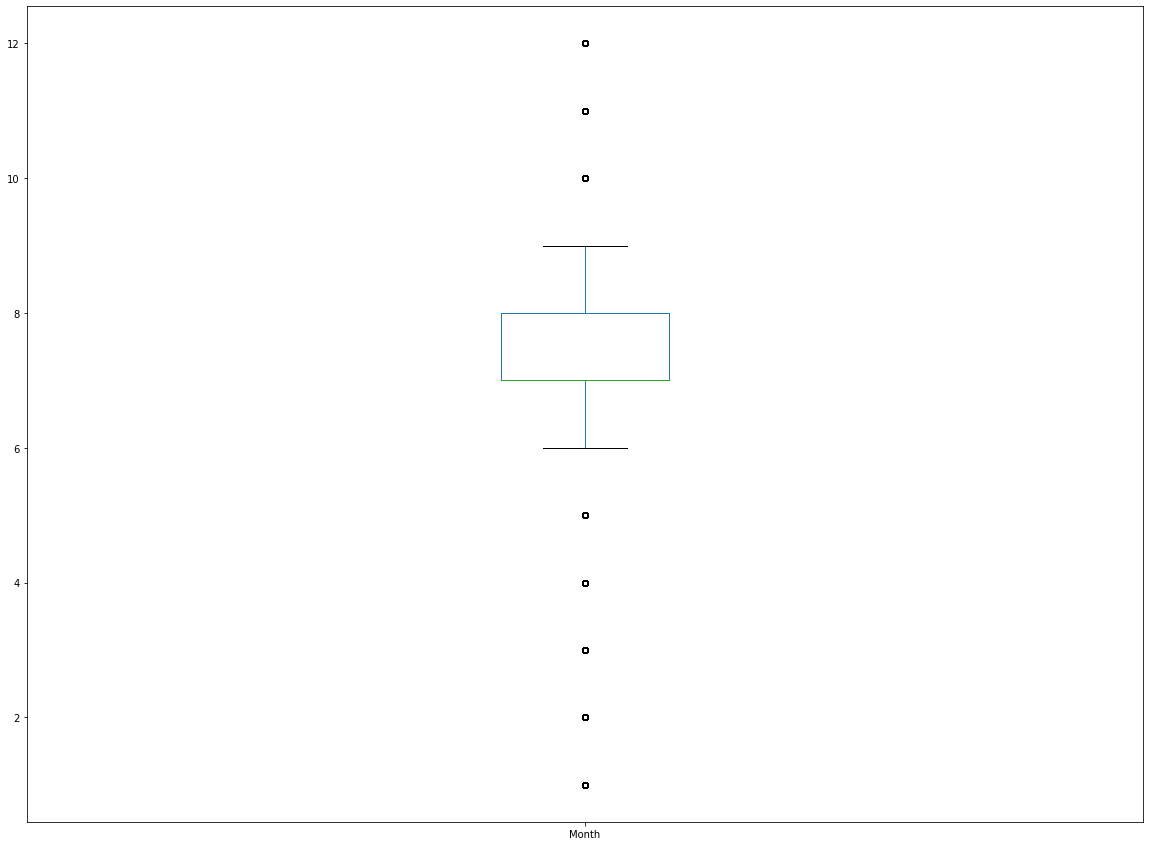

In [28]:
for i in df_new.columns:
    plt.figure(figsize = (20, 15))
    df_new[i].plot.box()

There are some outliers present in the data.

In [29]:
df_new.skew()

station            -0.002774
Present_Tmax       -0.264760
Present_Tmin       -0.366516
LDAPS_RHmin         0.302995
LDAPS_RHmax        -0.854093
LDAPS_Tmax_lapse   -0.227436
LDAPS_Tmin_lapse   -0.580638
LDAPS_WS            1.581481
LDAPS_LH            0.673051
LDAPS_CC1           0.460584
LDAPS_CC2           0.475248
LDAPS_CC3           0.642254
LDAPS_CC4           0.666292
LDAPS_PPT1          5.399236
LDAPS_PPT2          5.782965
LDAPS_PPT3          6.469486
LDAPS_PPT4          6.833840
lat                 0.086587
lon                -0.286558
DEM                 1.721056
Slope               1.560549
Solar radiation    -0.513787
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Day                 0.245795
Month              -0.704300
dtype: float64

Alot of columns have skewness present in the data. We will treat the skewness in the data which will also bring down the number of outliers present in the data.

In [30]:
x = df_new.drop(['Next_Tmax', 'Next_Tmin'], axis = 1)
y = df_new.drop(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Day', 'Month'], axis = 1)

In [31]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new = power_transform(x, method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = x.columns)              

In [32]:
x = df_new

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

# Best Random State

In [34]:
maxr2score = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2 = r2_score(y_test, predrf)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.8085975432465309 on Random State 475


# Creating Train Test Split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 465)

In [36]:
LR = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [LR, dt, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (r2_score(y_test, pred))
    print (mean_squared_error(y_test, pred))
    print (mean_absolute_error(y_test, pred))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.8039780253270761
1.6327515352008262
0.9687140167940538
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.7779308096764189
1.784124245038827
0.9682053494391698
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=No

In [37]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [38]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = cv)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  model is : 0.7852612321539585
 
Cross Validation Score for  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')  model is : 0.7821817511129453
 
Cross Validation Score for  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
            

Random Forest model has the highest R2 score and cross val score at 0.90 and 0.91 respectively. Hence we will work with this model.

# Hypertuning

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [41]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [42]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [55]:
rfr = RandomForestRegressor(random_state=475, max_features='auto', n_estimators= 500, max_depth=8, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))
print (mean_absolute_error(y_test, predrfr))

0.8576999215754741
1.1541081613300634
0.8255320981411949


After hypertuning with GridSearchCV the R2 score and cross validation score of our Random Forest Model decreased a bit.

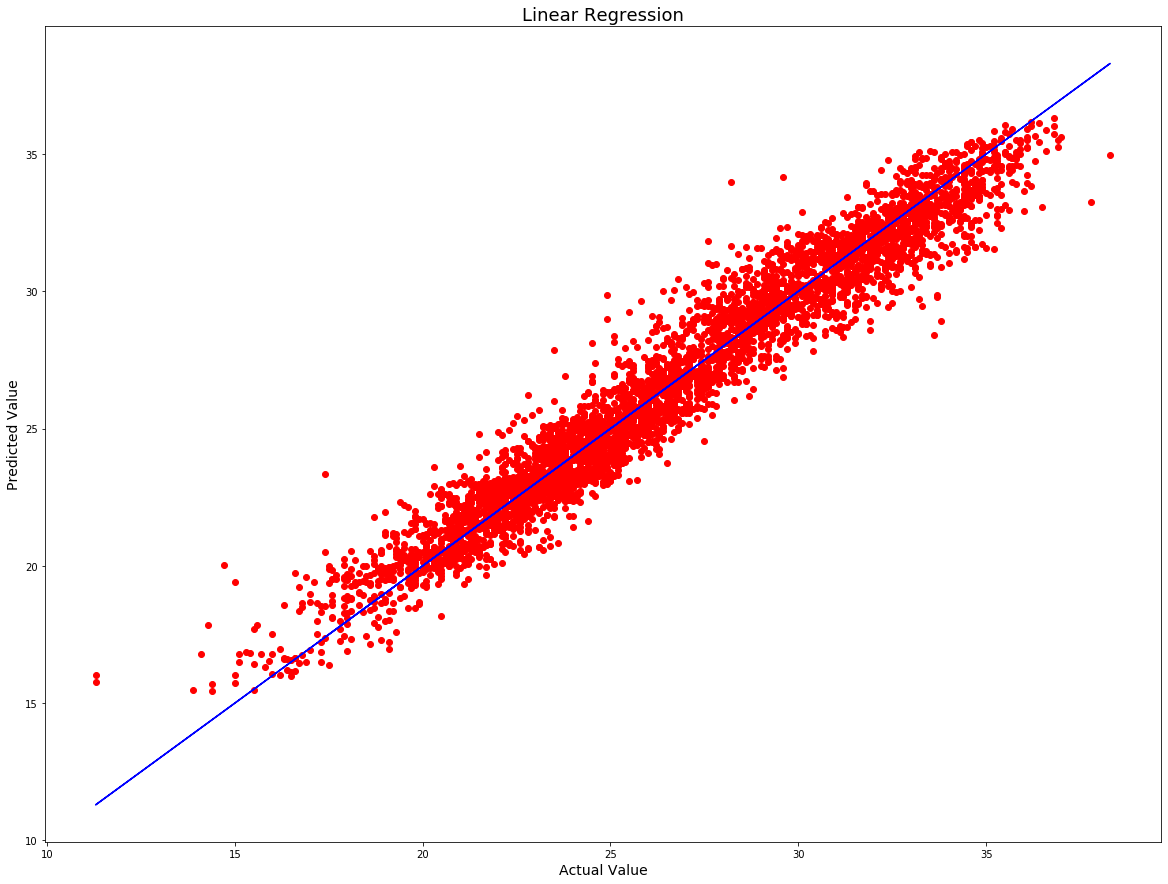

In [57]:
plt.figure(figsize = (20, 15))
plt.scatter(x = y_test, y = predrfr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Value', fontsize = 14)
plt.ylabel('Predicted Value', fontsize = 14)
plt.title('Linear Regression', fontsize = 18)
plt.show()

In [58]:
import pickle

filename = 'TemperatureRfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# Conclusion

In [59]:
loaded_model = pickle.load(open('TemperatureRfr.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.8573292148555025
